# Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [ ]:
df_train.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C

In [ ]:
df_train.tail()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
7900  7900    1166  D-penicillamine  16839   F       N            N       N   
7901  7901    1492          Placebo  17031   F       N            Y       N   
7902  7902    1576  D-penicillamine  25873   F       N            N       Y   
7903  7903    3584  D-penicillamine  22960   M       N            Y       N   
7904  7904    1978  D-penicillamine  19237   F       N            N       N   

     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
7900     N        0.8        309.0     3.56    38.0    1629.0   79.05   
7901     N        0.9        260.0     3.43    62.0    1440.0  142.00   
7902     S        2.0        225.0     3.19    51.0     933.0   69.75   
7903     N        0.7        248.0     2.75    32.0    1003.0   57.35   
7904     N        0.7        256.0     3.23    22.0     645.0   74.40   

      Tryglicerides  Platelets  Prothrombin  Stage Status  
7900          224.0      344.0          9.9    2.0      C  
7901           78.0      277.0         10.0    4.0      C  
7902           62.0      200.0         12.7    2.0      D  
7903          118.0      221.0         10.6    4.0      D  
7904           85.0      336.0         10.3    3.0      C

In [ ]:
df_train.isnull().any()

id               False
N_Days           False
Drug             False
Age              False
Sex              False
Ascites          False
Hepatomegaly     False
Spiders          False
Edema            False
Bilirubin        False
Cholesterol      False
Albumin          False
Copper           False
Alk_Phos         False
SGOT             False
Tryglicerides    False
Platelets        False
Prothrombin      False
Stage            False
Status           False
dtype: bool

Dataset memiliki 7095 baris dan 20 kolom, dengan 13 kolom numerik dan 7 kolom kategorikal. Tidak terdapat null value pada dataset. Dataset memiliki fitur target bernama 'Status'.

In [ ]:
for col in df_train.columns:
  print(col, df_train[col].nunique())

id 7905
N_Days 461
Drug 2
Age 391
Sex 2
Ascites 2
Hepatomegaly 2
Spiders 2
Edema 3
Bilirubin 111
Cholesterol 226
Albumin 160
Copper 171
Alk_Phos 364
SGOT 206
Tryglicerides 154
Platelets 227
Prothrombin 49
Stage 4
Status 3


In [ ]:
df_train.drop(columns='id', axis=1, inplace=True)
df_test.drop(columns='id', axis=1, inplace=True)

Drop fitur Id karena tidak mengandung informasi yang berguna dalam prediksi nantinya.

In [ ]:
num_features = df_train.select_dtypes(include=['number']).columns
print(f"Numerical features: {num_features}")
print(f"Number of numerical features: {len(num_features)}")

cat_feature = df_train.select_dtypes(include=['object']).columns
print(f"Categorical features: {cat_feature}")
print(f"Number of categorical features: {len(cat_feature)}")

Numerical features: Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')
Number of numerical features: 12
Categorical features: Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], dtype='object')
Number of categorical features: 7


# Data Preprocessing

## Handling Zero Value

In [ ]:
for col in num_features:
  zero_values = (df_train[col] == 0).sum()
  print(f"Zero values in {col}: {zero_values}")

Zero values in N_Days: 0
Zero values in Age: 0
Zero values in Bilirubin: 0
Zero values in Cholesterol: 0
Zero values in Albumin: 0
Zero values in Copper: 0
Zero values in Alk_Phos: 0
Zero values in SGOT: 0
Zero values in Tryglicerides: 0
Zero values in Platelets: 0
Zero values in Prothrombin: 0
Zero values in Stage: 0


Tidak terdapat zero value pada dataset.

## Eksplorasi Fitur Target

In [ ]:
sns.countplot(x='Status', data=df_train)
plt.title('Distribution of Target Feature (Status)')
plt.show()

In [ ]:
df_train['Status'].value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

In [ ]:
df_train['Status'].value_counts(normalize=True) * 100

Status
C     62.808349
D     33.712840
CL     3.478811
Name: proportion, dtype: float64

## Feature Engineering

In [ ]:
df_train['Bilirubin_Albumin_Ratio'] = df_train['Bilirubin'] / df_train['Albumin']
df_test['Bilirubin_Albumin_Ratio'] = df_test['Bilirubin'] / df_test['Albumin']

Bilirubin tinggi dan albumin rendah sering dikaitkan dengan sirosis yang parah. Rasio ini dapat memberikan gambaran lebih baik tentang fungsi hati dibandingkan masing-masing fitur secara terpisah. Semakin tinggi rasionya, semakin parah kemungkinan gangguan hati.

In [ ]:
df_train['SGOT_Ratio'] = df_train['SGOT'] / df_train['Alk_Phos']
df_test['SGOT_Ratio'] = df_test['SGOT'] / df_test['Alk_Phos']

Rasio antara SGOT (AST) dan SGPT (ALT), meskipun fitur ALT tidak ada di dataset, kita dapat mempertimbangkan SGOT sebagai proxy enzim (Alk_Phos). Rasio AST/ALT yang lebih dari 2 biasanya menunjukkan penyakit hati alkoholik dan sirosis lanjut. Ini adalah indikator klinis penting yang sering digunakan untuk mendiagnosis kerusakan hati. Rasio > 2 bisa menunjukkan adanya sirosis atau kerusakan hati berat.

In [ ]:
df_train['Copper_Albumin_Ratio'] = df_train['Copper'] / df_train['Albumin']
df_test['Copper_Albumin_Ratio'] = df_test['Copper'] / df_test['Albumin']

Peningkatan kadar tembaga (Copper) yang abnormal sering kali berhubungan dengan kerusakan hati dan penyakit seperti Wilson's Disease. Albumin berperan dalam mengangkut copper, sehingga rasio ini dapat memberikan insight tambahan tentang kondisi hati. Rasio yang lebih tinggi dapat menunjukkan penumpukan tembaga abnormal akibat kerusakan hati.

In [ ]:
df_train['Platelets_Bilirubin_Ratio'] = df_train['Platelets'] / df_train['Bilirubin']
df_test['Platelets_Bilirubin_Ratio'] = df_test['Platelets'] / df_test['Bilirubin']

Rendahnya jumlah trombosit dan tingginya bilirubin adalah indikator umum dari sirosis lanjut. Rasio ini bisa memberikan prediktor gabungan dari dua kondisi penting. Rasio yang rendah menunjukkan risiko sirosis yang lebih tinggi, terutama pada tahap lanjut.

In [ ]:
df_train['Tryglicerides_Albumin_Ratio'] = df_train['Tryglicerides'] / df_train['Albumin']
df_test['Tryglicerides_Albumin_Ratio'] = df_test['Tryglicerides'] / df_test['Albumin']

Trigliserida yang tinggi dan albumin yang rendah sering menunjukkan metabolisme lipid yang tidak normal dan masalah hati. Rasio ini bisa menjadi indikator kesehatan hati. Rasio yang tinggi bisa menandakan adanya gangguan metabolisme lipid akibat sirosis.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_Days                       7905 non-null   int64  
 1   Drug                         7905 non-null   object 
 2   Age                          7905 non-null   int64  
 3   Sex                          7905 non-null   object 
 4   Ascites                      7905 non-null   object 
 5   Hepatomegaly                 7905 non-null   object 
 6   Spiders                      7905 non-null   object 
 7   Edema                        7905 non-null   object 
 8   Bilirubin                    7905 non-null   float64
 9   Cholesterol                  7905 non-null   float64
 10  Albumin                      7905 non-null   float64
 11  Copper                       7905 non-null   float64
 12  Alk_Phos                     7905 non-null   float64
 13  SGOT              

## Eksplorasi Fitur Numerik

In [ ]:
num_features = df_train.select_dtypes(include=['number']).columns
print(f"Numerical features: {num_features}")
print(f"Number of numerical features: {len(num_features)}")

Numerical features: Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Bilirubin_Albumin_Ratio', 'SGOT_Ratio',
       'Copper_Albumin_Ratio', 'Platelets_Bilirubin_Ratio',
       'Tryglicerides_Albumin_Ratio'],
      dtype='object')
Number of numerical features: 17


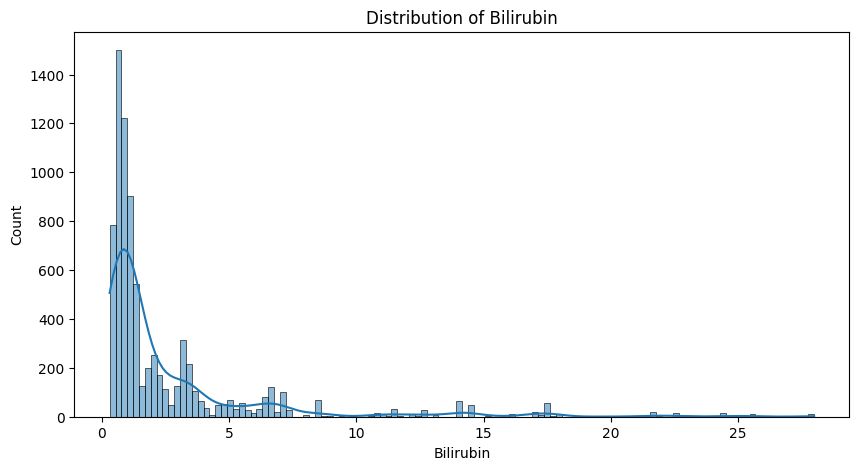

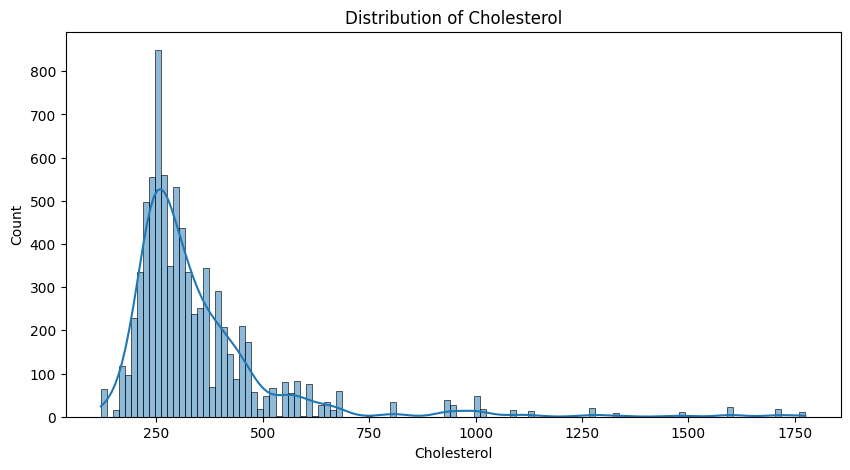

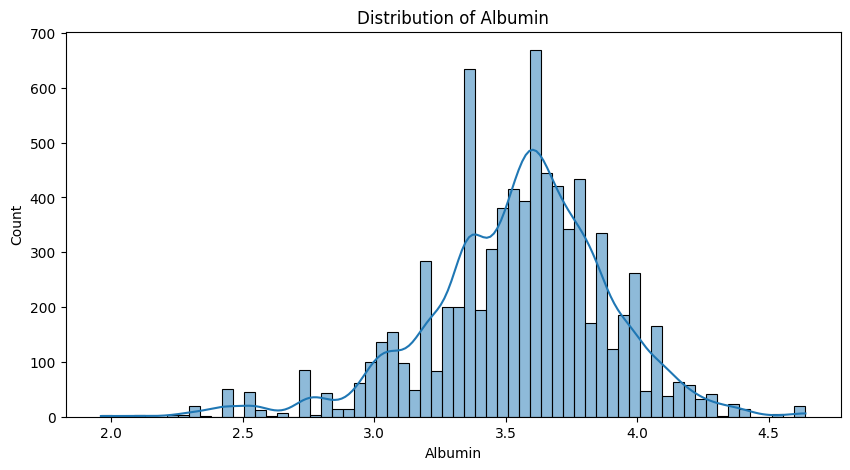

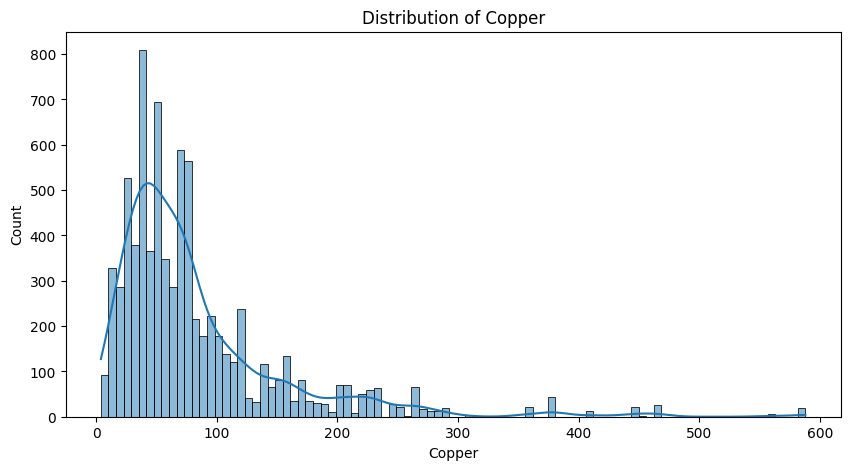

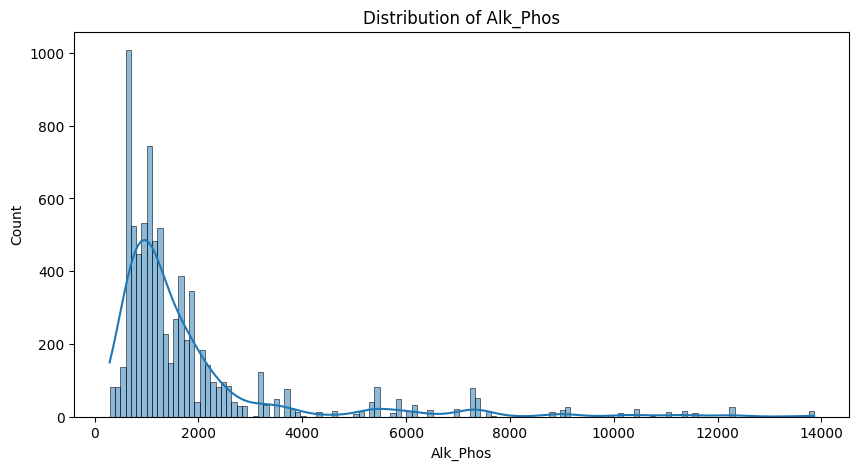

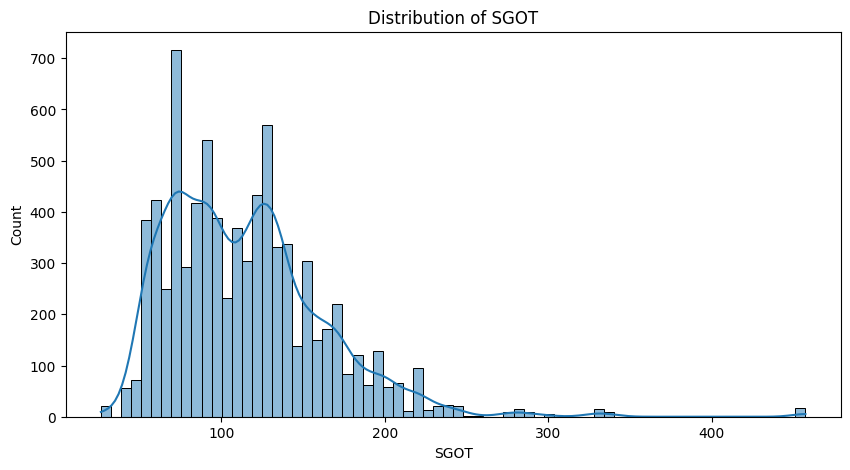

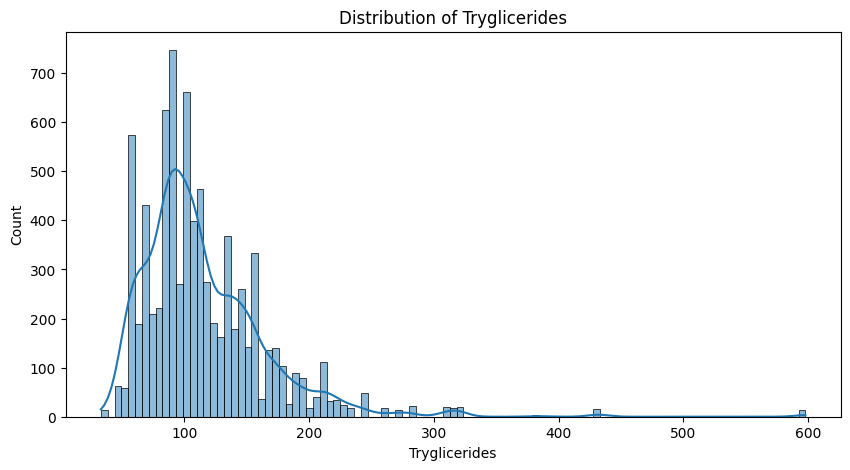

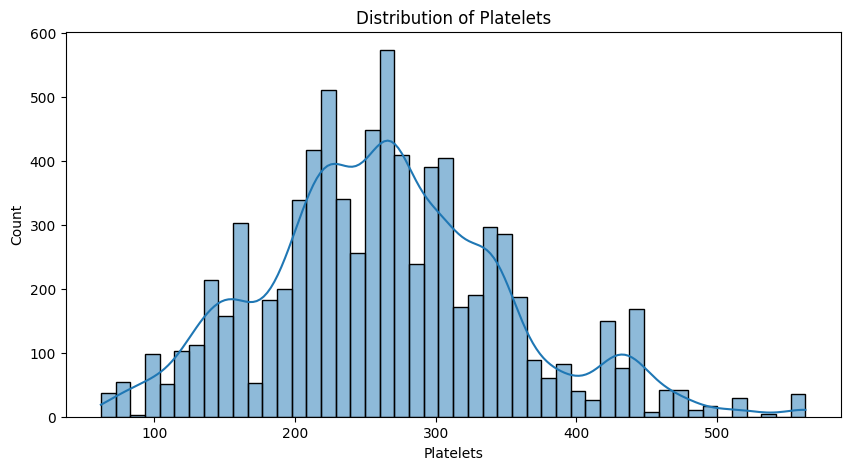

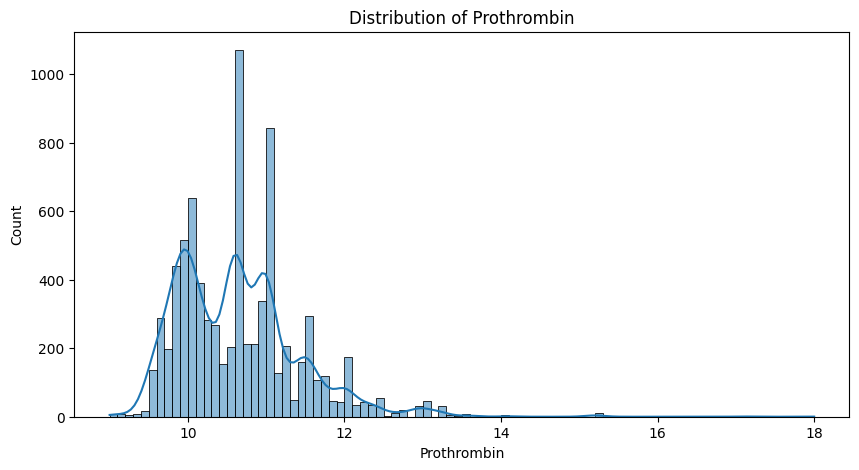

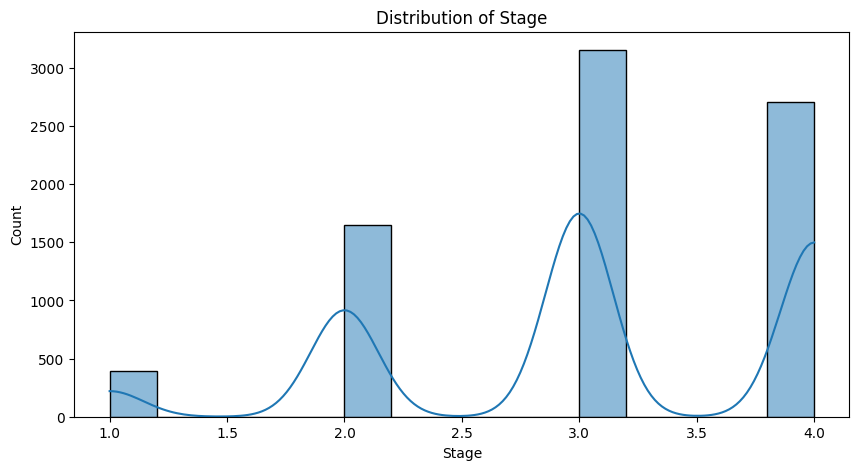

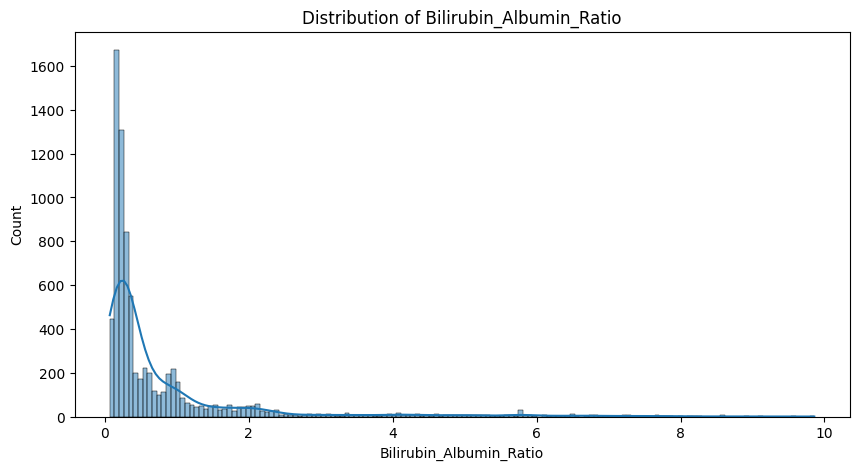

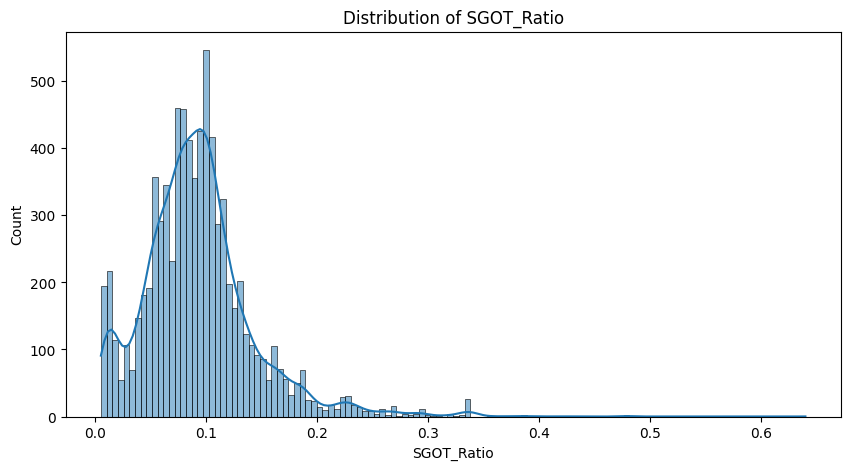

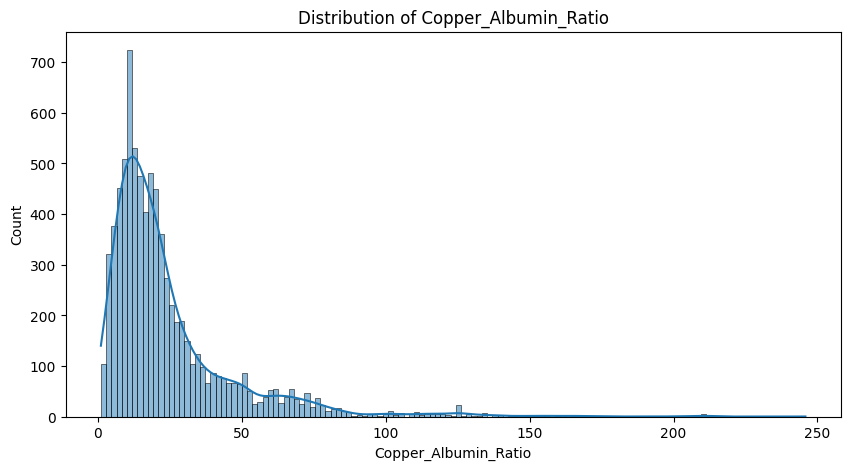

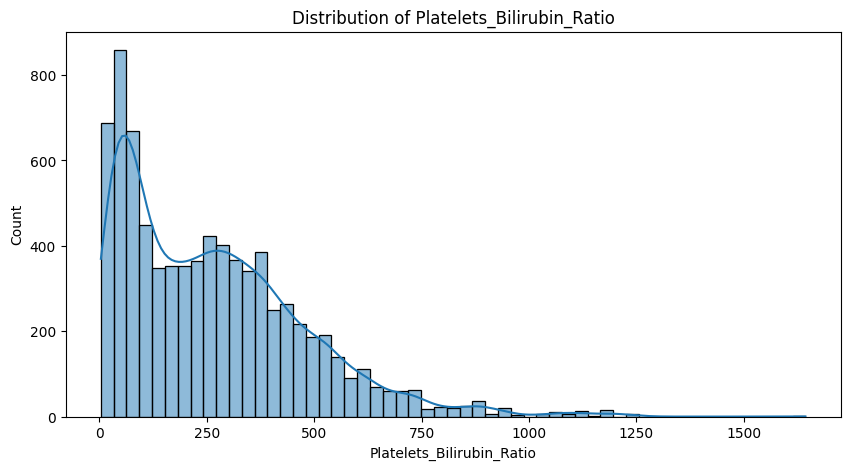

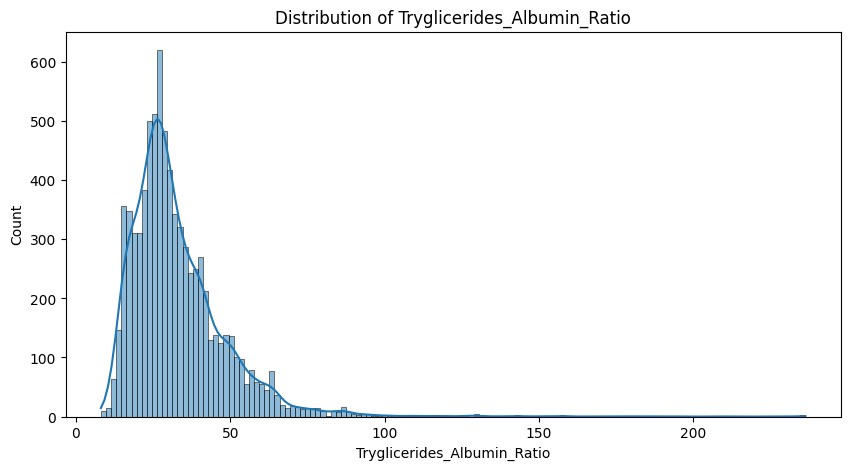

In [ ]:
# Visualisasi data numerik
for col in num_features:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

In [ ]:
df_train['Age'].head()

0    21532
1    19237
2    13727
3    18460
4    16658
Name: Age, dtype: int64

Fitur Age dalam bentuk hari. Akan dibiarkan karena umur dalam bentuk hari memiliki informasi yang lebih spesifik.

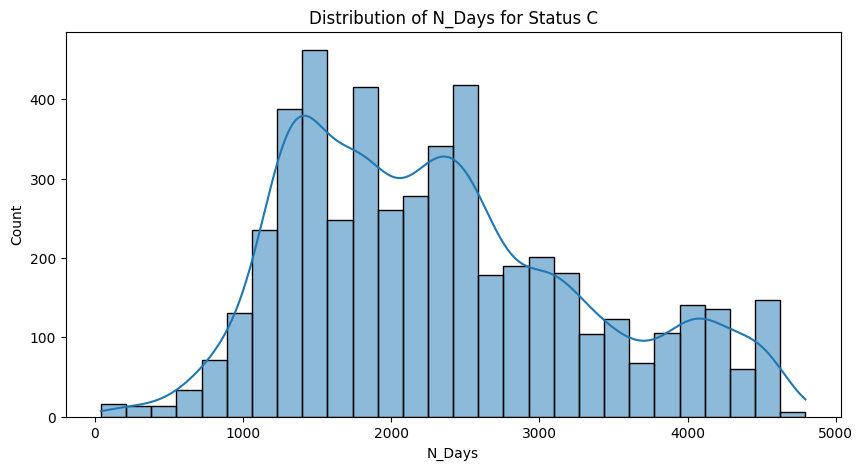

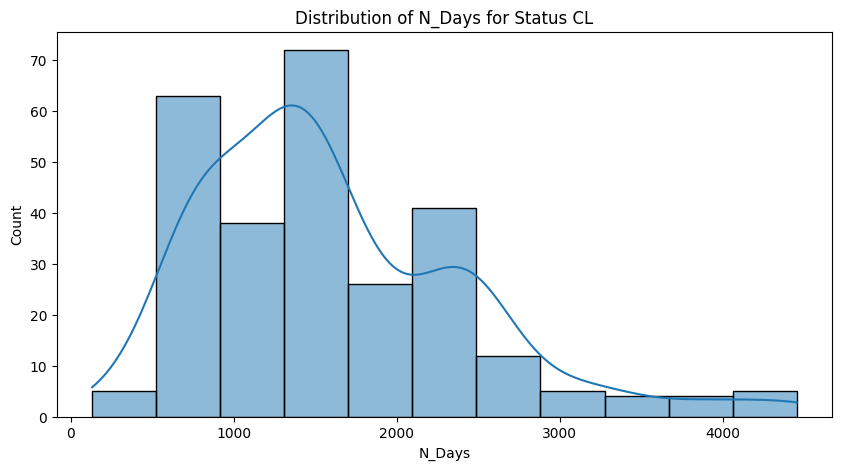

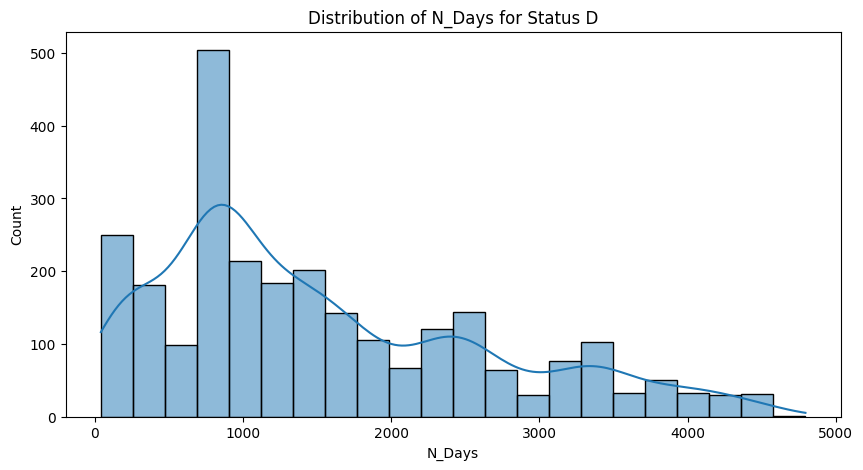

In [ ]:
status_of_interest = ['C', 'CL', 'D']

for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['N_Days'], kde=True)
  plt.title(f'Distribution of N_Days for Status {status}')
  plt.show()

Dilihat dari distribusinya terhadap status, distribusi dari fitur N_Days cukup sejalan dengan status D. Lalu juga distribusinya normal, sehingga tidak perlu dilakukan transformasi.

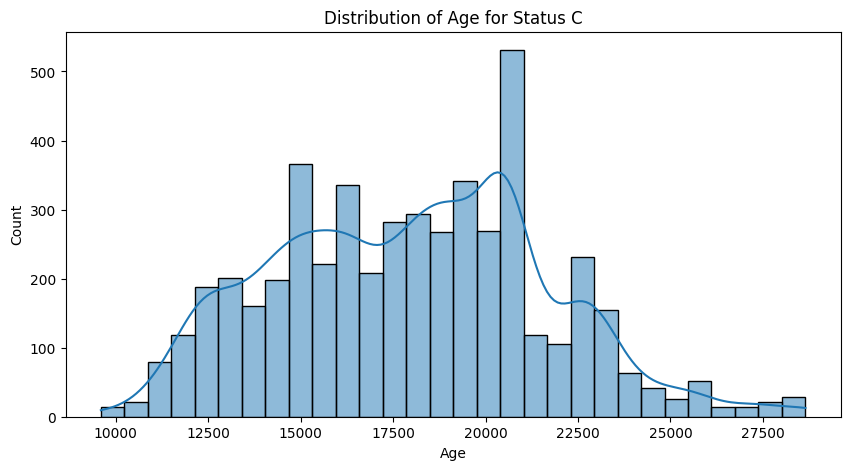

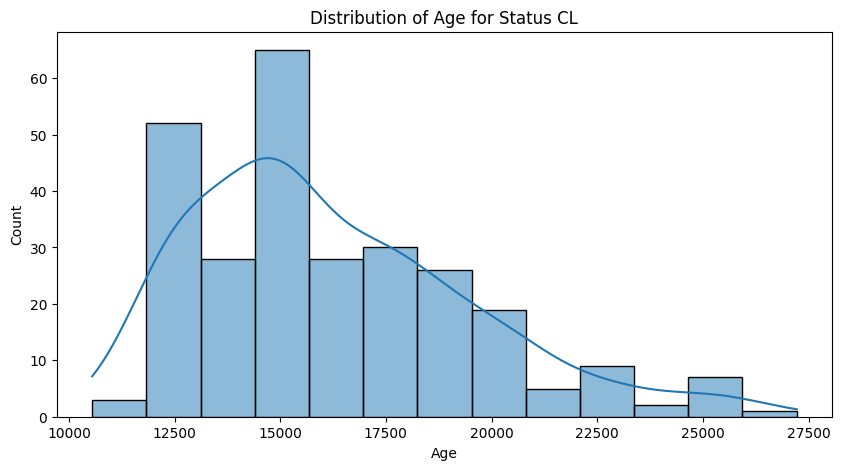

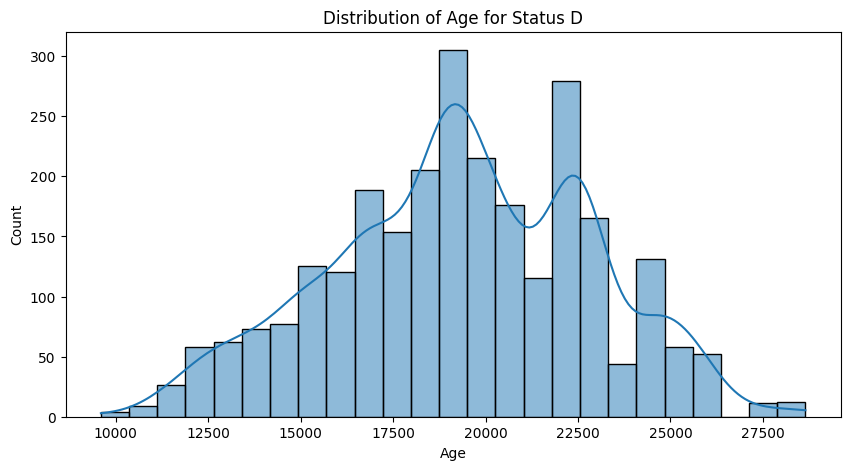

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['Age'], kde=True)
  plt.title(f'Distribution of Age for Status {status}')
  plt.show()

In [ ]:
def age_category(age_in_days):
  age_in_years = age_in_days / 365.25
  if age_in_years <= 30:
    return 'Young'
  elif age_in_years <= 50:
    return 'Middle-Aged'
  else:
    return 'Old'

df_train['Age_Category'] = df_train['Age'].apply(age_category)
df_test['Age_Category'] = df_test['Age'].apply(age_category)

In [ ]:
df_train['Age_Category'].value_counts()

Age_Category
Old            4211
Middle-Aged    3651
Young            43
Name: count, dtype: int64

Dilihat dari distribusinya terhadap Status, cukup banyak penderita dengan usia 40 tahunan ke atas mengalami status D untuk penyakit sirosis. Lalu juga sudah berdistribusi normal sehingga tidak perlu dilakukan transformasi.

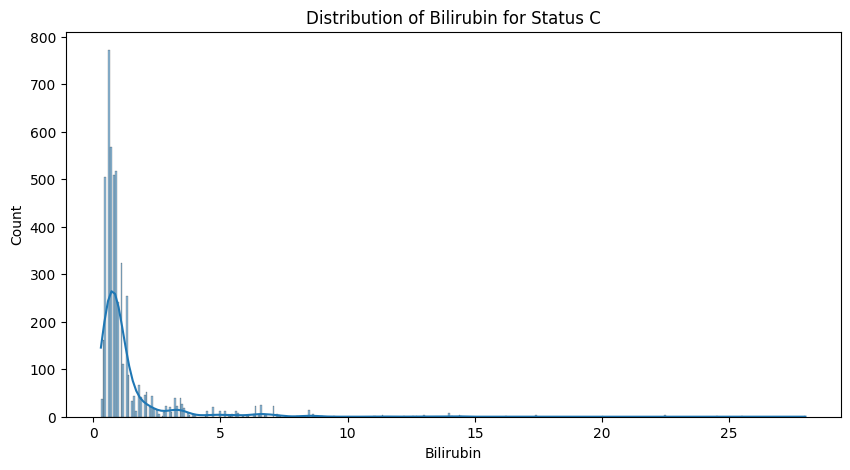

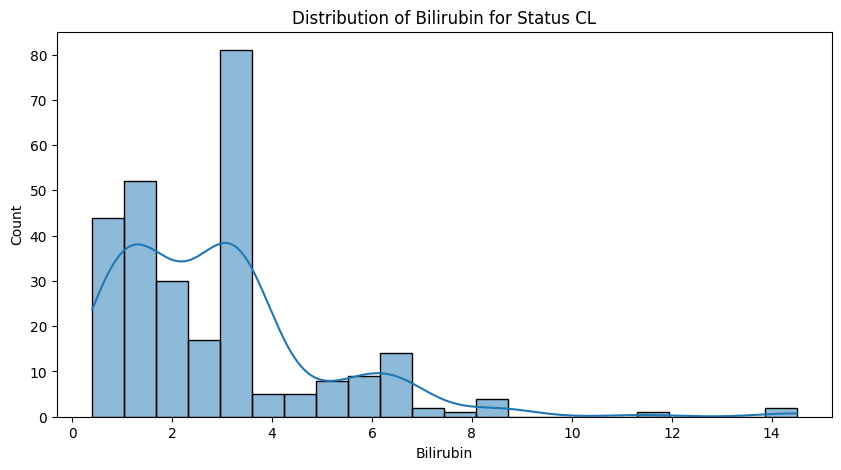

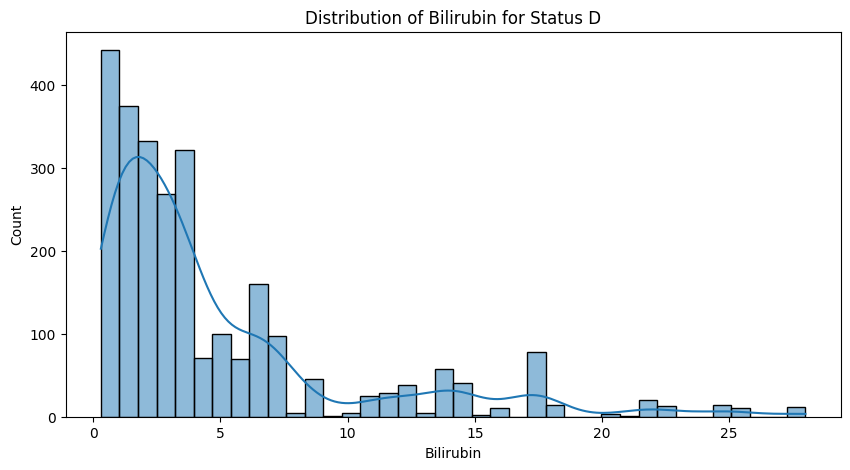

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['Bilirubin'], kde=True)
  plt.title(f'Distribution of Bilirubin for Status {status}')
  plt.show()

In [ ]:
df_train['Bilirubin'].describe()

count    7905.000000
mean        2.594485
std         3.812960
min         0.300000
25%         0.700000
50%         1.100000
75%         3.000000
max        28.000000
Name: Bilirubin, dtype: float64

In [ ]:
def categorize_bilirubin(value):
  if 0.3 <= value <= 1.2:
    return 'Normal'
  elif value > 1.2:
    return 'Abnormal'
  else:
    return 0

df_train['Bilirubin_Category'] = df_train['Bilirubin'].apply(categorize_bilirubin)
df_test['Bilirubin_Category'] = df_test['Bilirubin'].apply(categorize_bilirubin)

In [ ]:
df_train['Bilirubin_Category'].value_counts()

Bilirubin_Category
Normal      4406
Abnormal    3499
Name: count, dtype: int64

In [ ]:
from scipy import stats

df_log = df_train.copy()
df_sqrt = df_train.copy()
df_cube = df_train.copy()
df_boxcox = df_train.copy()

for col in num_features:
  # Log transformation
  df_log[f'{col}_log'] = np.log(df_train[col])

  # Square root transformation
  df_sqrt[f'{col}_sqrt'] = np.sqrt(df_train[col])

  # Cube root transformation
  df_cube[f'{col}_cbrt'] = np.cbrt(df_train[col])

  # Box-Cox transformation
  df_boxcox[f'{col}_boxcox'], _ = stats.boxcox(df_train[col])

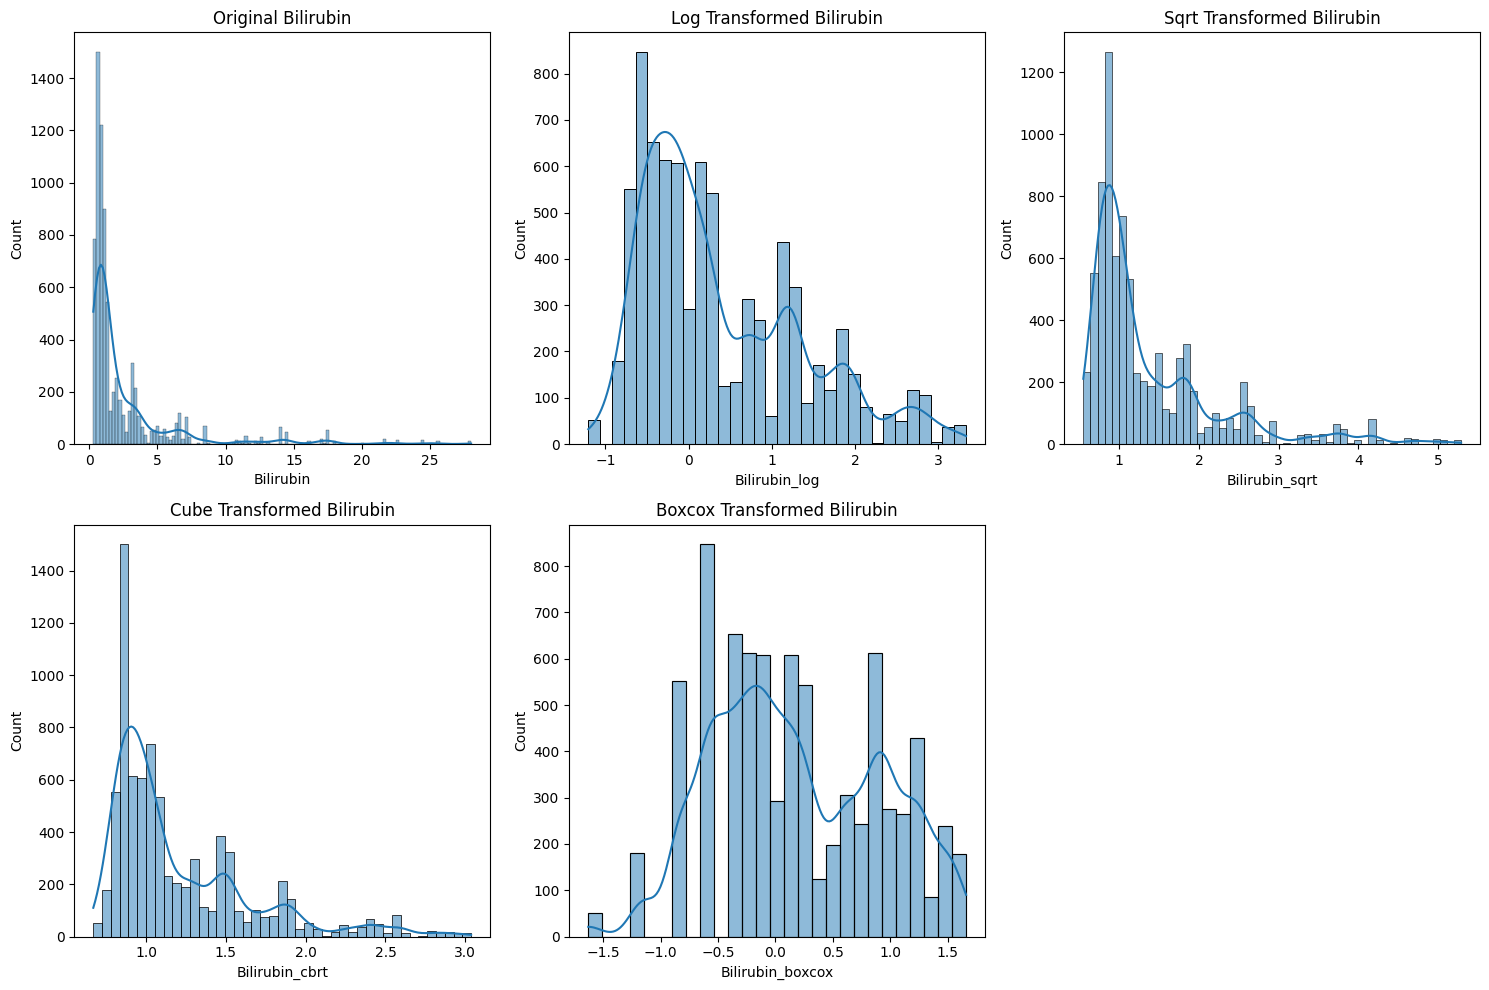

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_log['Bilirubin'], kde=True)
plt.title('Original Bilirubin')

plt.subplot(2, 3, 2)
sns.histplot(df_log['Bilirubin_log'], kde=True)
plt.title('Log Transformed Bilirubin')

plt.subplot(2, 3, 3)
sns.histplot(df_sqrt['Bilirubin_sqrt'], kde=True)
plt.title('Sqrt Transformed Bilirubin')

plt.subplot(2, 3, 4)
sns.histplot(df_cube['Bilirubin_cbrt'], kde=True)
plt.title('Cube Transformed Bilirubin')

plt.subplot(2, 3, 5)
sns.histplot(df_boxcox['Bilirubin_boxcox'], kde=True)
plt.title('Boxcox Transformed Bilirubin')

plt.tight_layout()
plt.show()

In [ ]:
df_train['Bilirubin'], _ = stats.boxcox(df_train['Bilirubin'])
df_test['Bilirubin'], _ = stats.boxcox(df_test['Bilirubin'])

Pada dasarnya, kadar bilirubin manusia normal sekitar 0.1-1.2 mg/dL, sedangkan penderita sirosis biasanya memiliki kadar bilirubin yang lebih tinggi dari manusia normal. Melihat kadar bilirubin pada dataset ini, perbandingan antara bilirubin normal dengan abnormal cukup sebanding, sehingga dibutuhkan fitur tambahan untuk mengategorikan bilirubin normal dan abnormal. Namun fitur numeriknya tetap dipertahankan agar prediksi dapat lebih spesifik.

Lalu, distribusi dari fitur ini terdapat skewness, sehingga perlu dilakukan transformasi, yang di sini menggunakan transformasi boxcox karena dapat menangani outlier dengan cukup baik (berdasarkan metode IQR).

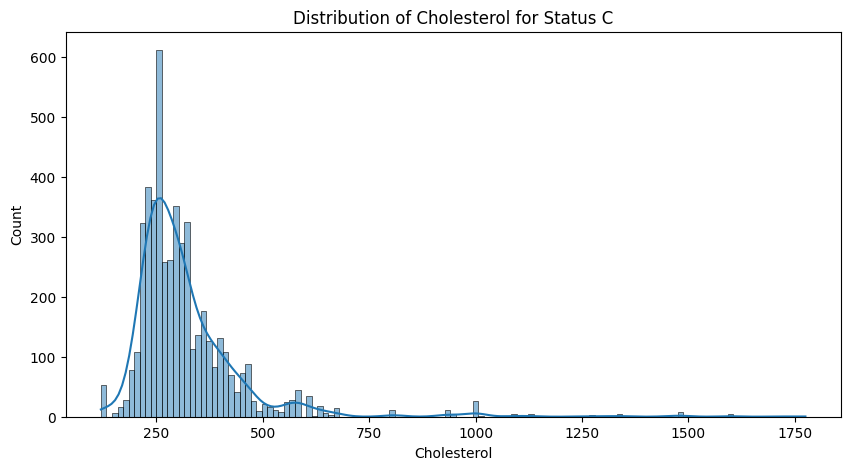

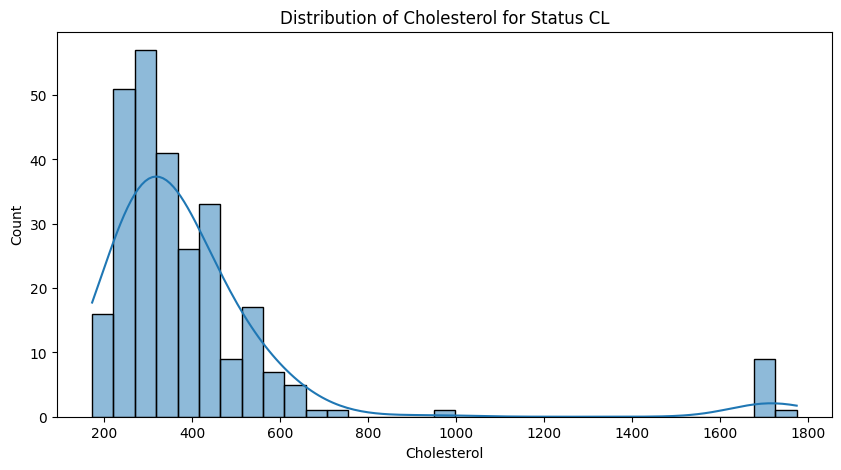

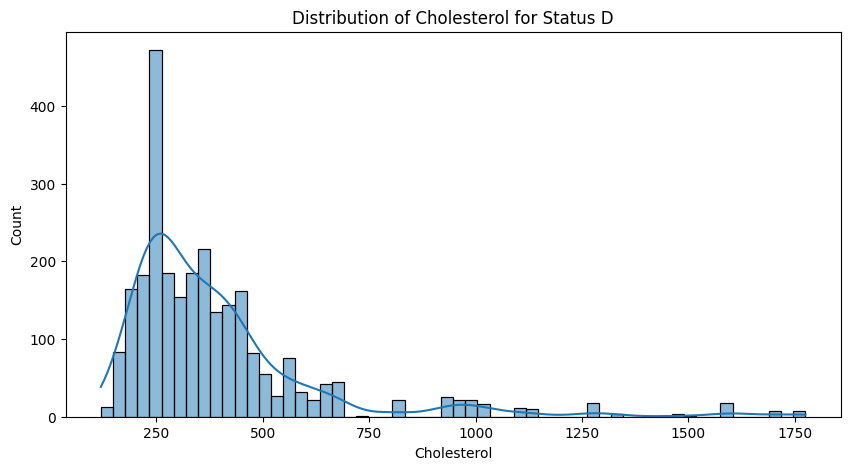

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['Cholesterol'], kde=True)
  plt.title(f'Distribution of Cholesterol for Status {status}')
  plt.show()

In [ ]:
df_train['Cholesterol'].describe()

count    7905.000000
mean      350.561923
std       195.379344
min       120.000000
25%       248.000000
50%       298.000000
75%       390.000000
max      1775.000000
Name: Cholesterol, dtype: float64

In [ ]:
def categorize_cholesterol(value):
  if value <= 200:
    return 'Normal'
  elif value > 200:
    return 'Abnormal'
  else:
    return 0

df_train['Cholesterol_Category'] = df_train['Cholesterol'].apply(categorize_cholesterol)
df_test['Cholesterol_Category'] = df_test['Cholesterol'].apply(categorize_cholesterol)

In [ ]:
df_train['Cholesterol_Category'].value_counts()

Cholesterol_Category
Abnormal    7477
Normal       428
Name: count, dtype: int64

In [ ]:
(df_train['Cholesterol_Category'] == 1).sum() / len(df_train) * 100

0.0

In [ ]:
df_train.drop(columns='Cholesterol_Category', axis=1, inplace=True)
df_test.drop(columns='Cholesterol_Category', axis=1, inplace=True)

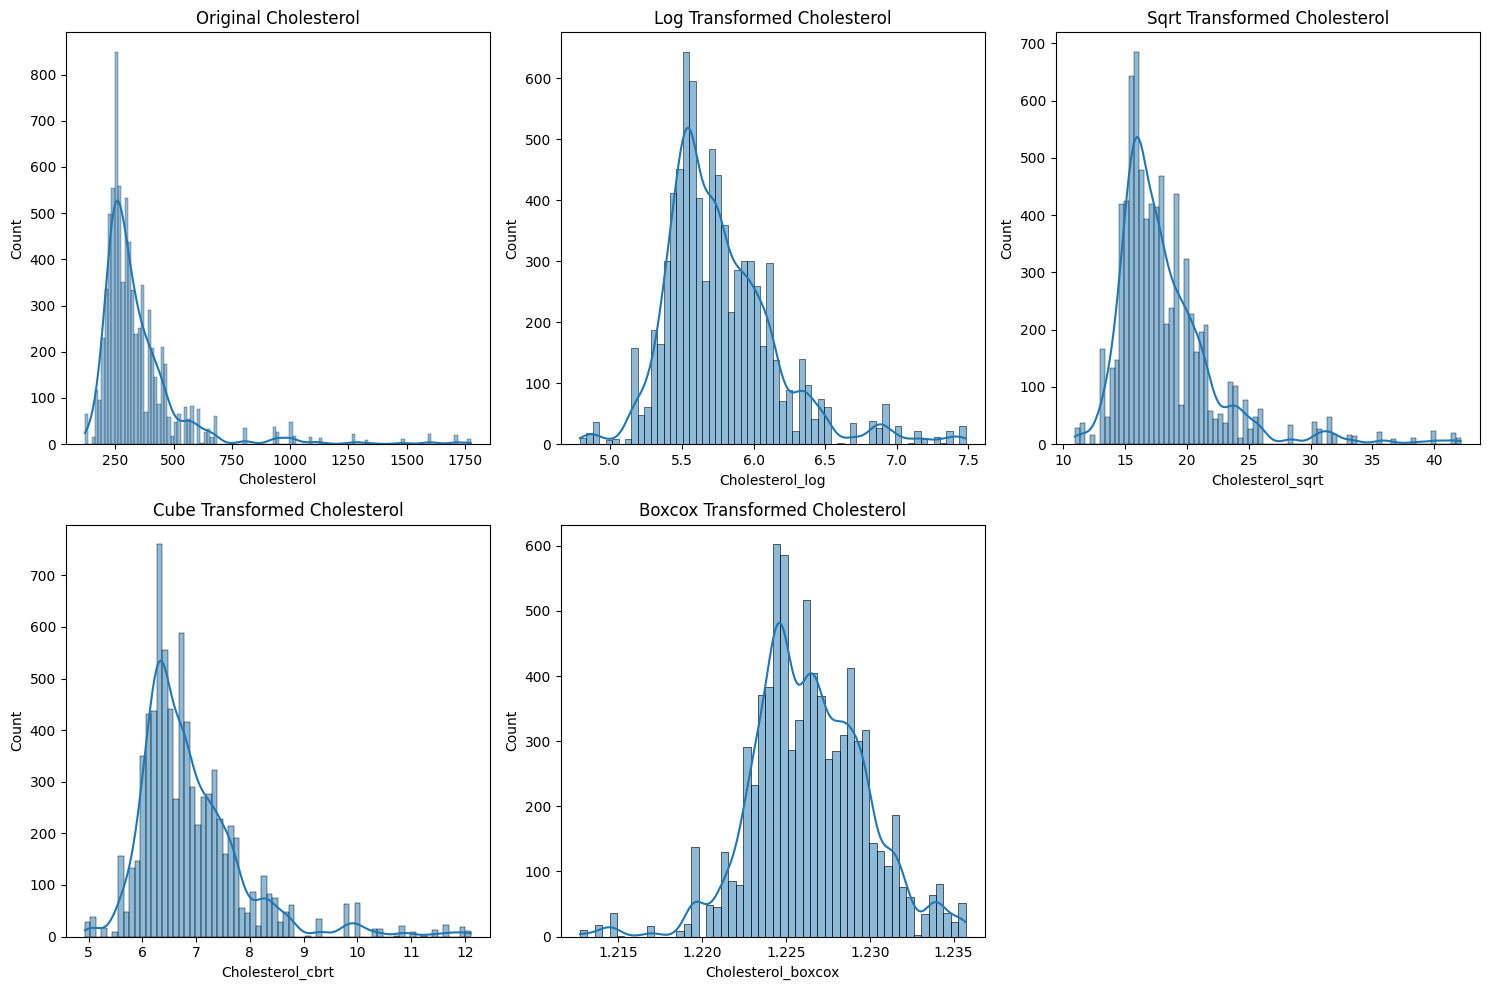

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_log['Cholesterol'], kde=True)
plt.title('Original Cholesterol')

plt.subplot(2, 3, 2)
sns.histplot(df_log['Cholesterol_log'], kde=True)
plt.title('Log Transformed Cholesterol')

plt.subplot(2, 3, 3)
sns.histplot(df_sqrt['Cholesterol_sqrt'], kde=True)
plt.title('Sqrt Transformed Cholesterol')

plt.subplot(2, 3, 4)
sns.histplot(df_cube['Cholesterol_cbrt'], kde=True)
plt.title('Cube Transformed Cholesterol')

plt.subplot(2, 3, 5)
sns.histplot(df_boxcox['Cholesterol_boxcox'], kde=True)
plt.title('Boxcox Transformed Cholesterol')

plt.tight_layout()
plt.show()

In [ ]:
df_train['Cholesterol'], _ = stats.boxcox(df_train['Cholesterol'])
df_test['Cholesterol'], _ = stats.boxcox(df_test['Cholesterol'])

Pada dasarnya, kadar cholesterol orang normal ialah <= 200 mg/dL, sedangkan penderita sirosis memiliki kadar yang lebih besar dari itu. Melihat data cholesterol pada dataset ini, kadar normal dengan abnormal cukup jauh, di mana kadar cholesterol normal hanya berkisar 5% dari keseluruhan data, sehingga tidak perlu penambahan fitur kategorikal untuk memisahkannya.

Lalu, distribusi dari fitur memiliki skewness, sehingga perlu dilakukan transformasi, yang di sini menggunakan transformasi boxcox karena dapat menangani outlier dengan cukup baik (berdasarkan metode IQR).

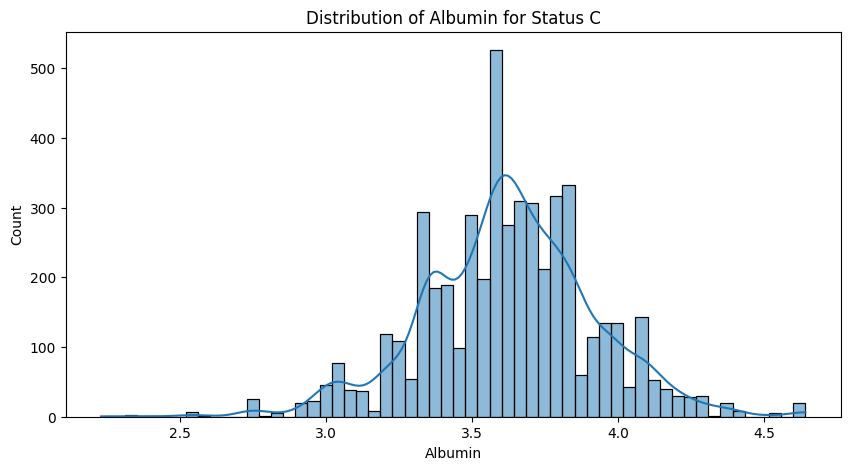

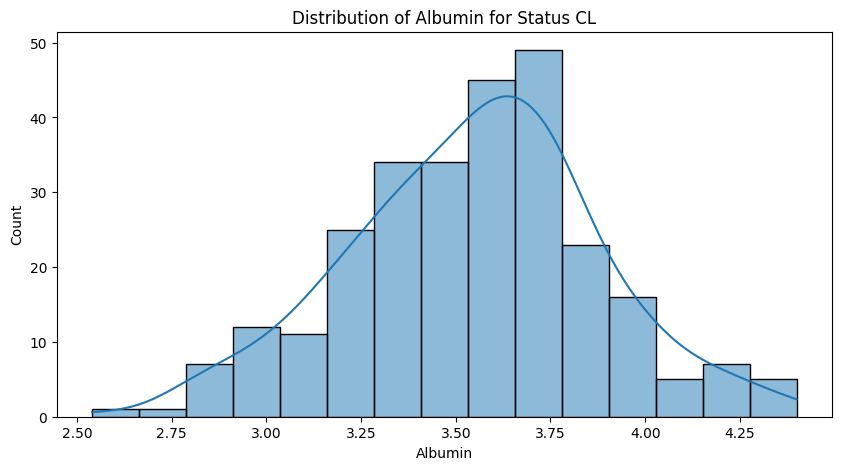

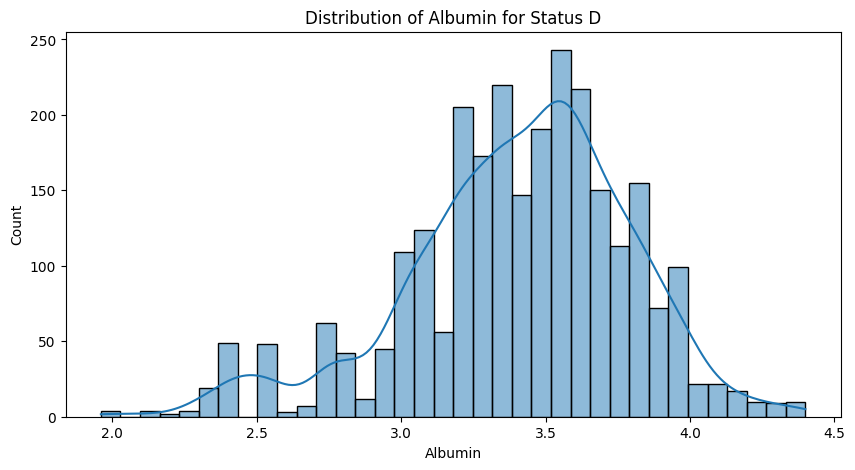

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['Albumin'], kde=True)
  plt.title(f'Distribution of Albumin for Status {status}')
  plt.show()

In [ ]:
df_train['Albumin'].describe()

count    7905.000000
mean        3.548323
std         0.346171
min         1.960000
25%         3.350000
50%         3.580000
75%         3.770000
max         4.640000
Name: Albumin, dtype: float64

In [ ]:
def categorize_albumin(value):
  if 3.5 < value <= 5:
    return 'Normal'
  elif value <= 3.5:
    return 'Abnormal'
  else:
    return 0

df_train['Albumin_Category'] = df_train['Albumin'].apply(categorize_albumin)
df_test['Albumin_Category'] = df_test['Albumin'].apply(categorize_albumin)

In [ ]:
df_train['Albumin_Category'].value_counts()

Albumin_Category
Normal      4707
Abnormal    3198
Name: count, dtype: int64

Pada dasarnya, kadar albumin pada manusia normal berkisar antara 3.5-5 g/dL, sedangkan penderita sirosis memiliki kadar selain itu. Pada dataset, rata-rata albumin berada di batas bawah nilai normal yang menunjukkan disfungsi hati yang khas pada sirosis.

Perbandingan kadar cholesterol normal dan abnormal cukup sebanding sehingga dibutuhkan penambahan fitur kategorikal pada fitur albumin untuk dapat membedakan kadar normal dan abnormal. Namun fitur numerik tetap dipertahankan agar prediksi lebih baik.

Fitur albumin cukup berdistribusi normal sehingga tidak perlu dilakukan transformasi.

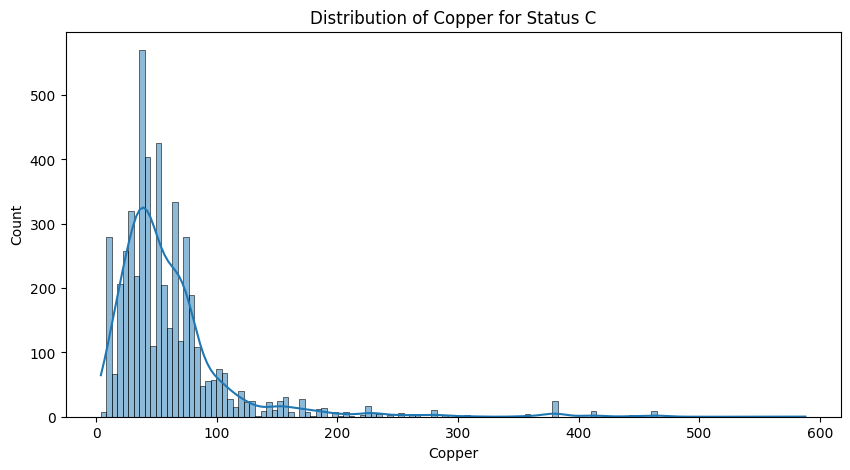

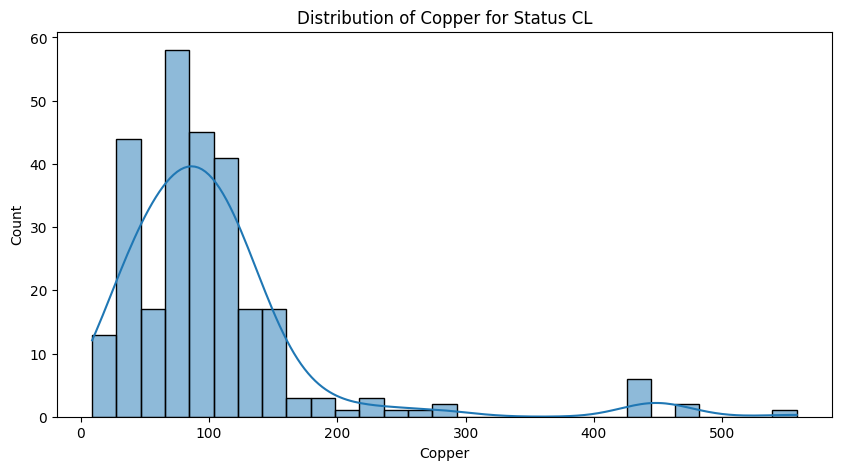

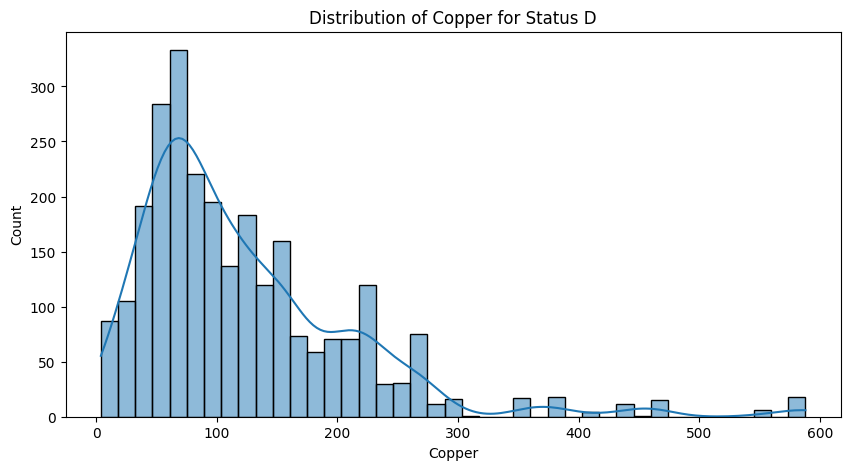

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['Copper'], kde=True)
  plt.title(f'Distribution of Copper for Status {status}')
  plt.show()

In [ ]:
df_train['Copper'].describe()

count    7905.000000
mean       83.902846
std        75.899266
min         4.000000
25%        39.000000
50%        63.000000
75%       102.000000
max       588.000000
Name: Copper, dtype: float64

In [ ]:
def categorize_copper(value):
  if 70 < value <= 140:
    return 'Normal'
  elif value <= 70 or value > 140:
    return 'Abnormal'
  else:
    return 0

df_train['Copper_Category'] = df_train['Copper'].apply(categorize_copper)
df_test['Copper_Category'] = df_test['Copper'].apply(categorize_copper)

In [ ]:
df_train['Copper_Category'].value_counts()

Copper_Category
Abnormal    5700
Normal      2205
Name: count, dtype: int64

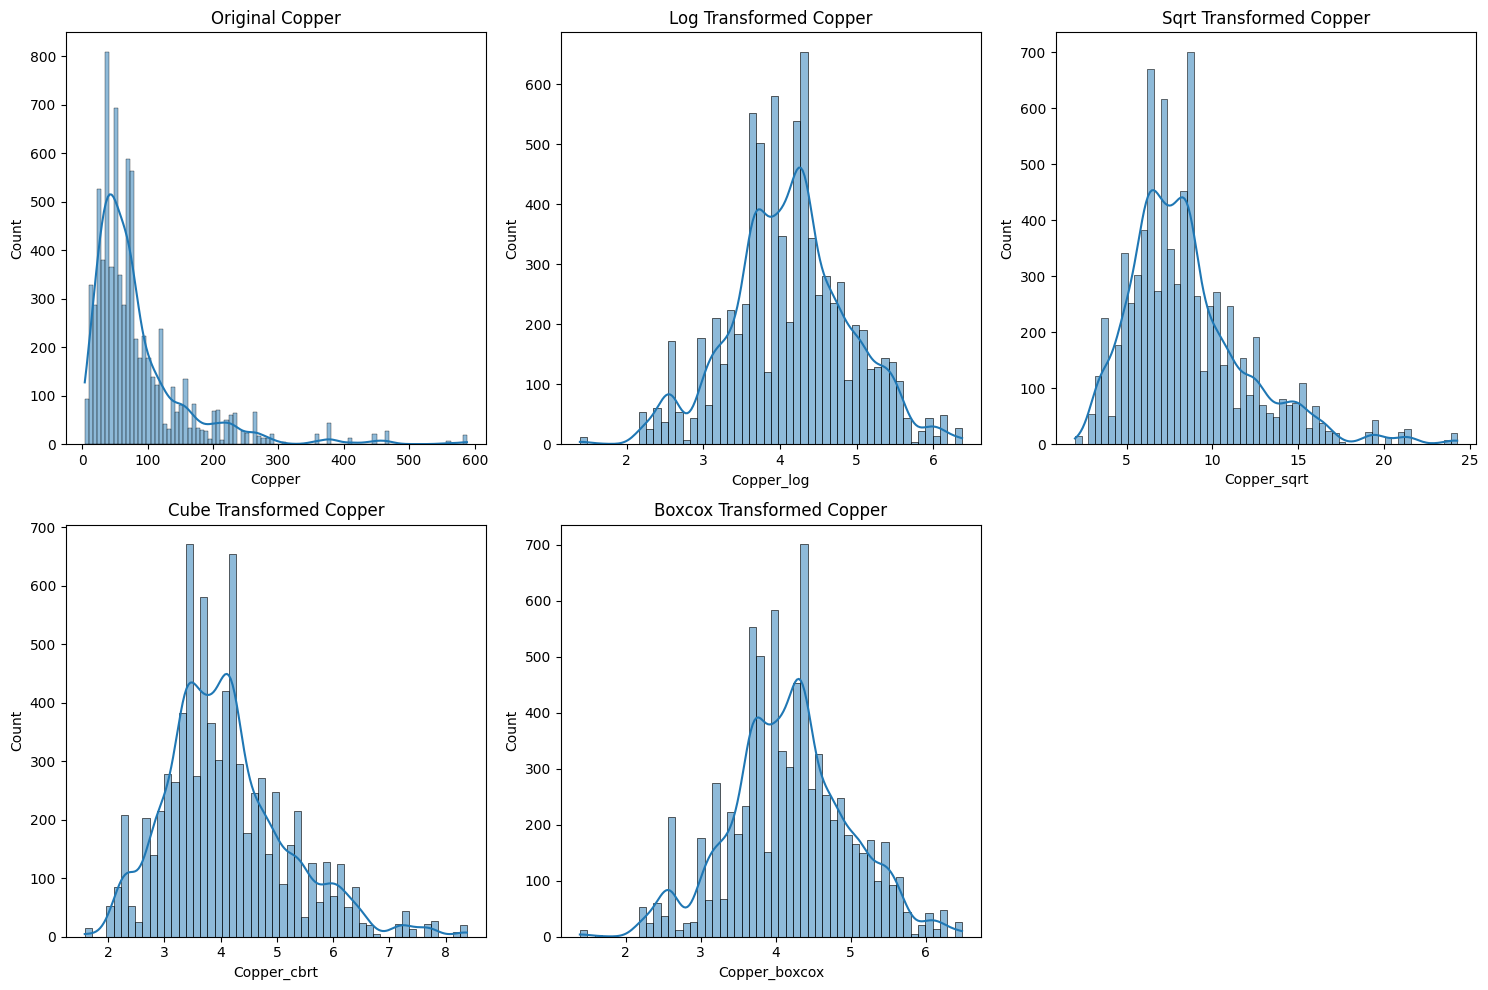

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_log['Copper'], kde=True)
plt.title('Original Copper')

plt.subplot(2, 3, 2)
sns.histplot(df_log['Copper_log'], kde=True)
plt.title('Log Transformed Copper')

plt.subplot(2, 3, 3)
sns.histplot(df_sqrt['Copper_sqrt'], kde=True)
plt.title('Sqrt Transformed Copper')

plt.subplot(2, 3, 4)
sns.histplot(df_cube['Copper_cbrt'], kde=True)
plt.title('Cube Transformed Copper')

plt.subplot(2, 3, 5)
sns.histplot(df_boxcox['Copper_boxcox'], kde=True)
plt.title('Boxcox Transformed Copper')

plt.tight_layout()
plt.show()

In [ ]:
df_train['Copper'] = np.log(df_train['Copper'])
df_test['Copper'] = np.log(df_test['Copper'])

Pada dasarnya, kadar copper/tembaga normalnya berkisar antara 70-140 mcg/dL, sedangkan pada penderita sirosis memiliki kadar selain dari itu. Pada dataset, rata-rata tembaga berada dalam rentang normal, namun variasi besar menunjukkan bahwa ada beberapa kasus dengan penumpukan tembaga yang signifikan, seperti pada penyakit Wilson.

Perbandingan kadar copper/tembaga normal dan abnormal cukup sebanding sehingga dibutuhkan penambahan fitur kategorikal pada fitur Copper untuk dapat membedakan kadar normal dan abnormal. Namun fitur numerik tetap dipertahankan agar prediksi lebih baik.

Fitur Copper memiliki distribusi cukup skewness, sehingga dibutuhkan transformasi agar data berdistribusi normal, yang di sini menggunakan transformasi logaritmik.

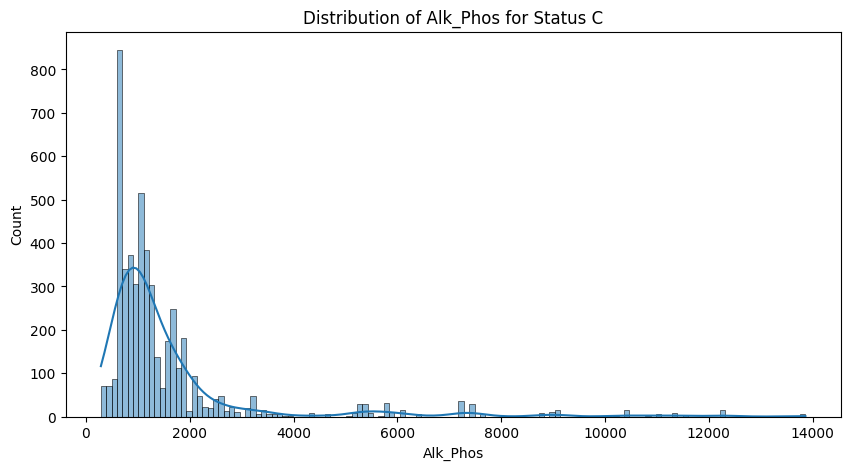

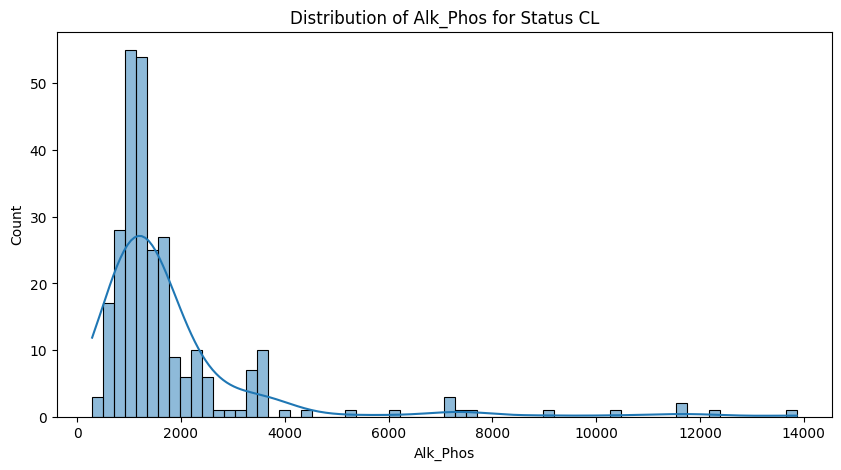

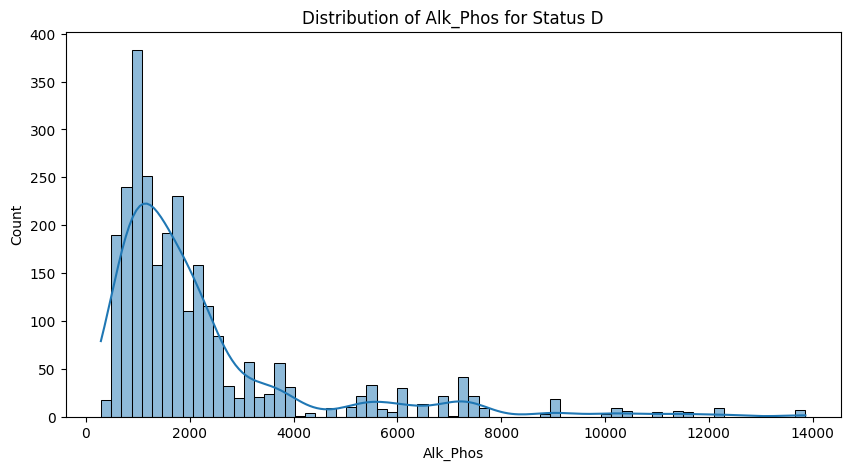

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['Alk_Phos'], kde=True)
  plt.title(f'Distribution of Alk_Phos for Status {status}')
  plt.show()

In [ ]:
df_train['Alk_Phos'].describe()

count     7905.000000
mean      1816.745250
std       1903.750657
min        289.000000
25%        834.000000
50%       1181.000000
75%       1857.000000
max      13862.400000
Name: Alk_Phos, dtype: float64

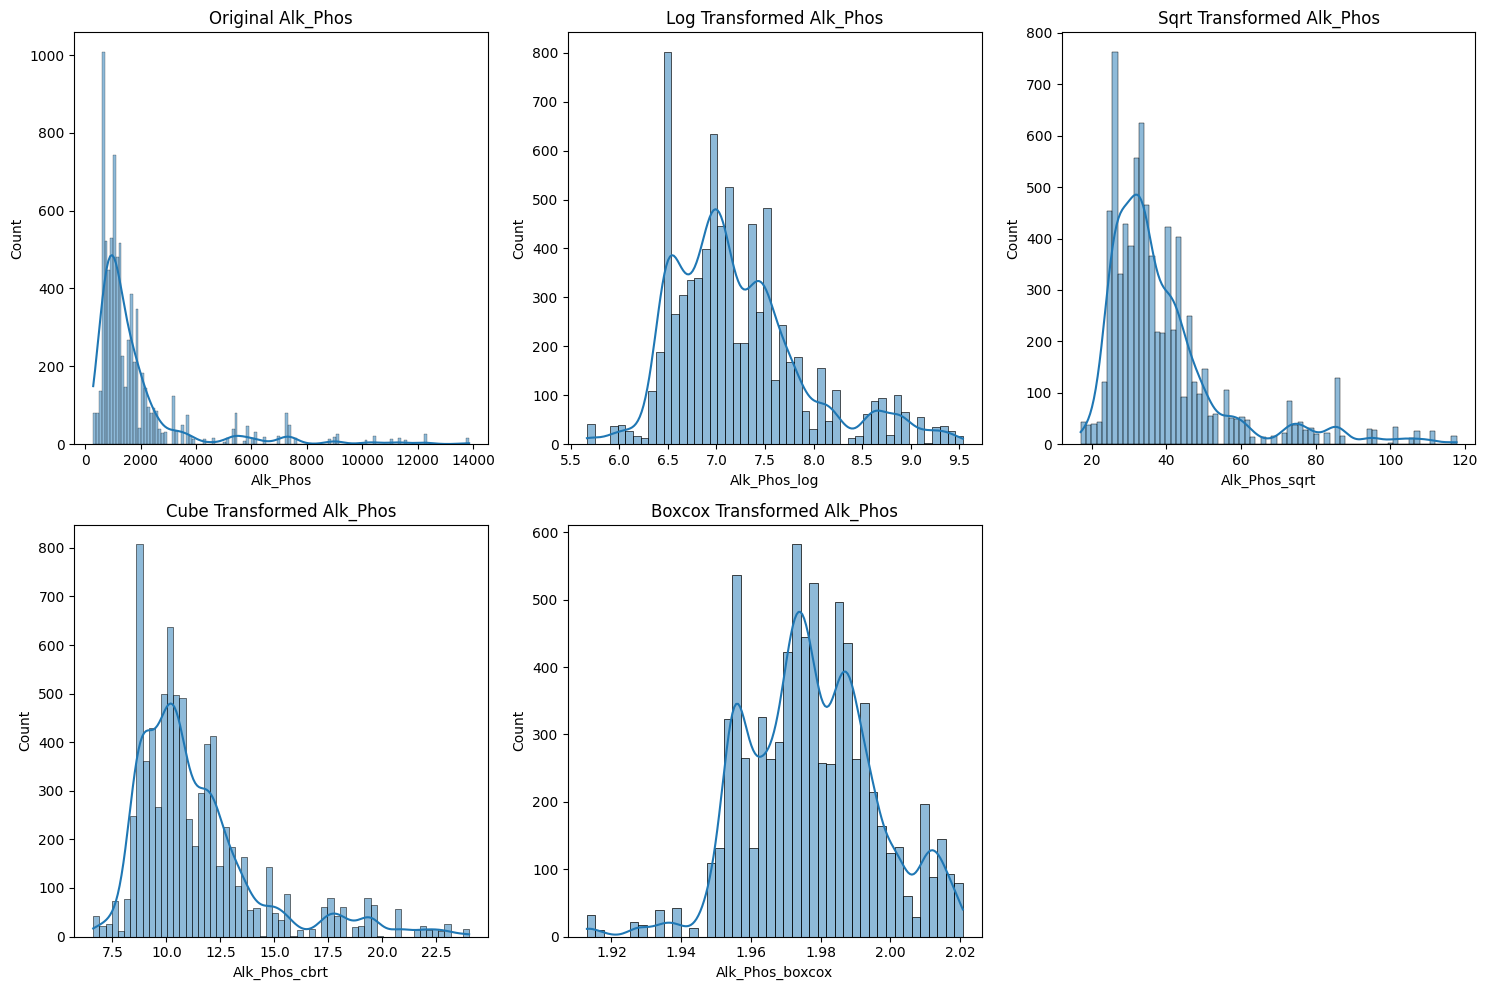

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_log['Alk_Phos'], kde=True)
plt.title('Original Alk_Phos')

plt.subplot(2, 3, 2)
sns.histplot(df_log['Alk_Phos_log'], kde=True)
plt.title('Log Transformed Alk_Phos')

plt.subplot(2, 3, 3)
sns.histplot(df_sqrt['Alk_Phos_sqrt'], kde=True)
plt.title('Sqrt Transformed Alk_Phos')

plt.subplot(2, 3, 4)
sns.histplot(df_cube['Alk_Phos_cbrt'], kde=True)
plt.title('Cube Transformed Alk_Phos')

plt.subplot(2, 3, 5)
sns.histplot(df_boxcox['Alk_Phos_boxcox'], kde=True)
plt.title('Boxcox Transformed Alk_Phos')

plt.tight_layout()
plt.show()

In [ ]:
df_train['Alk_Phos'], _ = stats.boxcox(df_train['Alk_Phos'])
df_test['Alk_Phos'], _ = stats.boxcox(df_test['Alk_Phos'])

Pada dasarnya, kadar alk_phos (Alkaline Phosphatase) dalam tubuh normalnya berkisar antara 44-147 IU/L, sedangkan penderita sirosis memiliki kadar selain dari itu. Dalam dataset, nilai rata-rata jauh di atas nilai normal yang sangat mencolok. Ini menunjukkan bahwa banyak penderita dalam dataset mungkin mengalami kerusakan hati yang signifikan atau obstruksi bilier.

Karena dalam dataset, minimal Alk_Phos saja bernilai 289, berarti seluruh penderita yang terdaftar dalam dataset mengalami kelebihan alkaline phosphatase sehingga tidak perlu lagi membuat fitur kategori tambahan.

Fitur Alk_Phos memiliki distribusi yang cukup skewness, sehingga dibutuhkan transformasi agar data dapat terdistribusi normal, yang di sini menggunakan transformasi boxcox.

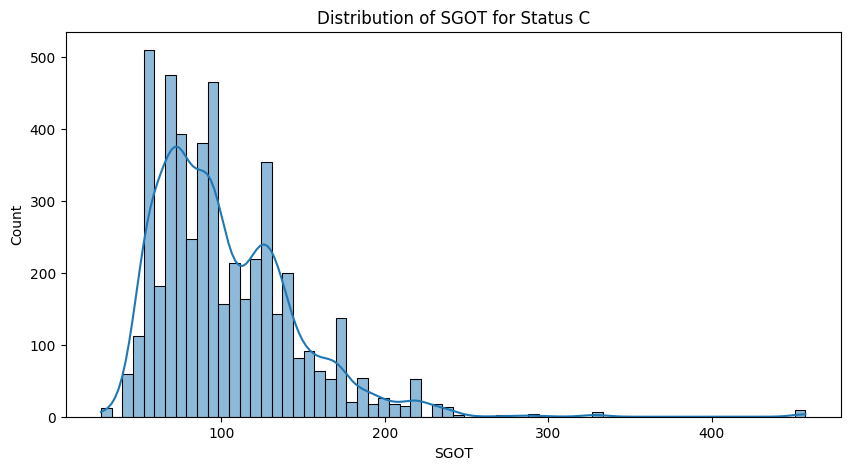

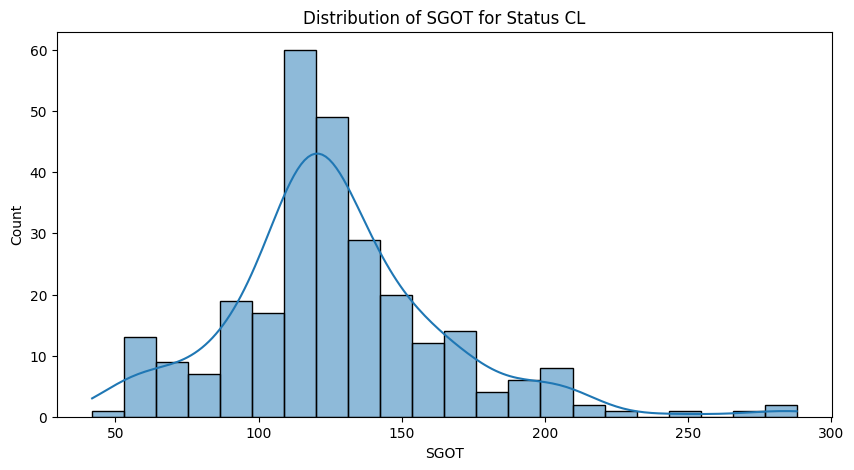

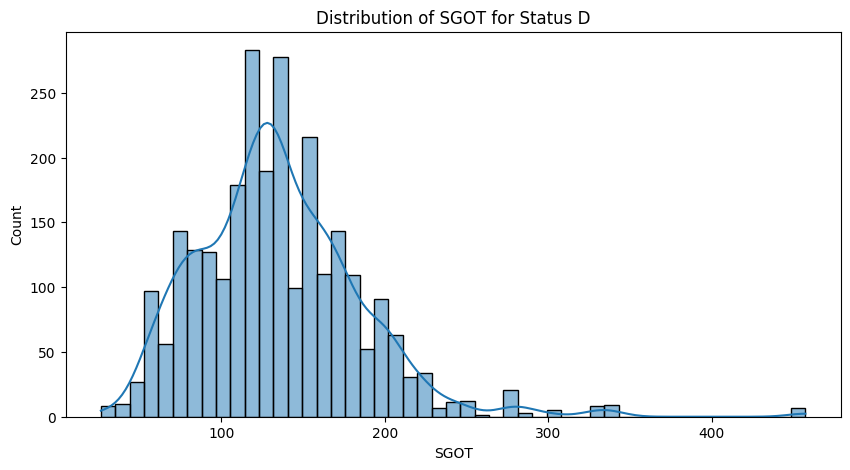

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['SGOT'], kde=True)
  plt.title(f'Distribution of SGOT for Status {status}')
  plt.show()

In [ ]:
df_train['SGOT'].describe()

count    7905.000000
mean      114.604602
std        48.790945
min        26.350000
25%        75.950000
50%       108.500000
75%       137.950000
max       457.250000
Name: SGOT, dtype: float64

In [ ]:
def categorize_sgot(value):
  if 10 < value <= 40:
    return 'Normal'
  elif value > 40:
    return 'Abnormal'
  else:
    return 0

df_train['SGOT_Category'] = df_train['SGOT'].apply(categorize_sgot)
df_test['SGOT_Category'] = df_test['SGOT'].apply(categorize_sgot)

In [ ]:
df_train['SGOT_Category'].value_counts()

SGOT_Category
Abnormal    7885
Normal        20
Name: count, dtype: int64

In [ ]:
df_train.drop(columns='SGOT_Category', axis=1, inplace=True)
df_test.drop(columns='SGOT_Category', axis=1, inplace=True)

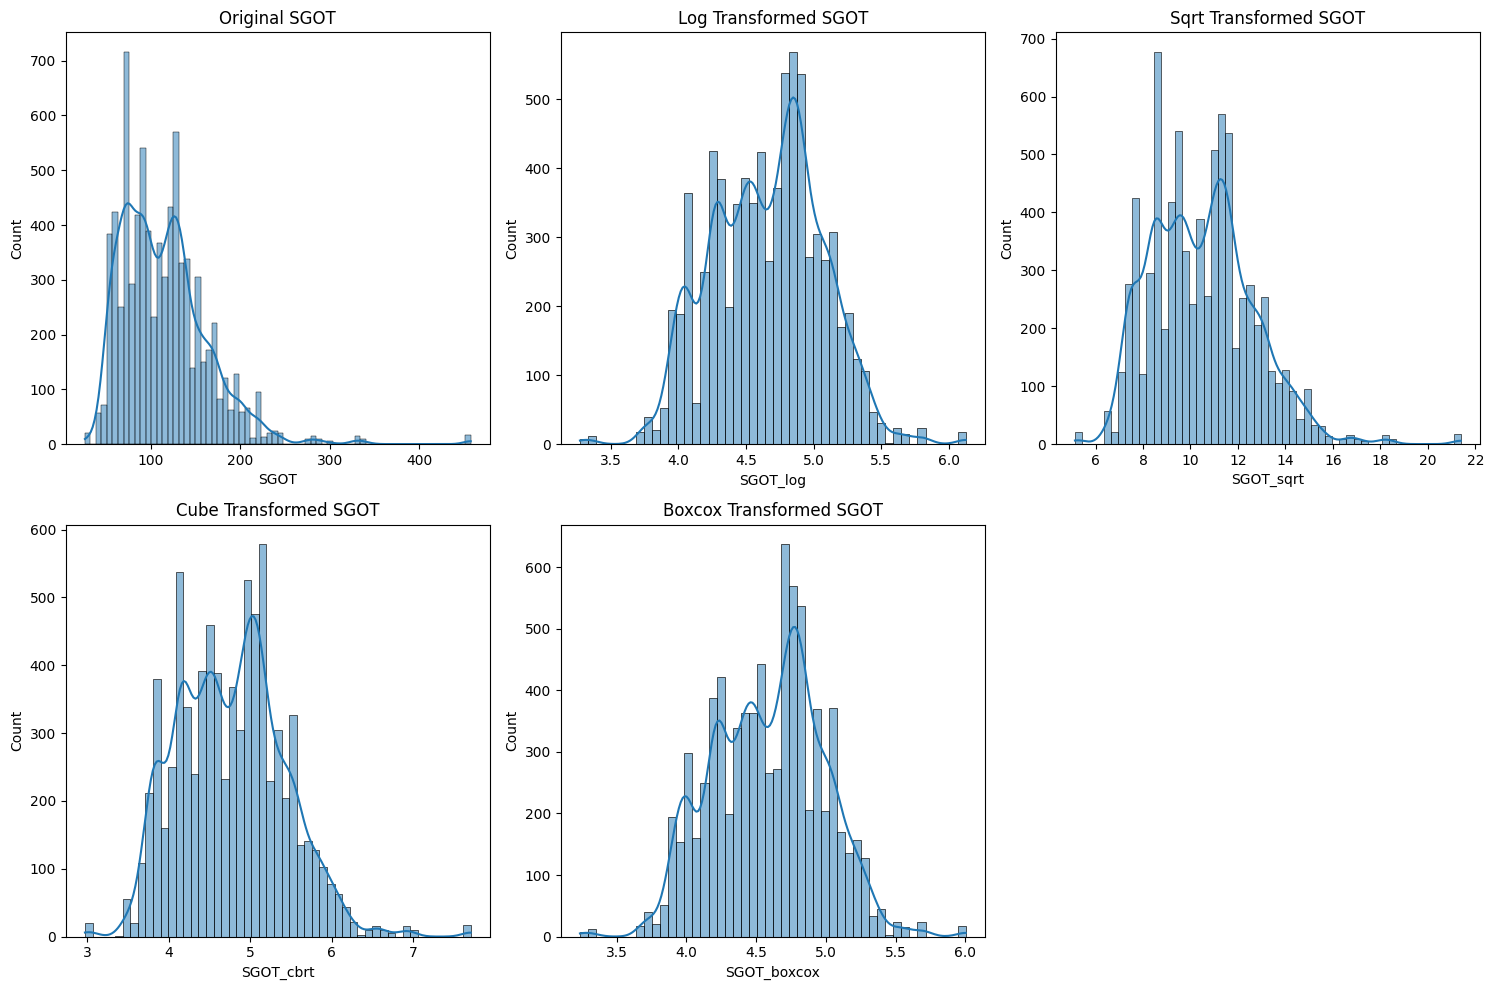

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_log['SGOT'], kde=True)
plt.title('Original SGOT')

plt.subplot(2, 3, 2)
sns.histplot(df_log['SGOT_log'], kde=True)
plt.title('Log Transformed SGOT')

plt.subplot(2, 3, 3)
sns.histplot(df_sqrt['SGOT_sqrt'], kde=True)
plt.title('Sqrt Transformed SGOT')

plt.subplot(2, 3, 4)
sns.histplot(df_cube['SGOT_cbrt'], kde=True)
plt.title('Cube Transformed SGOT')

plt.subplot(2, 3, 5)
sns.histplot(df_boxcox['SGOT_boxcox'], kde=True)
plt.title('Boxcox Transformed SGOT')

plt.tight_layout()
plt.show()

In [ ]:
df_train['SGOT'], _ = stats.boxcox(df_train['SGOT'])
df_test['SGOT'], _ = stats.boxcox(df_test['SGOT'])

Pada dasarnya, kadar SGOT (Aspartate Aminotransferase, juga dikenal sebagai AST) dalam tubuh normalnya berkisar antara 10-40 IU/L, sedangkan penderita sirosis memiliki kadar SGOT selain dari itu. Dalam dataset, rata-rata SGOT lebih tinggi dari normal, menunjukkan adanya kerusakan sel hati pada banyak penderita, yang konsisten dengan sirosis.

Perbandingan kadar SGOT/AST normal dan abnormal sangat jauh dari kata sebanding (yang normal hanya berkisar 0.25% dari keseluruhan data) sehingga tidak dibutuhkan penambahan fitur kategorikal untuk membedakannya.

Fitur SGOT memiliki distribusi cukup skewness, sehingga dibutuhkan transformasi agar data berdistribusi normal, yang di sini menggunakan transformasi boxcox.

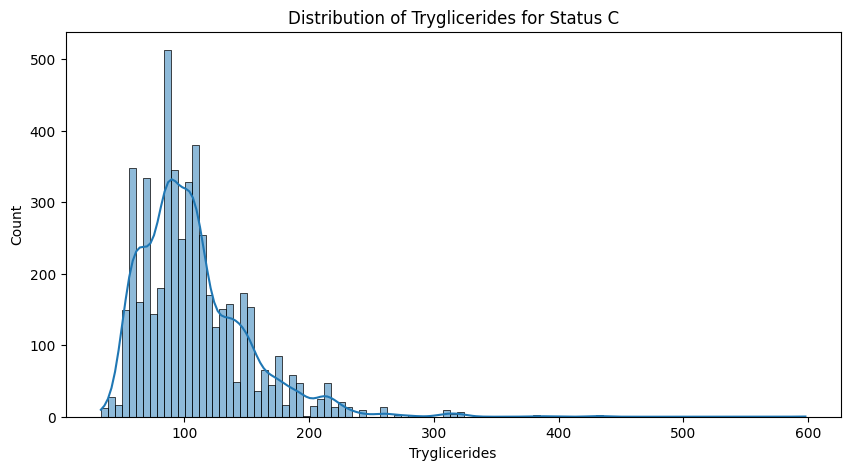

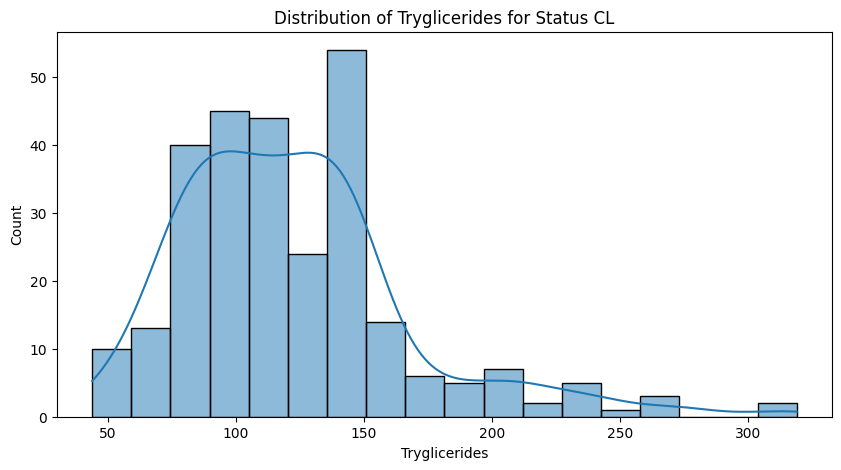

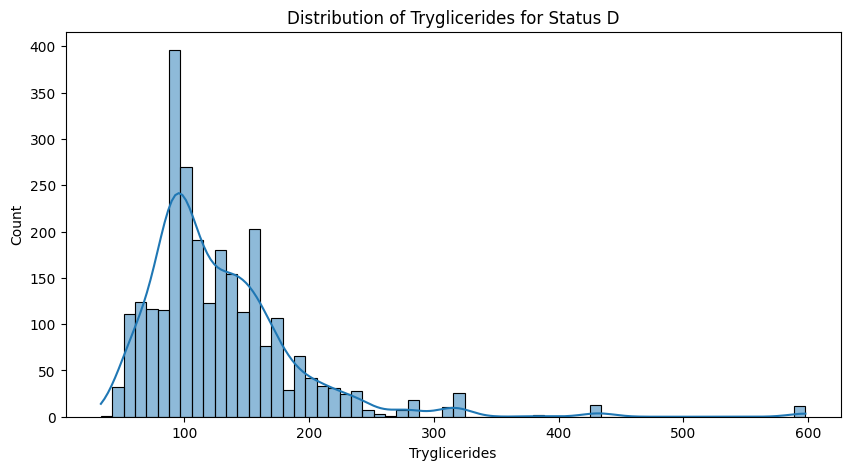

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['Tryglicerides'], kde=True)
  plt.title(f'Distribution of Tryglicerides for Status {status}')
  plt.show()

In [ ]:
df_train['Tryglicerides'].describe()

count    7905.000000
mean      115.340164
std        52.530402
min        33.000000
25%        84.000000
50%       104.000000
75%       139.000000
max       598.000000
Name: Tryglicerides, dtype: float64

In [ ]:
def categorize_tryglicerides(value):
  if value <= 150:
    return 'Normal'
  elif value > 150:
    return 'Abnormal'
  else:
    return 0

df_train['Tryglicerides_Category'] = df_train['Tryglicerides'].apply(categorize_tryglicerides)
df_test['Tryglicerides_Category'] = df_test['Tryglicerides'].apply(categorize_tryglicerides)

In [ ]:
df_train['Tryglicerides_Category'].value_counts()

Tryglicerides_Category
Normal      6413
Abnormal    1492
Name: count, dtype: int64

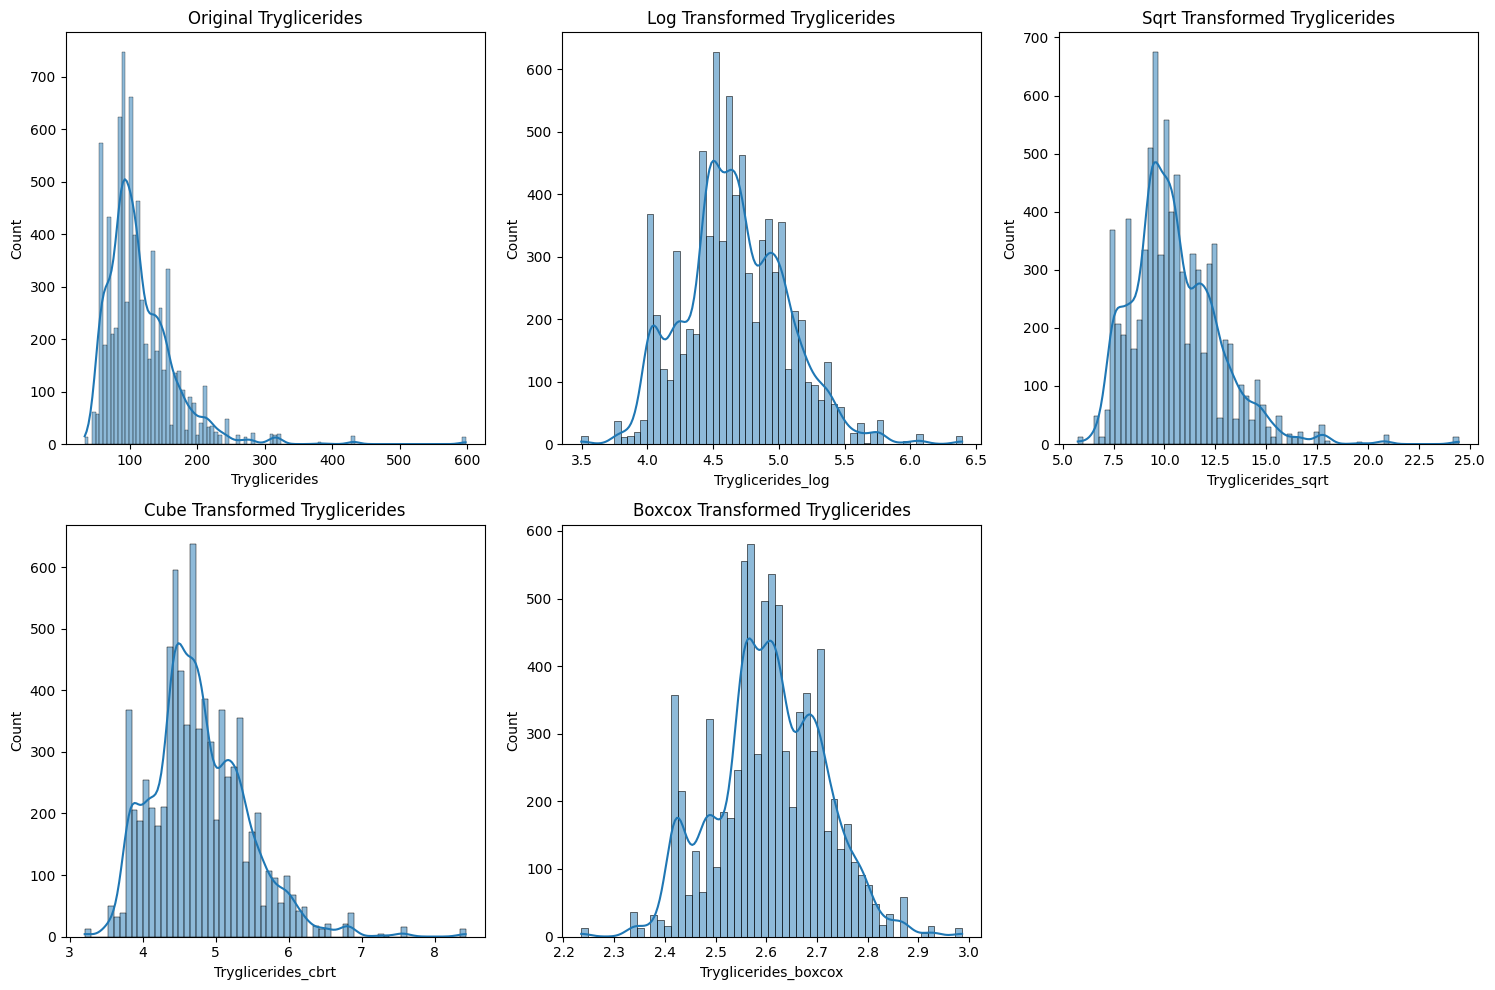

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_log['Tryglicerides'], kde=True)
plt.title('Original Tryglicerides')

plt.subplot(2, 3, 2)
sns.histplot(df_log['Tryglicerides_log'], kde=True)
plt.title('Log Transformed Tryglicerides')

plt.subplot(2, 3, 3)
sns.histplot(df_sqrt['Tryglicerides_sqrt'], kde=True)
plt.title('Sqrt Transformed Tryglicerides')

plt.subplot(2, 3, 4)
sns.histplot(df_cube['Tryglicerides_cbrt'], kde=True)
plt.title('Cube Transformed Tryglicerides')

plt.subplot(2, 3, 5)
sns.histplot(df_boxcox['Tryglicerides_boxcox'], kde=True)
plt.title('Boxcox Transformed Tryglicerides')

plt.tight_layout()
plt.show()

In [ ]:
df_train['Tryglicerides'], _ = stats.boxcox(df_train['Tryglicerides'])
df_test['Tryglicerides'], _ = stats.boxcox(df_test['Tryglicerides'])

Pada dasarnya, kadar tryglicerides dalam tubuh normalnya ialah < 150 mg/dL, sedangkan pada penderita sirosis memiliki kadar tryglicerides yang lebih dari itu. Dalam dataset, nilai rata-rata trigliserida berada dalam rentang normal, namun variasi menunjukkan adanya berbagai kondisi metabolik terkait hati di antara penderita.

Perbandingan kadar tryglicerides normal dan abnormal sebenarnya tidak cukup jauh, namun juga tidak cukup dekat (abnormal berjumlah 18%-an dari keseluruhan dataset). Namun karena kita perlu memprediksi abnormal dengan cukup akurat, maka penambahan fitur kategorikal pada fitur albumin tetap dibutuhkan untuk dapat membedakan kadar normal dan abnormal, terutama pada abnormal. Fitur numerik tetap dipertahankan agar prediksi lebih baik.

Fitur Tryglicerides memiliki distribusi cukup skewness, sehingga dibutuhkan transformasi agar data berdistribusi normal, yang di sini menggunakan transformasi boxcox.

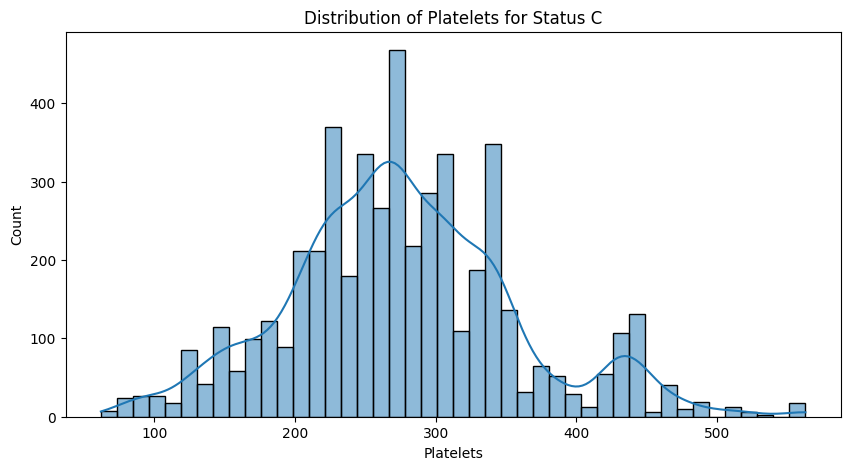

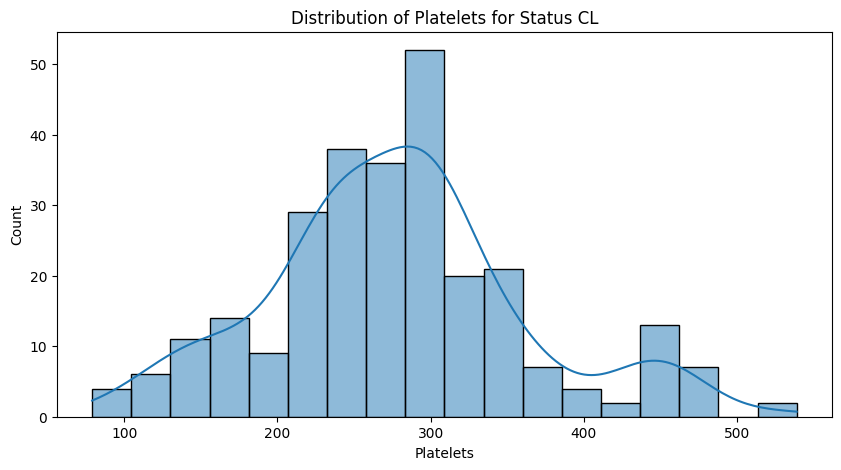

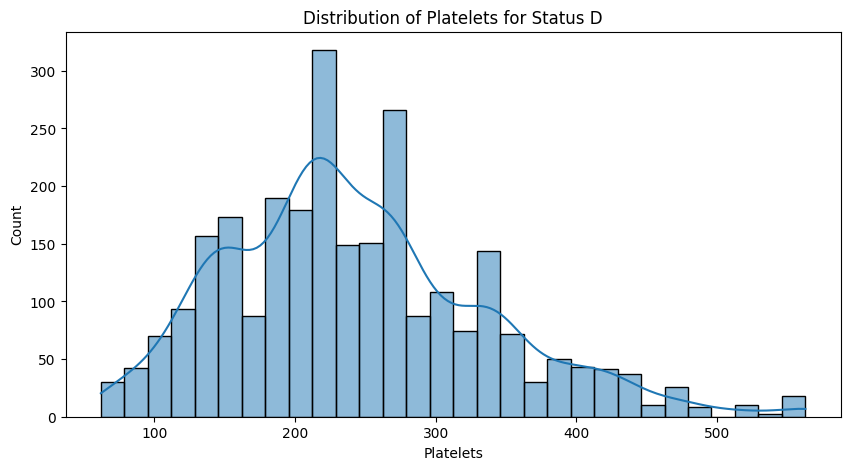

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['Platelets'], kde=True)
  plt.title(f'Distribution of Platelets for Status {status}')
  plt.show()

In [ ]:
df_train['Platelets'].describe()

count    7905.000000
mean      265.228969
std        87.465579
min        62.000000
25%       211.000000
50%       265.000000
75%       316.000000
max       563.000000
Name: Platelets, dtype: float64

In [ ]:
def categorize_platelets(value):
  if 150 < value <= 450:
    return 'Normal'
  elif value <= 150 or value > 450:
    return 'Abnormal'
  else:
    return 0

df_train['Platelets_Category'] = df_train['Platelets'].apply(categorize_platelets)
df_test['Platelets_Category'] = df_test['Platelets'].apply(categorize_platelets)

In [ ]:
df_train['Platelets_Category'].value_counts()

Platelets_Category
Normal      7015
Abnormal     890
Name: count, dtype: int64

Pada dasarnya, kadar platelets/trombosit dalam tubuh normalnya berkisar antara 150-450 x 10^9/L, sedangkan pada penderita sirosis memiliki kadar platelets/trombosit selain dari itu. Dalam dataset, rata-rata trombosit sebesar 265 mengindikasikan bahwa, meskipun beberapa penderita mungkin mengalami trombositopenia, banyak penderita lain dalam dataset yang memiliki jumlah trombosit dalam kisaran normal hingga tinggi. Angka ini berada dalam rentang normal umum, yang berarti dataset mencakup individu dengan trombosit normal atau bahkan lebih tinggi.

Perbandingan kadar platelets/trombosit normal dan abnormal sebenarnya tidak cukup jauh, namun juga tidak cukup dekat (abnormal berjumlah 11%-an dari keseluruhan dataset). Namun karena kita perlu memprediksi abnormal dengan cukup akurat, maka penambahan fitur kategorikal pada fitur albumin tetap dibutuhkan untuk dapat membedakan kadar normal dan abnormal, terutama pada abnormal. Fitur numerik tetap dipertahankan agar prediksi lebih baik.

Fitur Platelets cukup berdistribusi normal sehingga tidak perlu dilakukan transformasi.

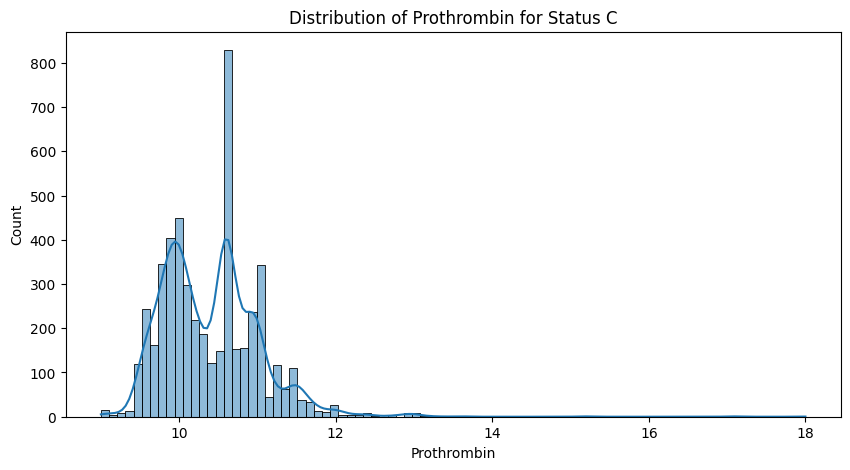

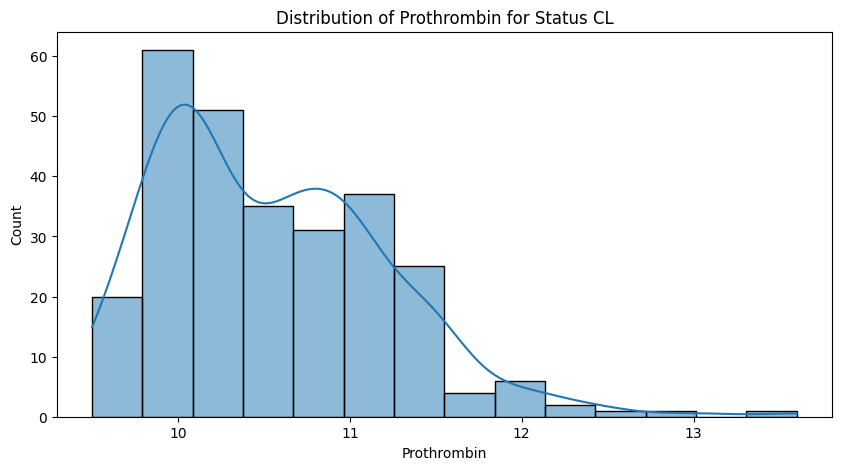

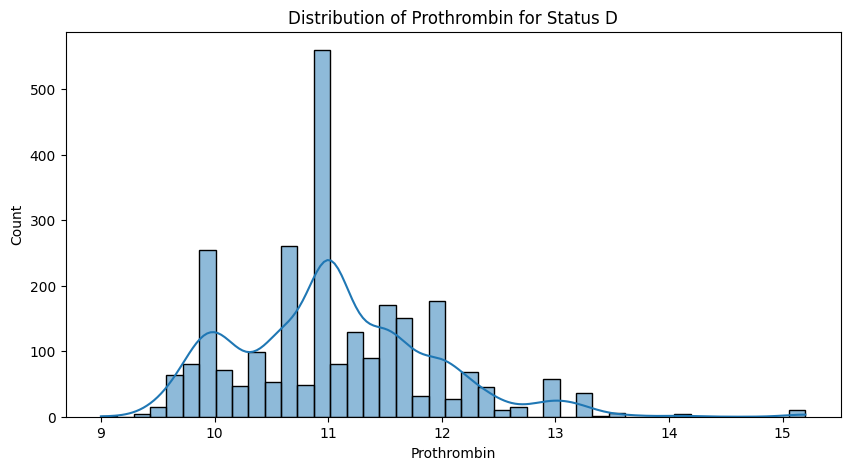

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['Prothrombin'], kde=True)
  plt.title(f'Distribution of Prothrombin for Status {status}')
  plt.show()

In [ ]:
df_train['Prothrombin'].describe()

count    7905.000000
mean       10.629462
std         0.781735
min         9.000000
25%        10.000000
50%        10.600000
75%        11.000000
max        18.000000
Name: Prothrombin, dtype: float64

In [ ]:
def categorize_prothrombin(value):
  if 11 <= value <= 13.5:
    return 'Normal'
  elif value < 11 or value > 13.5:
    return 'Abnormal'
  else:
    return 0

df_train['Prothrombin_Category'] = df_train['Prothrombin'].apply(categorize_prothrombin)
df_test['Prothrombin_Category'] = df_test['Prothrombin'].apply(categorize_prothrombin)

In [ ]:
df_train['Prothrombin_Category'].value_counts()

Prothrombin_Category
Abnormal    5423
Normal      2482
Name: count, dtype: int64

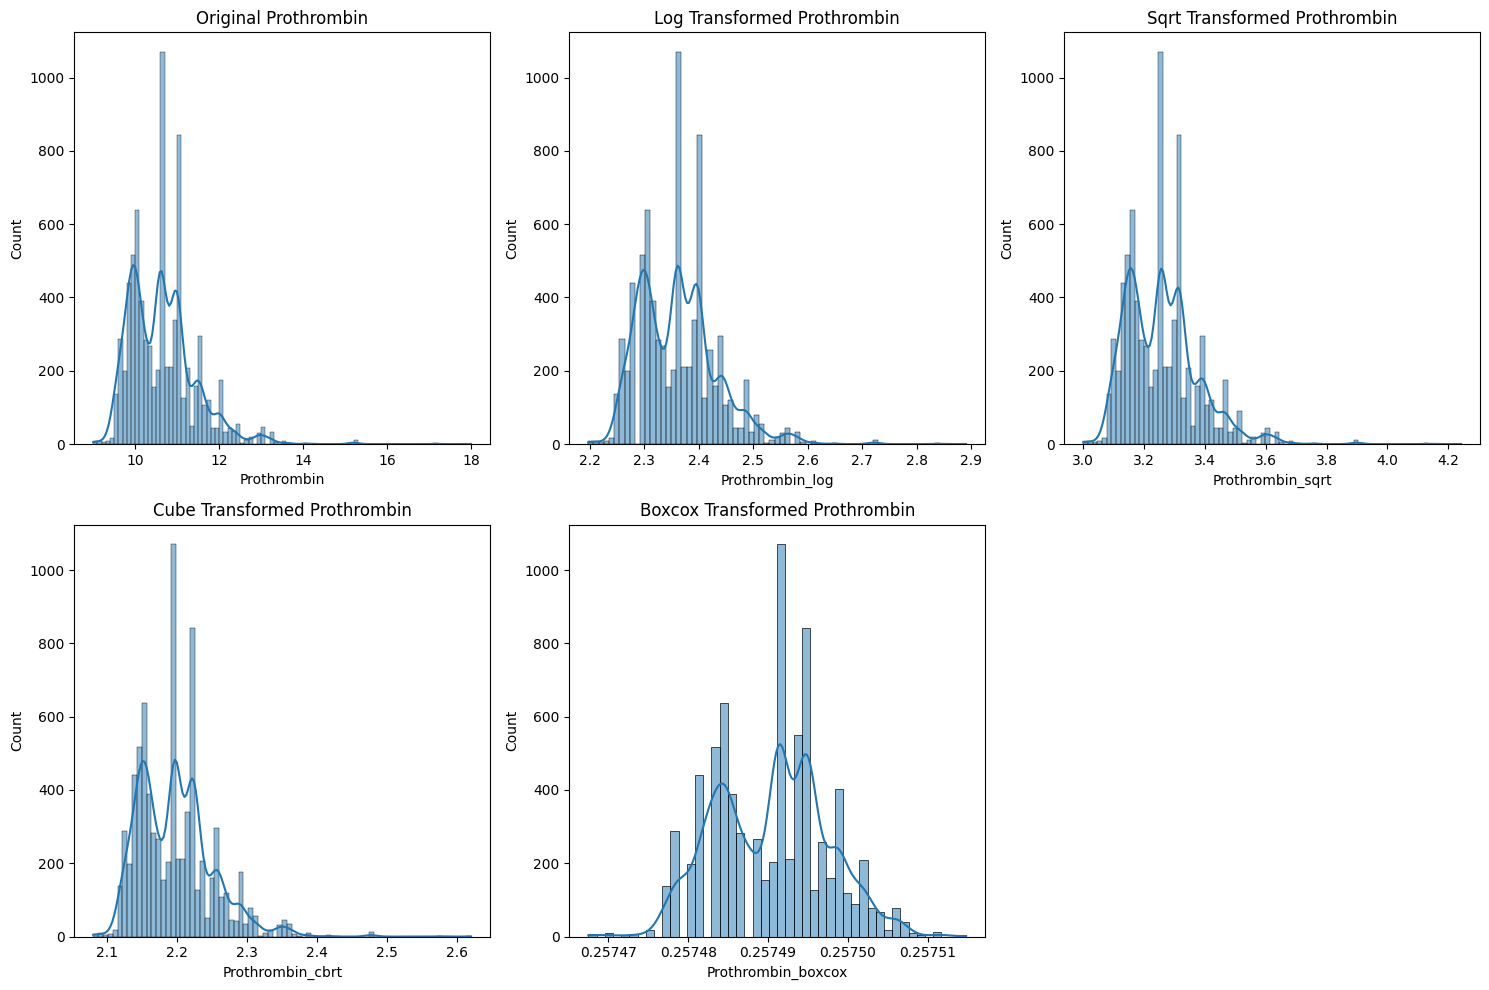

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_log['Prothrombin'], kde=True)
plt.title('Original Prothrombin')

plt.subplot(2, 3, 2)
sns.histplot(df_log['Prothrombin_log'], kde=True)
plt.title('Log Transformed Prothrombin')

plt.subplot(2, 3, 3)
sns.histplot(df_sqrt['Prothrombin_sqrt'], kde=True)
plt.title('Sqrt Transformed Prothrombin')

plt.subplot(2, 3, 4)
sns.histplot(df_cube['Prothrombin_cbrt'], kde=True)
plt.title('Cube Transformed Prothrombin')

plt.subplot(2, 3, 5)
sns.histplot(df_boxcox['Prothrombin_boxcox'], kde=True)
plt.title('Boxcox Transformed Prothrombin')

plt.tight_layout()
plt.show()

In [ ]:
df_train['Prothrombin'], _ = stats.boxcox(df_train['Prothrombin'])
df_test['Prothrombin'], _ = stats.boxcox(df_test['Prothrombin'])

Pada dasarnya, waktu prothrombin dalam tubuh normalnya berkisar antara 11-13.5 detik.

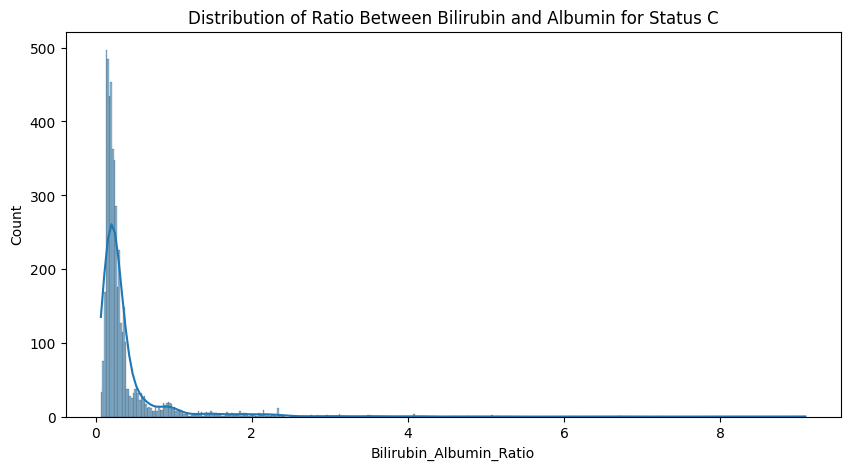

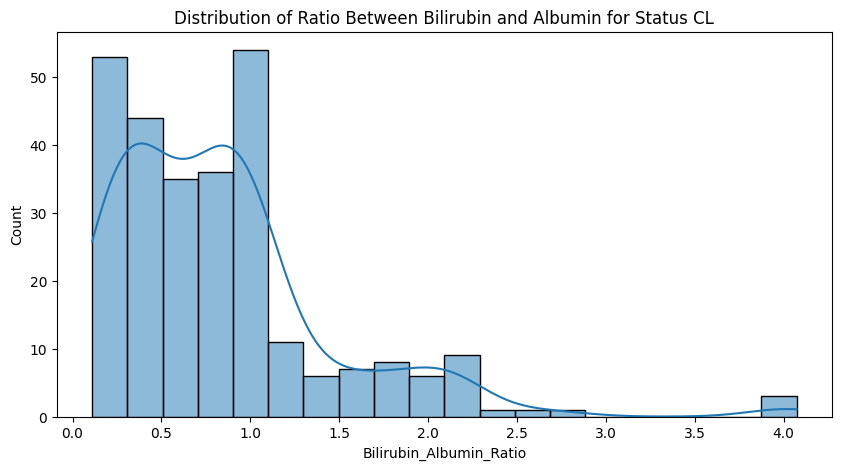

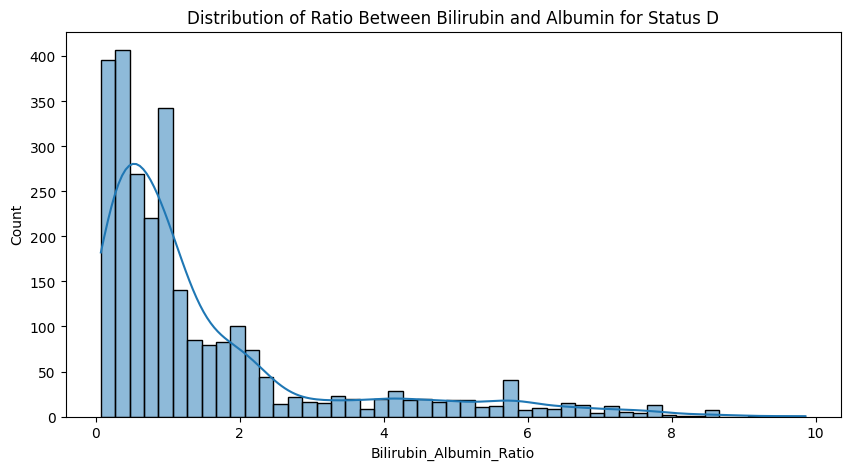

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['Bilirubin_Albumin_Ratio'], kde=True)
  plt.title(f'Distribution of Ratio Between Bilirubin and Albumin for Status {status}')
  plt.show()

In [ ]:
df_train['Bilirubin_Albumin_Ratio'].describe()

count    7905.000000
mean        0.776456
std         1.214897
min         0.068182
25%         0.193966
50%         0.301508
75%         0.847458
max         9.859155
Name: Bilirubin_Albumin_Ratio, dtype: float64

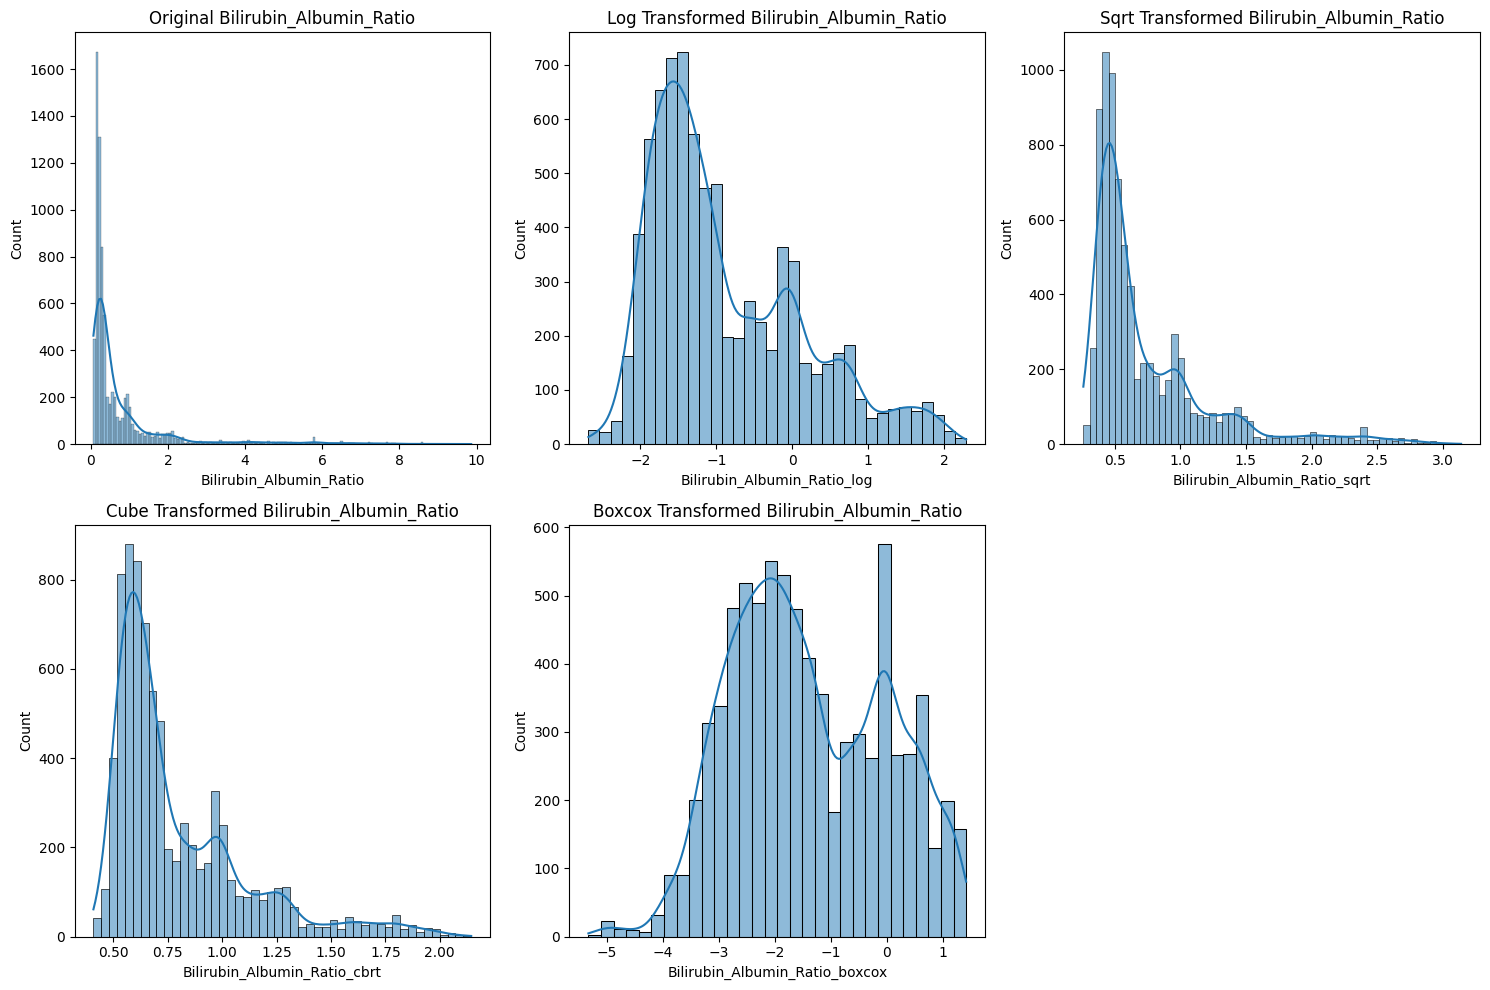

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_log['Bilirubin_Albumin_Ratio'], kde=True)
plt.title('Original Bilirubin_Albumin_Ratio')

plt.subplot(2, 3, 2)
sns.histplot(df_log['Bilirubin_Albumin_Ratio_log'], kde=True)
plt.title('Log Transformed Bilirubin_Albumin_Ratio')

plt.subplot(2, 3, 3)
sns.histplot(df_sqrt['Bilirubin_Albumin_Ratio_sqrt'], kde=True)
plt.title('Sqrt Transformed Bilirubin_Albumin_Ratio')

plt.subplot(2, 3, 4)
sns.histplot(df_cube['Bilirubin_Albumin_Ratio_cbrt'], kde=True)
plt.title('Cube Transformed Bilirubin_Albumin_Ratio')

plt.subplot(2, 3, 5)
sns.histplot(df_boxcox['Bilirubin_Albumin_Ratio_boxcox'], kde=True)
plt.title('Boxcox Transformed Bilirubin_Albumin_Ratio')

plt.tight_layout()
plt.show()

In [ ]:
df_train['Bilirubin_Albumin_Ratio'], _ = stats.boxcox(df_train['Bilirubin_Albumin_Ratio'])
df_test['Bilirubin_Albumin_Ratio'], _ = stats.boxcox(df_test['Bilirubin_Albumin_Ratio'])

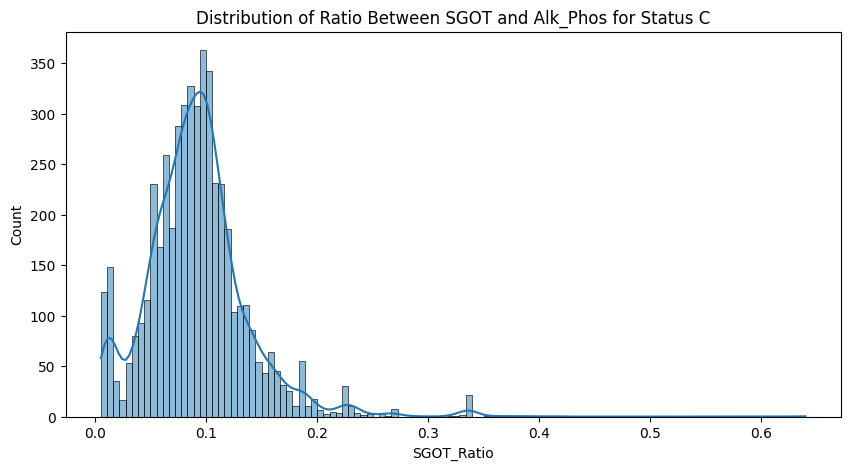

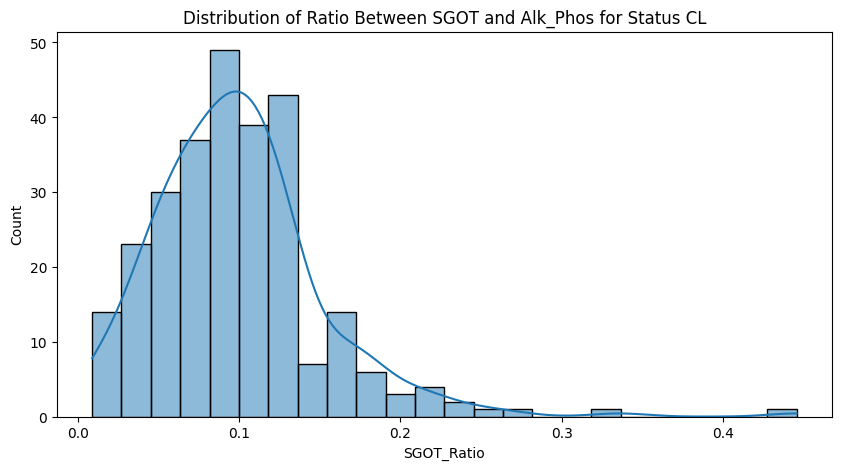

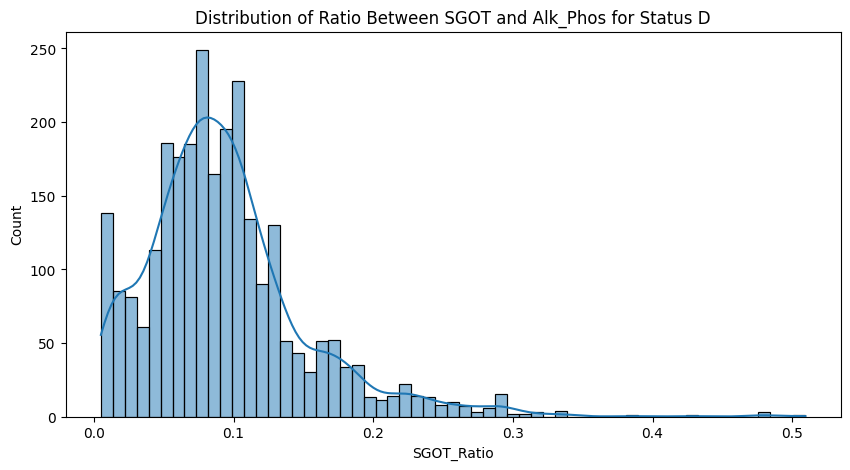

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['SGOT_Ratio'], kde=True)
  plt.title(f'Distribution of Ratio Between SGOT and Alk_Phos for Status {status}')
  plt.show()

In [ ]:
df_train['SGOT_Ratio'].describe()

count    7905.000000
mean        0.093060
std         0.051323
min         0.004931
25%         0.062434
50%         0.088777
75%         0.113761
max         0.640406
Name: SGOT_Ratio, dtype: float64

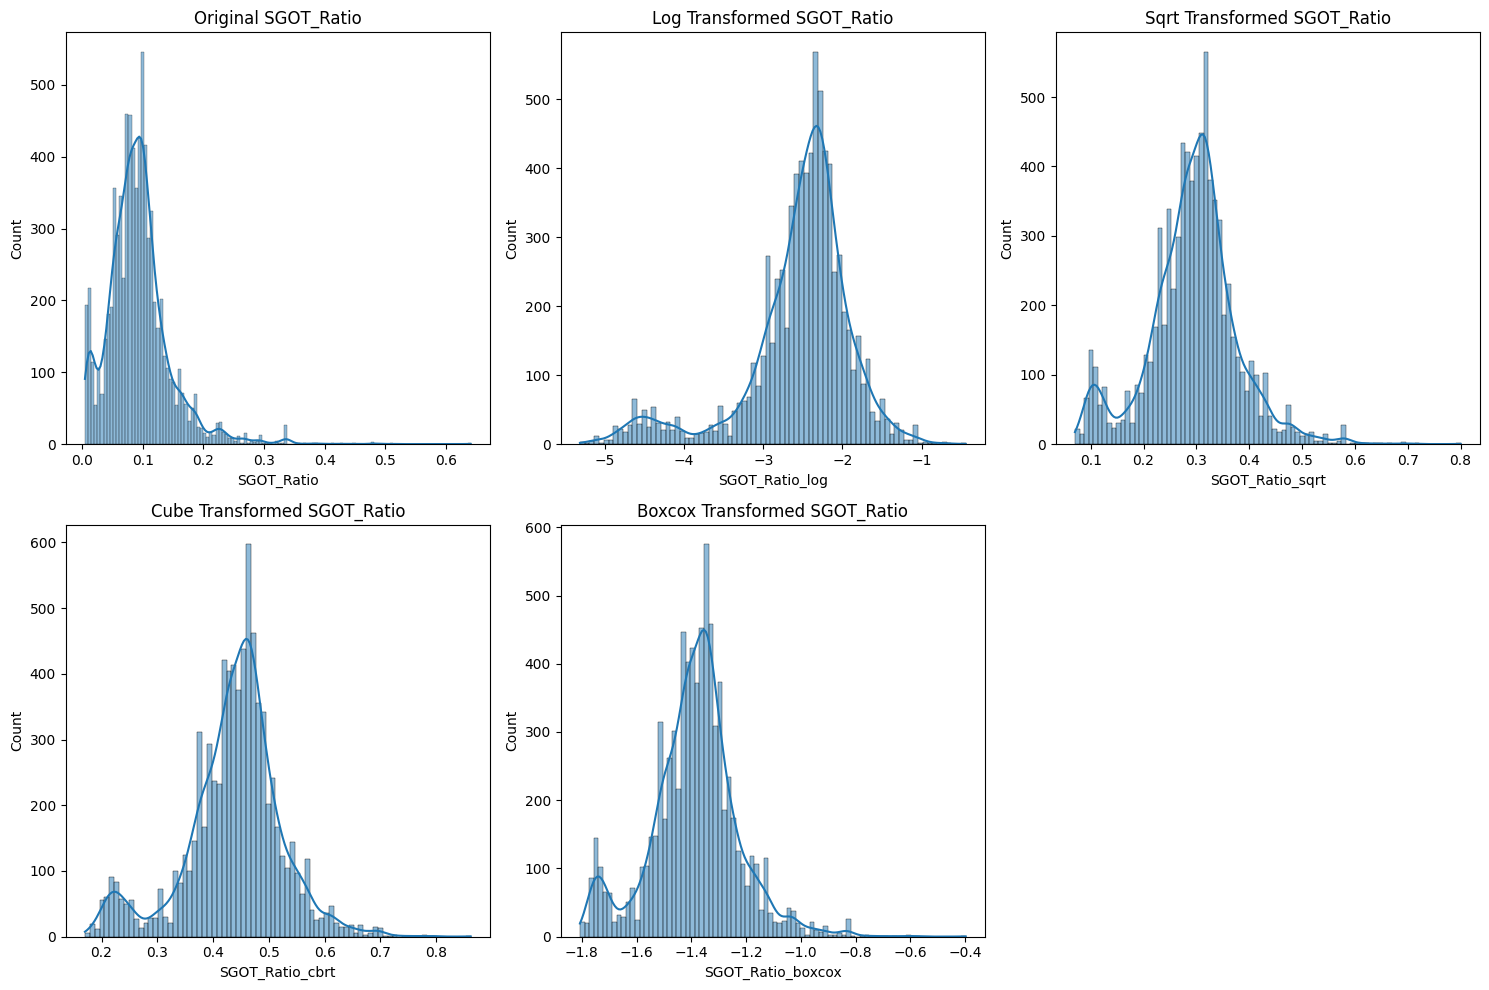

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_log['SGOT_Ratio'], kde=True)
plt.title('Original SGOT_Ratio')

plt.subplot(2, 3, 2)
sns.histplot(df_log['SGOT_Ratio_log'], kde=True)
plt.title('Log Transformed SGOT_Ratio')

plt.subplot(2, 3, 3)
sns.histplot(df_sqrt['SGOT_Ratio_sqrt'], kde=True)
plt.title('Sqrt Transformed SGOT_Ratio')

plt.subplot(2, 3, 4)
sns.histplot(df_cube['SGOT_Ratio_cbrt'], kde=True)
plt.title('Cube Transformed SGOT_Ratio')

plt.subplot(2, 3, 5)
sns.histplot(df_boxcox['SGOT_Ratio_boxcox'], kde=True)
plt.title('Boxcox Transformed SGOT_Ratio')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the IQR for SGOT_Ratio_log
Q1_log = df_log['SGOT_Ratio_log'].quantile(0.25)
Q3_log = df_log['SGOT_Ratio_log'].quantile(0.75)
IQR_log = Q3_log - Q1_log
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

# Identify outliers in SGOT_Ratio_log
outliers_log = df_log[(df_log['SGOT_Ratio_log'] < lower_bound_log) | (df_log['SGOT_Ratio_log'] > upper_bound_log)]

# Calculate the IQR for SGOT_Ratio_cbrt
Q1_cbrt = df_cube['SGOT_Ratio_cbrt'].quantile(0.25)
Q3_cbrt = df_cube['SGOT_Ratio_cbrt'].quantile(0.75)
IQR_cbrt = Q3_cbrt - Q1_cbrt
lower_bound_cbrt = Q1_cbrt - 1.5 * IQR_cbrt
upper_bound_cbrt = Q3_cbrt + 1.5 * IQR_cbrt

# Identify outliers in SGOT_Ratio_cbrt
outliers_cbrt = df_cube[(df_cube['SGOT_Ratio_cbrt'] < lower_bound_cbrt) | (df_cube['SGOT_Ratio_cbrt'] > upper_bound_cbrt)]

# Print the number of outliers for each transformed feature
print(f"Number of outliers in SGOT_Ratio_log: {len(outliers_log)}")
print(f"Number of outliers in SGOT_Ratio_cbrt: {len(outliers_cbrt)}")

Number of outliers in SGOT_Ratio_log: 649
Number of outliers in SGOT_Ratio_cbrt: 653


In [ ]:
df_train['SGOT_Ratio'] = np.log(df_train['SGOT_Ratio'])
df_test['SGOT_Ratio'] = np.log(df_test['SGOT_Ratio'])

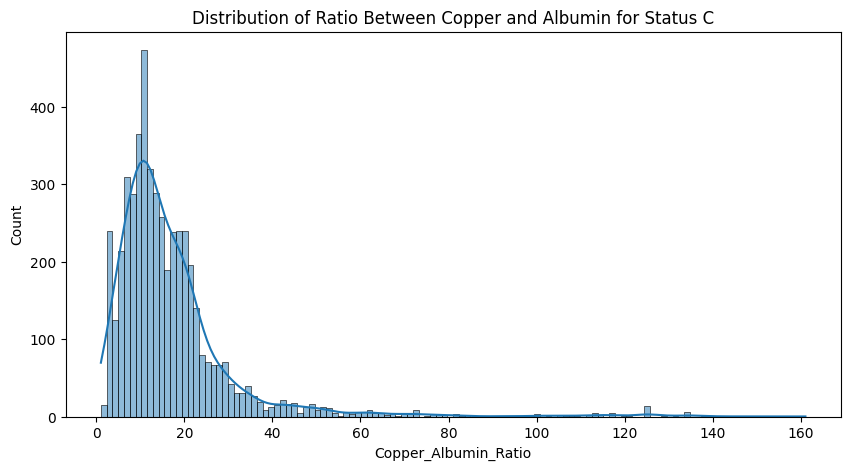

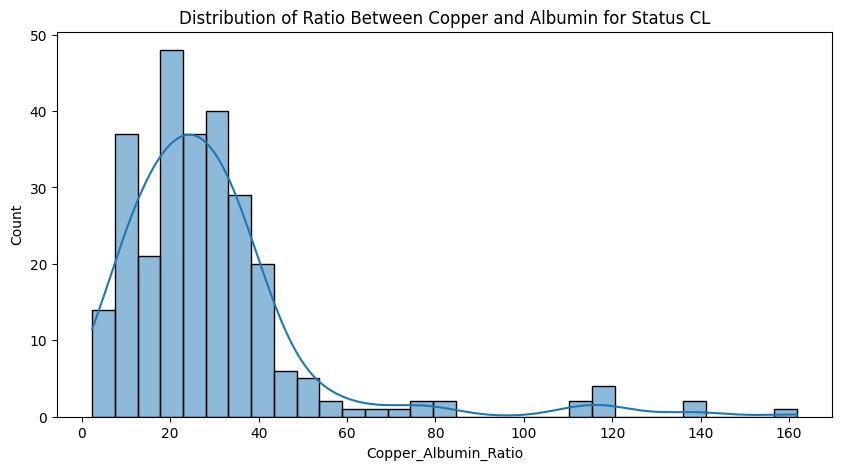

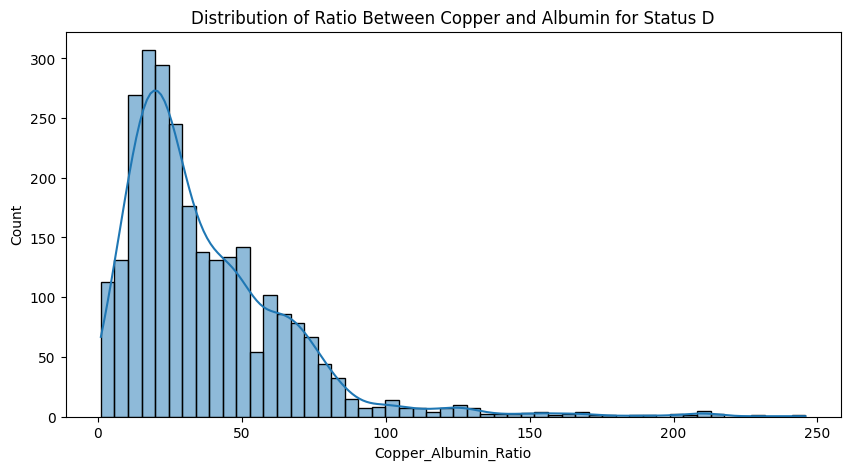

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['Copper_Albumin_Ratio'], kde=True)
  plt.title(f'Distribution of Ratio Between Copper and Albumin for Status {status}')
  plt.show()

In [ ]:
df_train['Copper_Albumin_Ratio'].describe()

count    7905.000000
mean       24.415203
std        23.392529
min         1.015228
25%        10.625000
50%        17.500000
75%        28.767123
max       245.814978
Name: Copper_Albumin_Ratio, dtype: float64

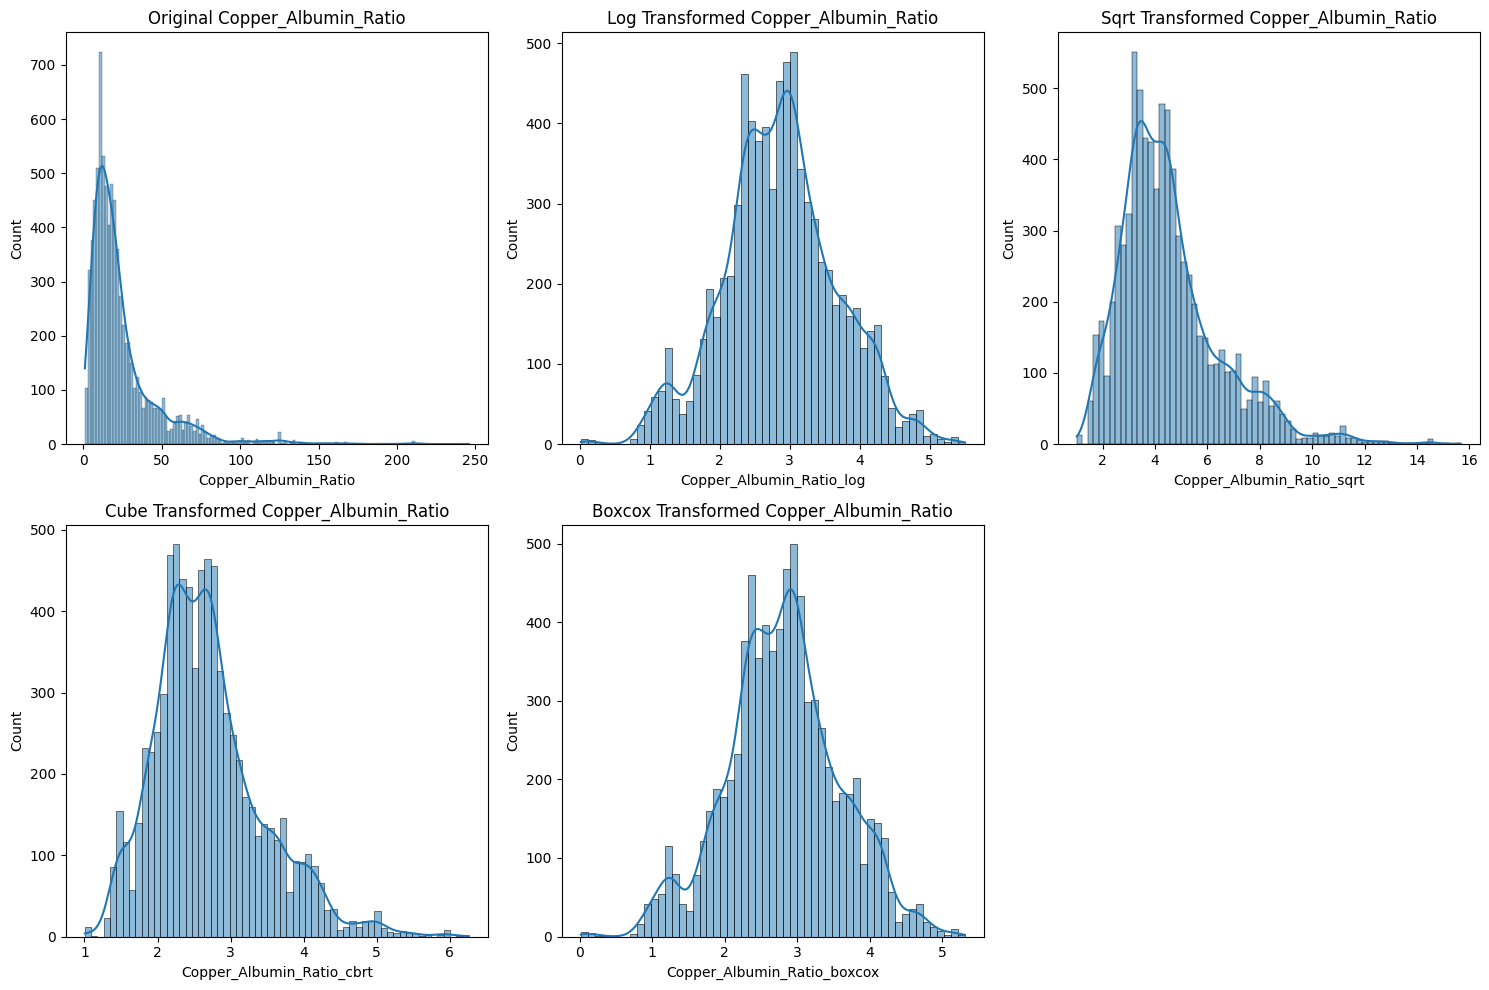

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_log['Copper_Albumin_Ratio'], kde=True)
plt.title('Original Copper_Albumin_Ratio')

plt.subplot(2, 3, 2)
sns.histplot(df_log['Copper_Albumin_Ratio_log'], kde=True)
plt.title('Log Transformed Copper_Albumin_Ratio')

plt.subplot(2, 3, 3)
sns.histplot(df_sqrt['Copper_Albumin_Ratio_sqrt'], kde=True)
plt.title('Sqrt Transformed Copper_Albumin_Ratio')

plt.subplot(2, 3, 4)
sns.histplot(df_cube['Copper_Albumin_Ratio_cbrt'], kde=True)
plt.title('Cube Transformed Copper_Albumin_Ratio')

plt.subplot(2, 3, 5)
sns.histplot(df_boxcox['Copper_Albumin_Ratio_boxcox'], kde=True)
plt.title('Boxcox Transformed Copper_Albumin_Ratio')

plt.tight_layout()
plt.show()

In [ ]:
df_train['Copper_Albumin_Ratio'], _ = stats.boxcox(df_train['Copper_Albumin_Ratio'])
df_test['Copper_Albumin_Ratio'], _ = stats.boxcox(df_test['Copper_Albumin_Ratio'])

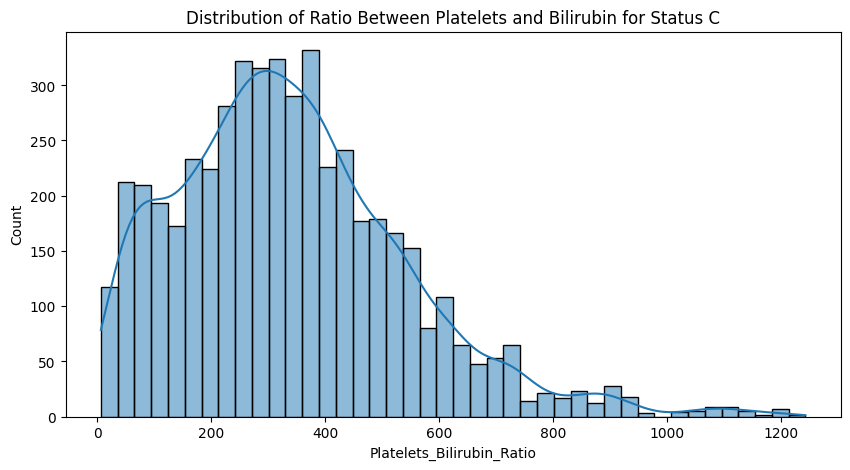

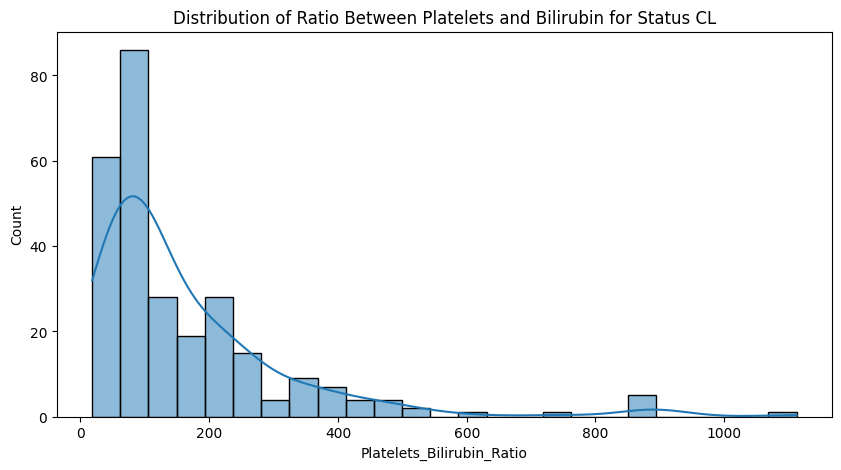

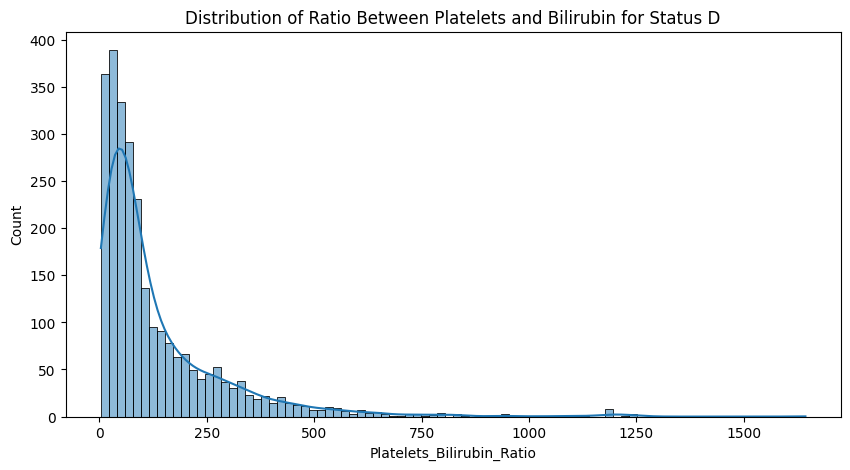

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['Platelets_Bilirubin_Ratio'], kde=True)
  plt.title(f'Distribution of Ratio Between Platelets and Bilirubin for Status {status}')
  plt.show()

In [ ]:
df_train['Platelets_Bilirubin_Ratio'].describe()

count    7905.000000
mean      264.576486
std       213.139522
min         3.555556
25%        82.608696
50%       229.090909
75%       385.000000
max      1643.333333
Name: Platelets_Bilirubin_Ratio, dtype: float64

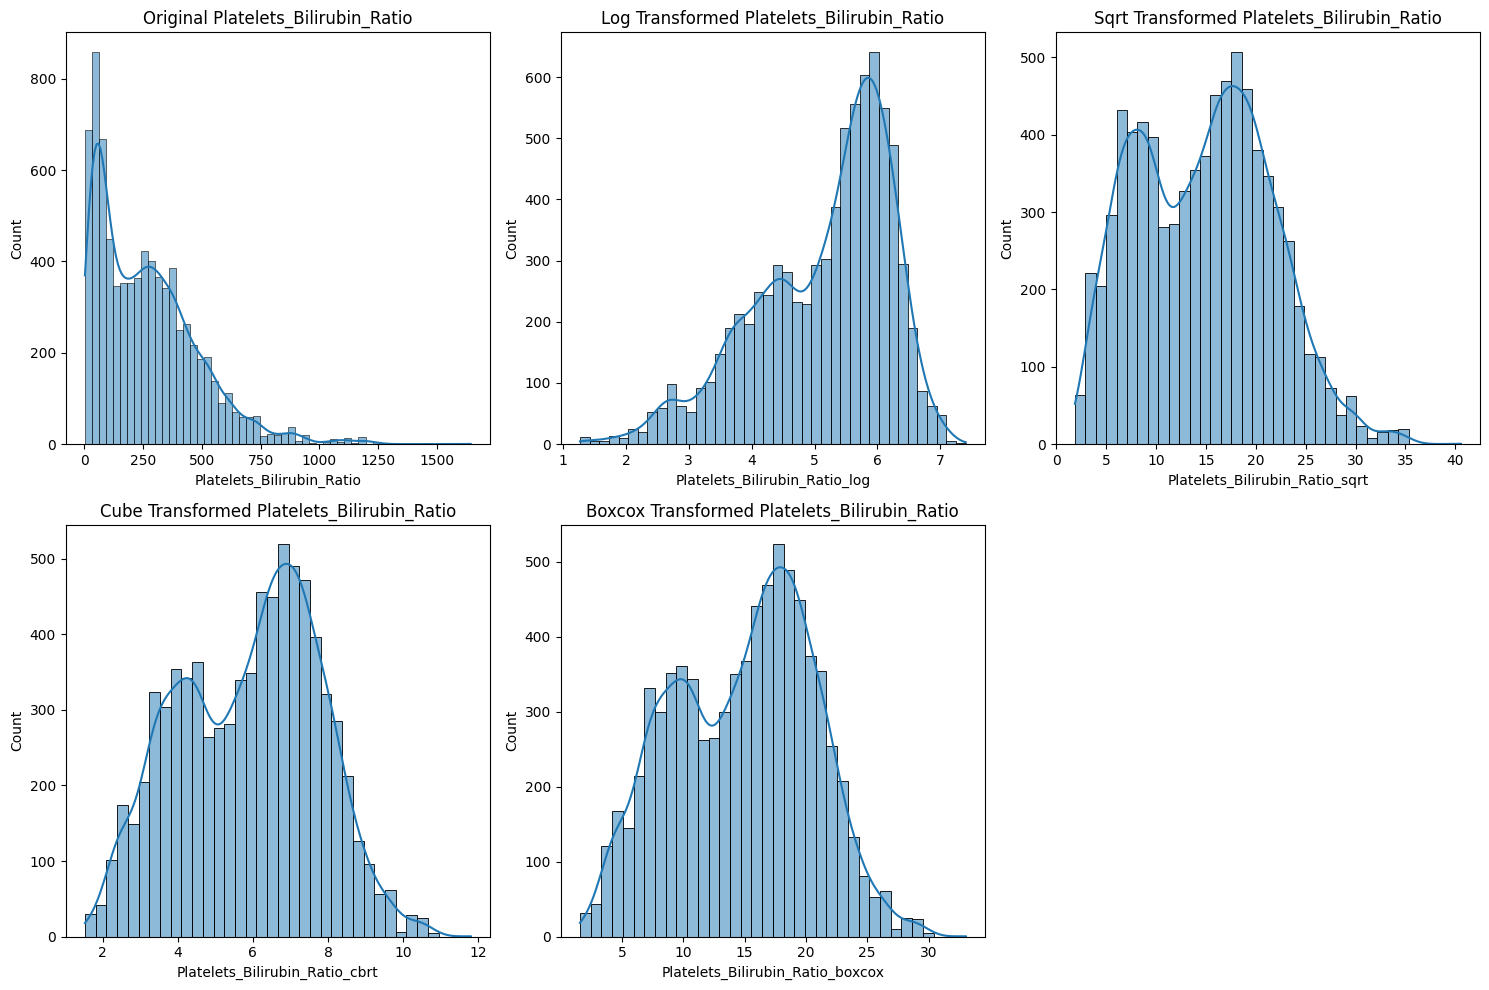

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_log['Platelets_Bilirubin_Ratio'], kde=True)
plt.title('Original Platelets_Bilirubin_Ratio')

plt.subplot(2, 3, 2)
sns.histplot(df_log['Platelets_Bilirubin_Ratio_log'], kde=True)
plt.title('Log Transformed Platelets_Bilirubin_Ratio')

plt.subplot(2, 3, 3)
sns.histplot(df_sqrt['Platelets_Bilirubin_Ratio_sqrt'], kde=True)
plt.title('Sqrt Transformed Platelets_Bilirubin_Ratio')

plt.subplot(2, 3, 4)
sns.histplot(df_cube['Platelets_Bilirubin_Ratio_cbrt'], kde=True)
plt.title('Cube Transformed Platelets_Bilirubin_Ratio')

plt.subplot(2, 3, 5)
sns.histplot(df_boxcox['Platelets_Bilirubin_Ratio_boxcox'], kde=True)
plt.title('Boxcox Transformed Platelets_Bilirubin_Ratio')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the IQR for Platelets_Bilirubin_Ratio_log
Q1_log = df_log['Platelets_Bilirubin_Ratio_log'].quantile(0.25)
Q3_log = df_log['Platelets_Bilirubin_Ratio_log'].quantile(0.75)
IQR_log = Q3_log - Q1_log
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

# Identify outliers in Platelets_Bilirubin_Ratio_log
outliers_log = df_log[(df_log['Platelets_Bilirubin_Ratio_log'] < lower_bound_log) | (df_log['Platelets_Bilirubin_Ratio_log'] > upper_bound_log)]

# Calculate the IQR for Platelets_Bilirubin_Ratio_sqrt
Q1_sqrt = df_sqrt['Platelets_Bilirubin_Ratio_sqrt'].quantile(0.25)
Q3_sqrt = df_sqrt['Platelets_Bilirubin_Ratio_sqrt'].quantile(0.75)
IQR_sqrt = Q3_sqrt - Q1_sqrt
lower_bound_sqrt = Q1_sqrt - 1.5 * IQR_sqrt
upper_bound_sqrt = Q3_sqrt + 1.5 * IQR_sqrt

# Identify outliers in Platelets_Bilirubin_Ratio_sqrt
outliers_sqrt = df_sqrt[(df_sqrt['Platelets_Bilirubin_Ratio_sqrt'] < lower_bound_sqrt) | (df_sqrt['Platelets_Bilirubin_Ratio_sqrt'] > upper_bound_sqrt)]

# Calculate the IQR for Platelets_Bilirubin_Ratio_cbrt
Q1_cbrt = df_cube['Platelets_Bilirubin_Ratio_cbrt'].quantile(0.25)
Q3_cbrt = df_cube['Platelets_Bilirubin_Ratio_cbrt'].quantile(0.75)
IQR_cbrt = Q3_cbrt - Q1_cbrt
lower_bound_cbrt = Q1_cbrt - 1.5 * IQR_cbrt
upper_bound_cbrt = Q3_cbrt + 1.5 * IQR_cbrt

# Identify outliers in Platelets_Bilirubin_Ratio_cbrt
outliers_cbrt = df_cube[(df_cube['Platelets_Bilirubin_Ratio_cbrt'] < lower_bound_cbrt) | (df_cube['Platelets_Bilirubin_Ratio_cbrt'] > upper_bound_cbrt)]

# Calculate the IQR for Platelets_Bilirubin_Ratio_boxcox
Q1_boxcox = df_boxcox['Platelets_Bilirubin_Ratio_boxcox'].quantile(0.25)
Q3_boxcox = df_boxcox['Platelets_Bilirubin_Ratio_boxcox'].quantile(0.75)
IQR_boxcox = Q3_boxcox - Q1_boxcox
lower_bound_boxcox = Q1_boxcox - 1.5 * IQR_boxcox
upper_bound_boxcox = Q3_boxcox + 1.5 * IQR_boxcox

# Identify outliers in Platelets_Bilirubin_Ratio_boxcox
outliers_boxcox = df_boxcox[(df_boxcox['Platelets_Bilirubin_Ratio_boxcox'] < lower_bound_boxcox) | (df_boxcox['Platelets_Bilirubin_Ratio_boxcox'] > upper_bound_boxcox)]

# Print the number of outliers for each transformed feature
print(f"Number of outliers in Platelets_Bilirubin_Ratio_log: {len(outliers_log)}")
print(f"Number of outliers in Platelets_Bilirubin_Ratio_sqrt: {len(outliers_sqrt)}")
print(f"Number of outliers in Platelets_Bilirubin_Ratio_cbrt: {len(outliers_cbrt)}")
print(f"Number of outliers in Platelets_Bilirubin_Ratio_boxcox: {len(outliers_boxcox)}")

Number of outliers in Platelets_Bilirubin_Ratio_log: 55
Number of outliers in Platelets_Bilirubin_Ratio_sqrt: 1
Number of outliers in Platelets_Bilirubin_Ratio_cbrt: 1
Number of outliers in Platelets_Bilirubin_Ratio_boxcox: 1


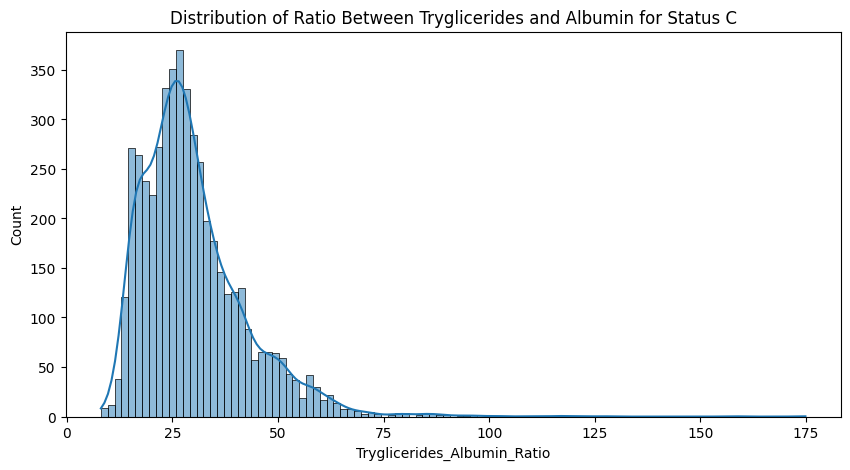

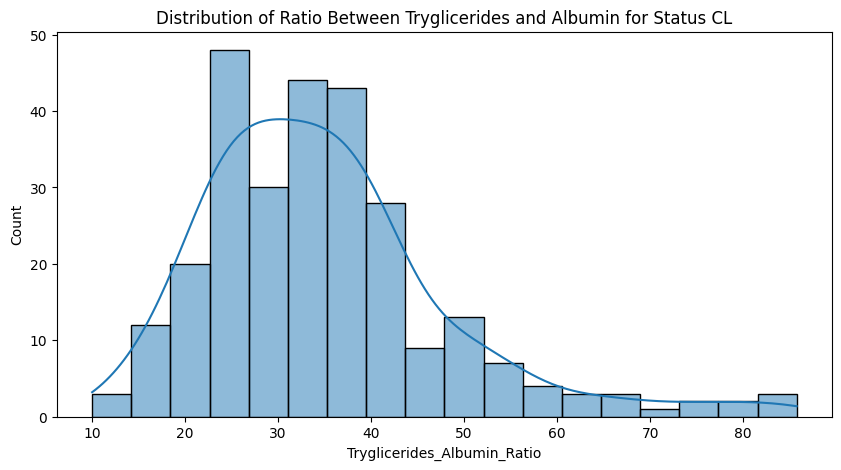

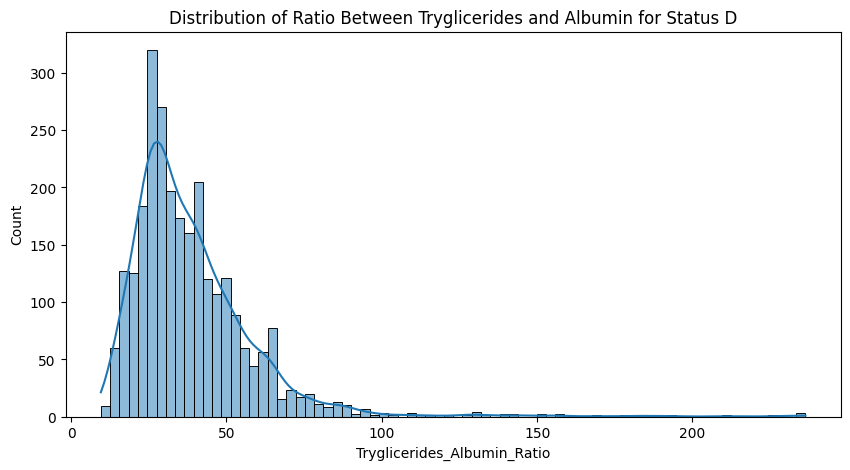

In [ ]:
for status in status_of_interest:
  plt.figure(figsize=(10, 5))
  sns.histplot(df_train[df_train['Status'] == status]['Tryglicerides_Albumin_Ratio'], kde=True)
  plt.title(f'Distribution of Ratio Between Tryglicerides and Albumin for Status {status}')
  plt.show()

In [ ]:
df_train['Tryglicerides_Albumin_Ratio'].describe()

count    7905.000000
mean       33.036070
std        16.335029
min         8.068460
25%        23.055556
50%        29.189189
75%        39.612188
max       236.363636
Name: Tryglicerides_Albumin_Ratio, dtype: float64

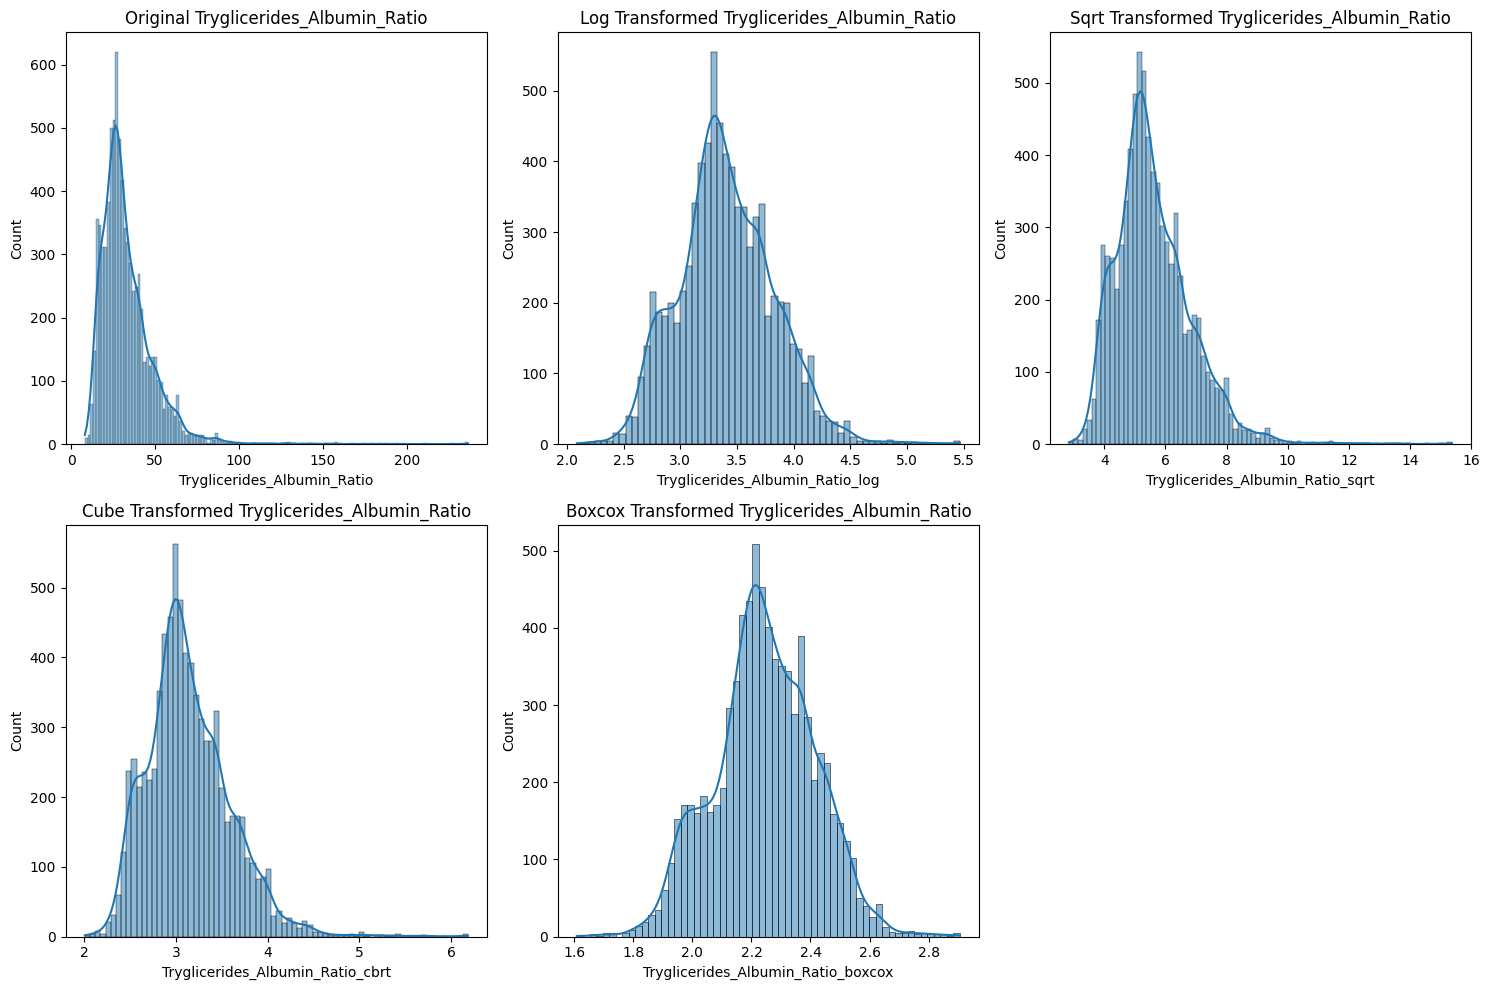

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df_log['Tryglicerides_Albumin_Ratio'], kde=True)
plt.title('Original Tryglicerides_Albumin_Ratio')

plt.subplot(2, 3, 2)
sns.histplot(df_log['Tryglicerides_Albumin_Ratio_log'], kde=True)
plt.title('Log Transformed Tryglicerides_Albumin_Ratio')

plt.subplot(2, 3, 3)
sns.histplot(df_sqrt['Tryglicerides_Albumin_Ratio_sqrt'], kde=True)
plt.title('Sqrt Transformed Tryglicerides_Albumin_Ratio')

plt.subplot(2, 3, 4)
sns.histplot(df_cube['Tryglicerides_Albumin_Ratio_cbrt'], kde=True)
plt.title('Cube Transformed Tryglicerides_Albumin_Ratio')

plt.subplot(2, 3, 5)
sns.histplot(df_boxcox['Tryglicerides_Albumin_Ratio_boxcox'], kde=True)
plt.title('Boxcox Transformed Tryglicerides_Albumin_Ratio')

plt.tight_layout()
plt.show()

In [ ]:
df_train['Tryglicerides_Albumin_Ratio'], _ = stats.boxcox(df_train['Tryglicerides_Albumin_Ratio'])
df_test['Tryglicerides_Albumin_Ratio'], _ = stats.boxcox(df_test['Tryglicerides_Albumin_Ratio'])

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_Days                       7905 non-null   int64  
 1   Drug                         7905 non-null   object 
 2   Age                          7905 non-null   int64  
 3   Sex                          7905 non-null   object 
 4   Ascites                      7905 non-null   object 
 5   Hepatomegaly                 7905 non-null   object 
 6   Spiders                      7905 non-null   object 
 7   Edema                        7905 non-null   object 
 8   Bilirubin                    7905 non-null   float64
 9   Cholesterol                  7905 non-null   float64
 10  Albumin                      7905 non-null   float64
 11  Copper                       7905 non-null   float64
 12  Alk_Phos                     7905 non-null   float64
 13  SGOT              

## Eksplorasi Fitur Kategorikal

In [ ]:
cat_feature = df_train.select_dtypes(include=['object']).columns
print(f"Categorical features: {cat_feature}")
print(f"Number of categorical features: {len(cat_feature)}")

Categorical features: Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status',
       'Age_Category', 'Bilirubin_Category', 'Albumin_Category',
       'Copper_Category', 'Tryglicerides_Category', 'Platelets_Category',
       'Prothrombin_Category'],
      dtype='object')
Number of categorical features: 14


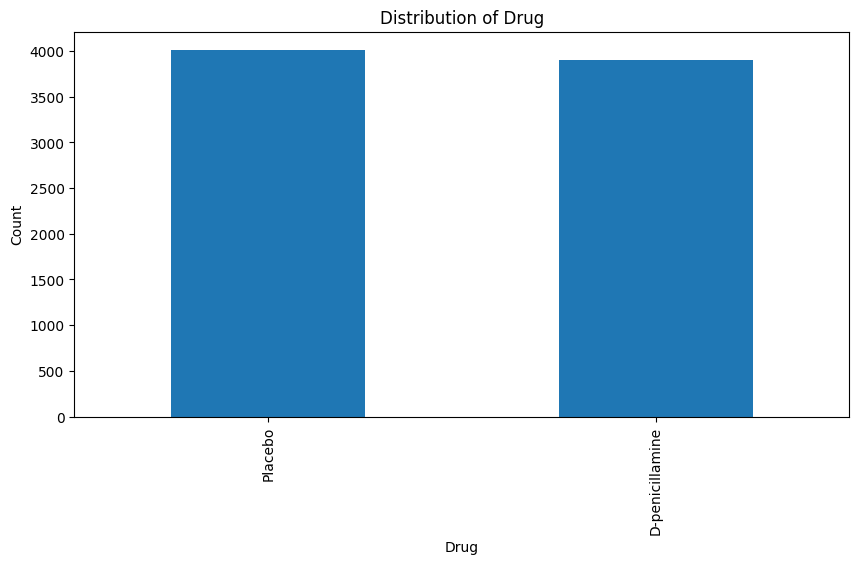

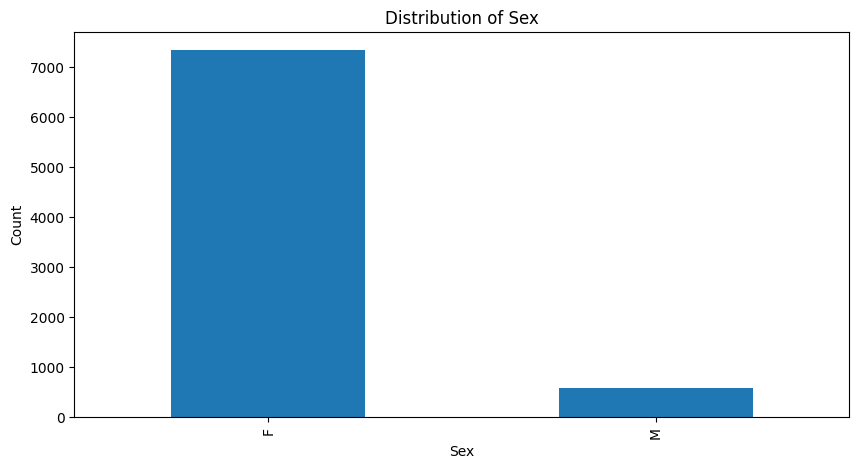

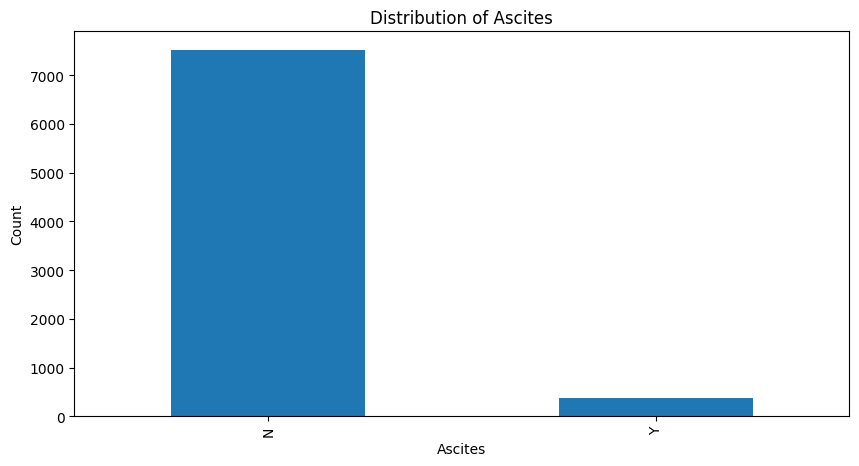

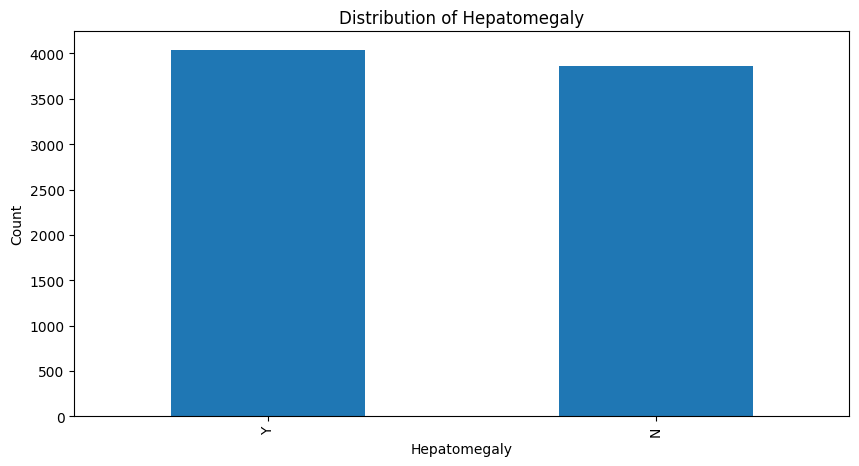

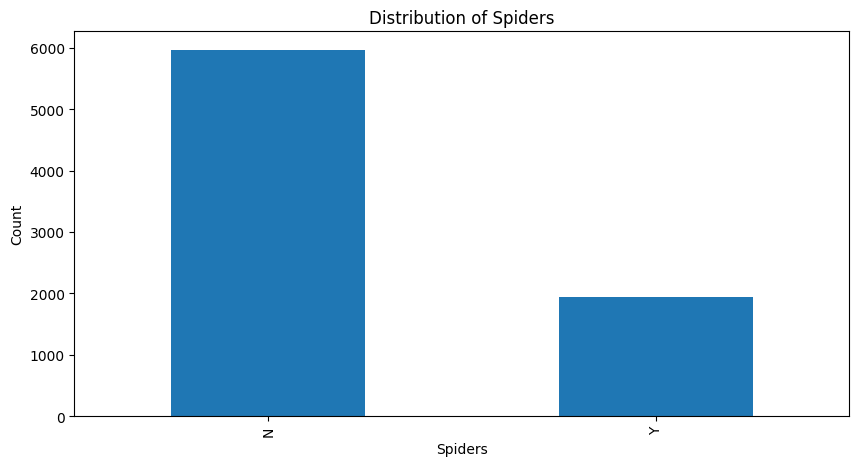

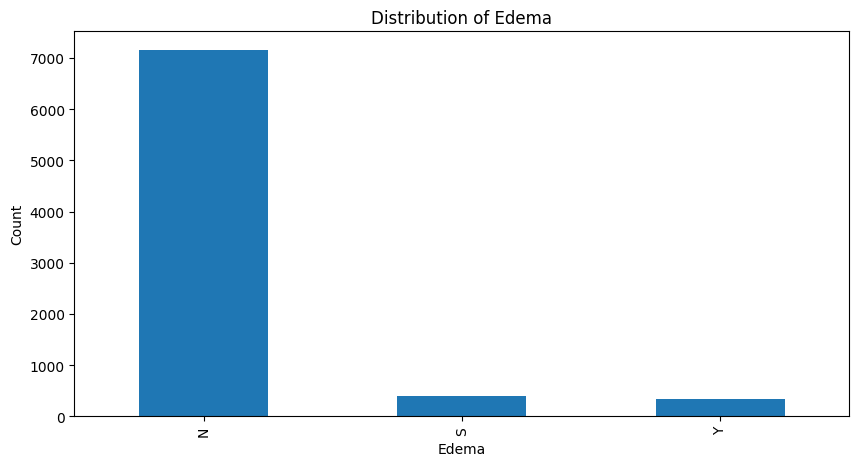

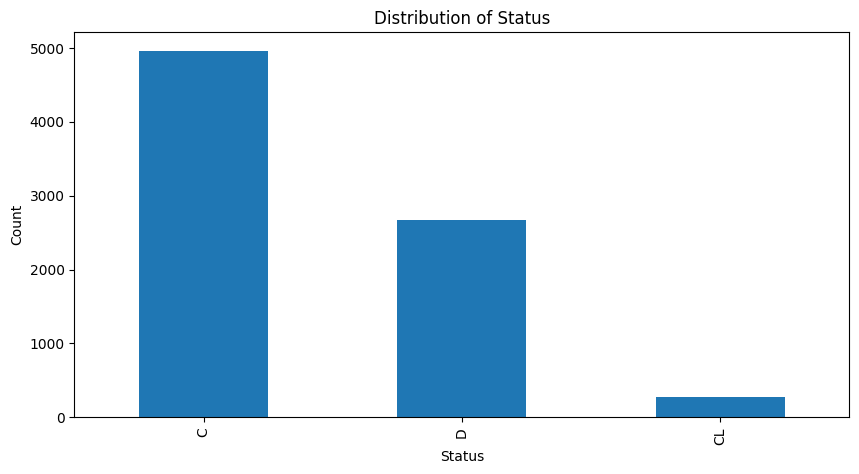

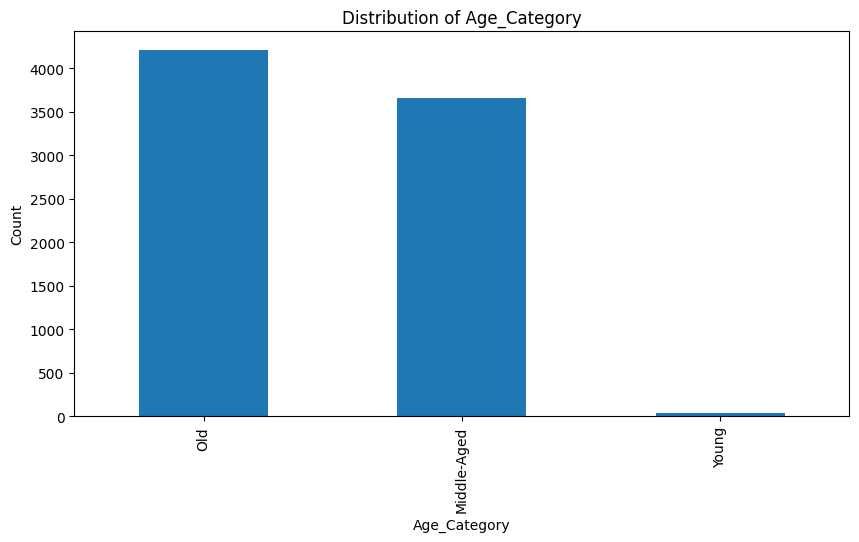

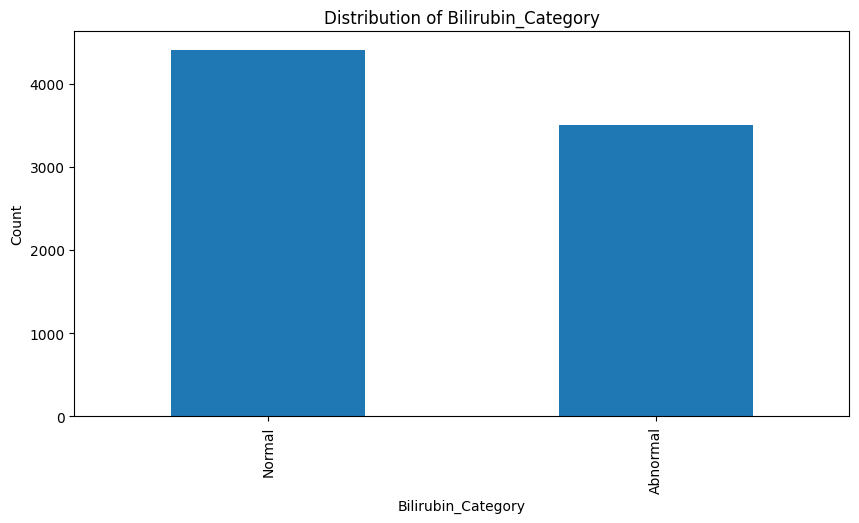

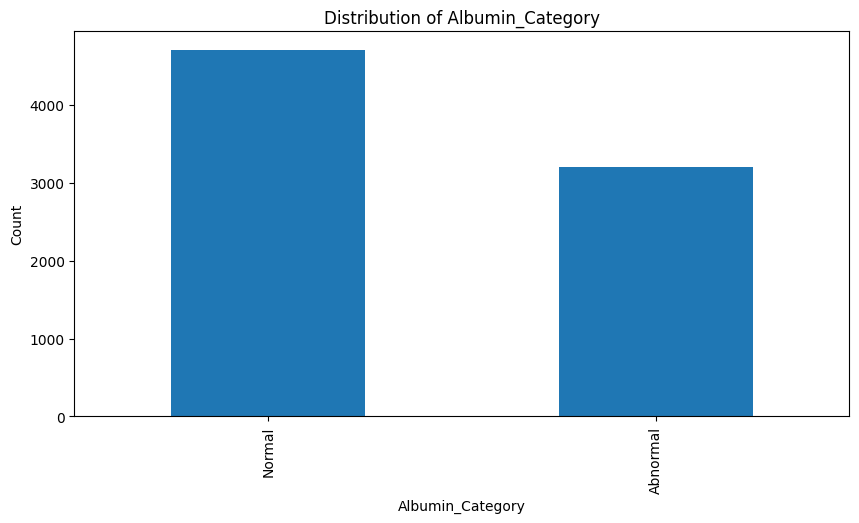

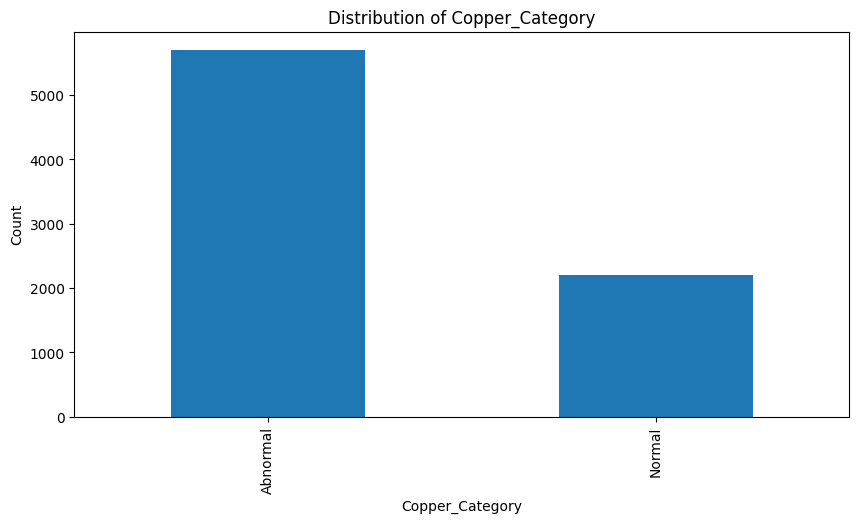

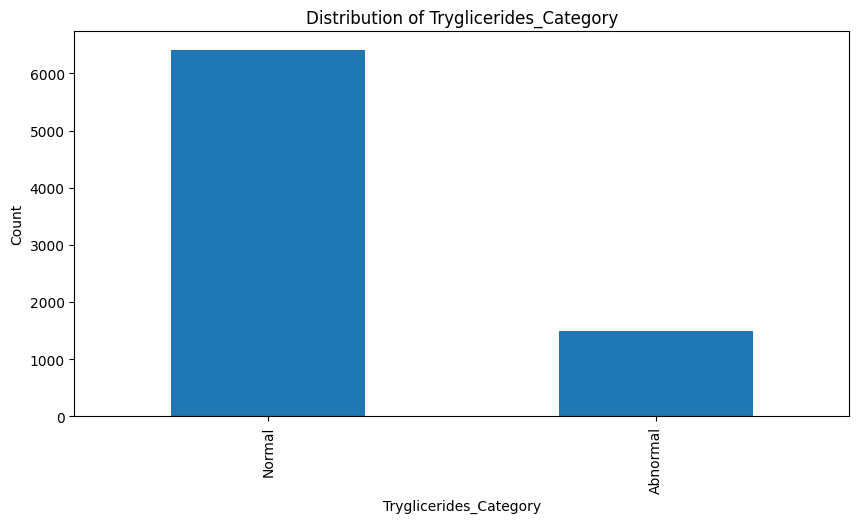

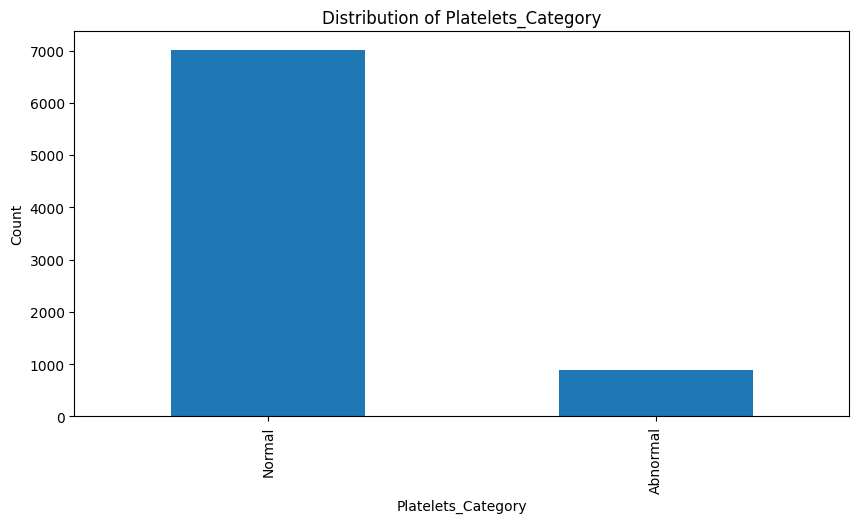

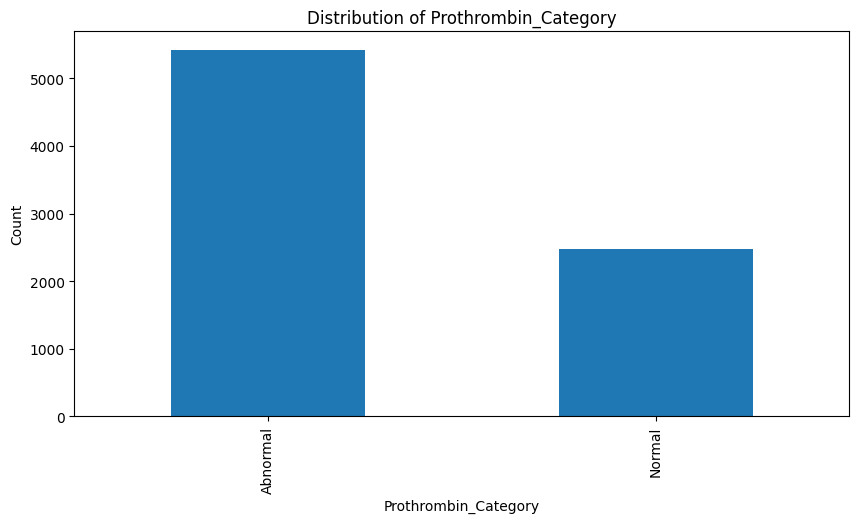

In [ ]:
for col in cat_feature:
  if col == 'Stage':
    continue
  plt.figure(figsize=(10,5))
  df_train[col].value_counts().plot(kind='bar')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

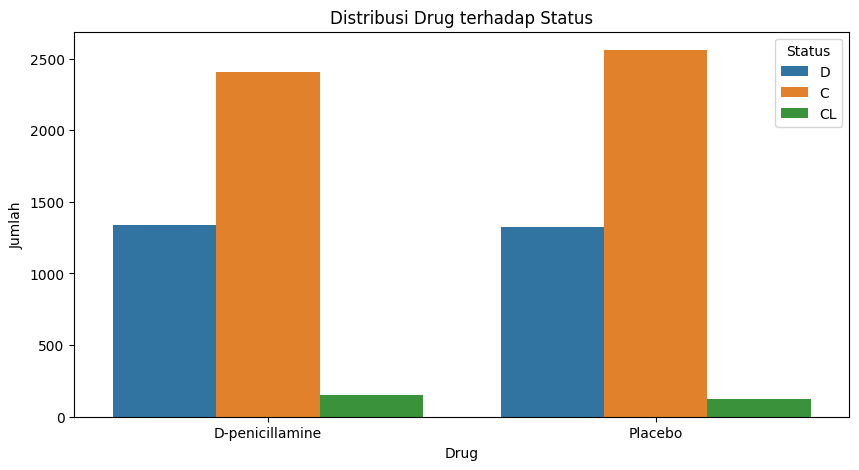

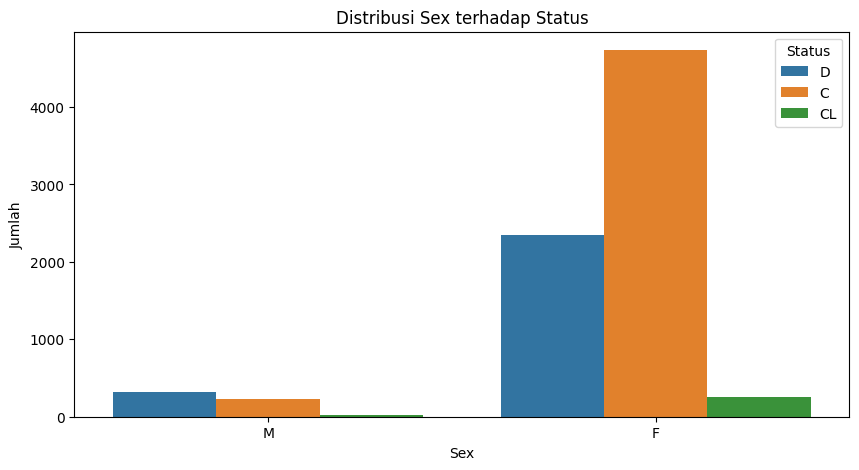

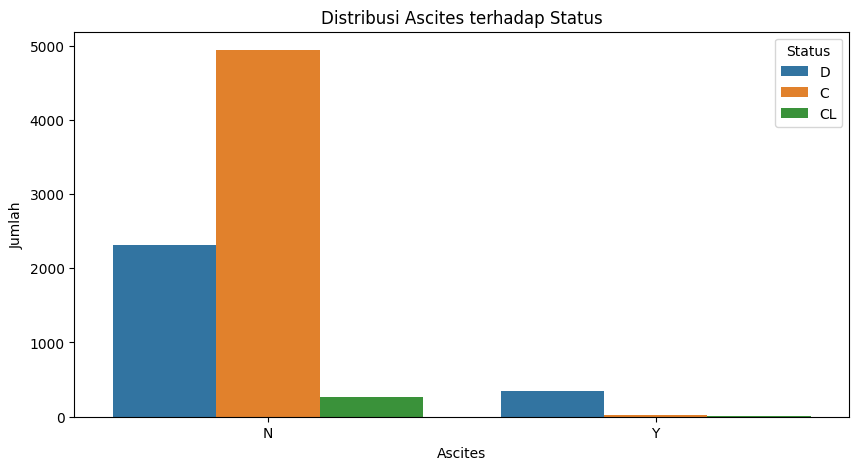

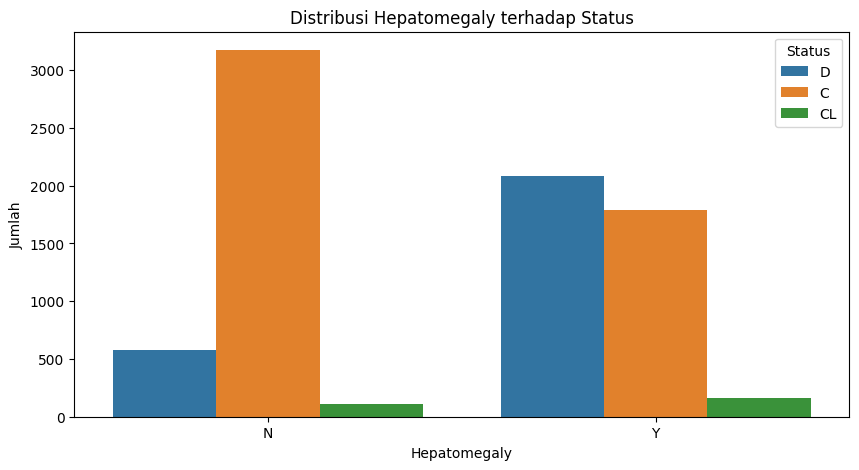

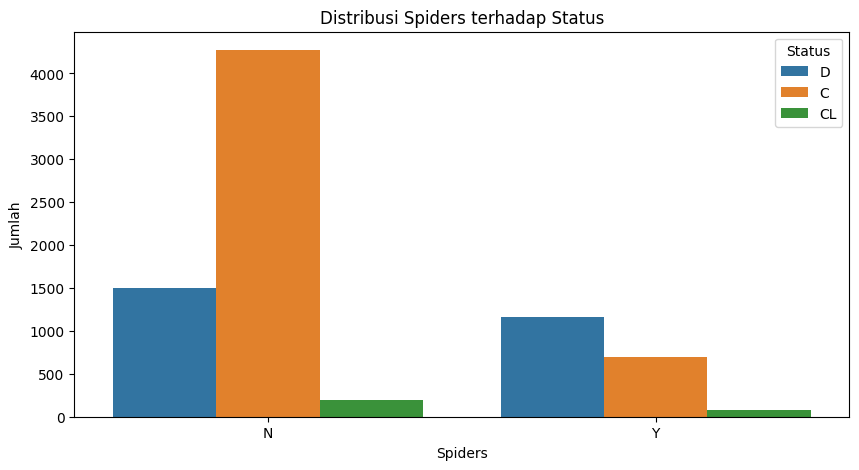

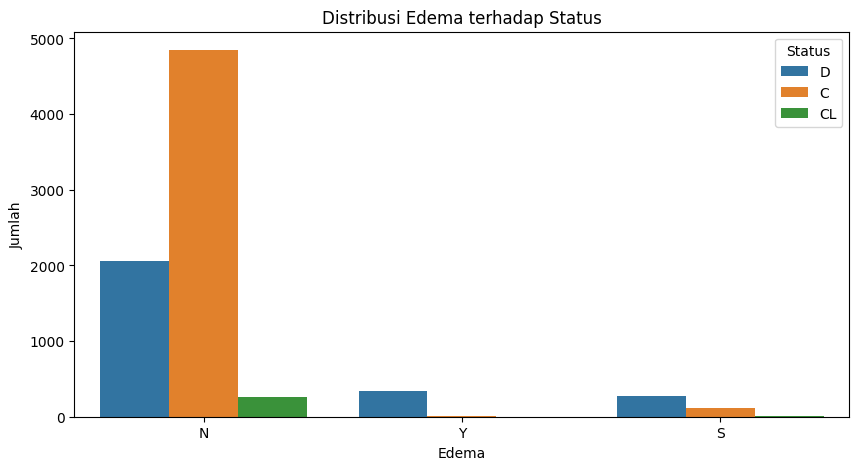

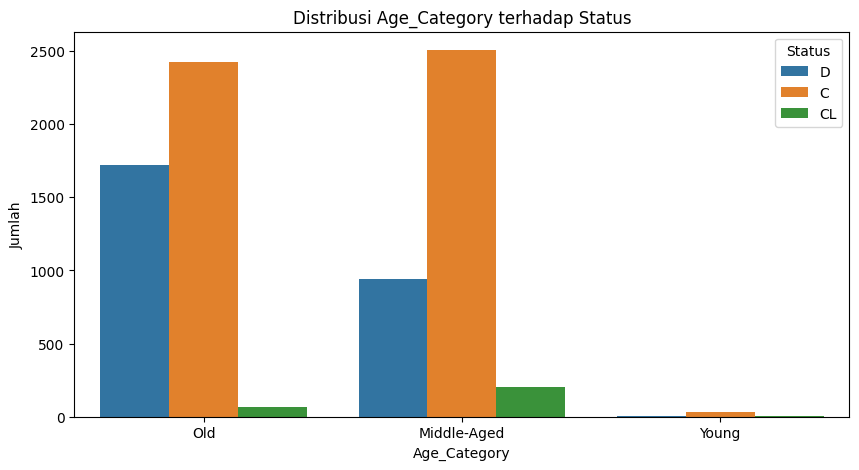

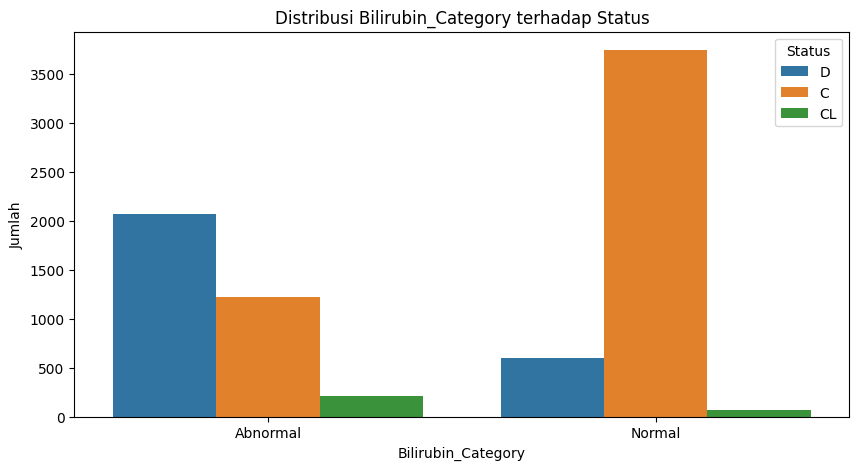

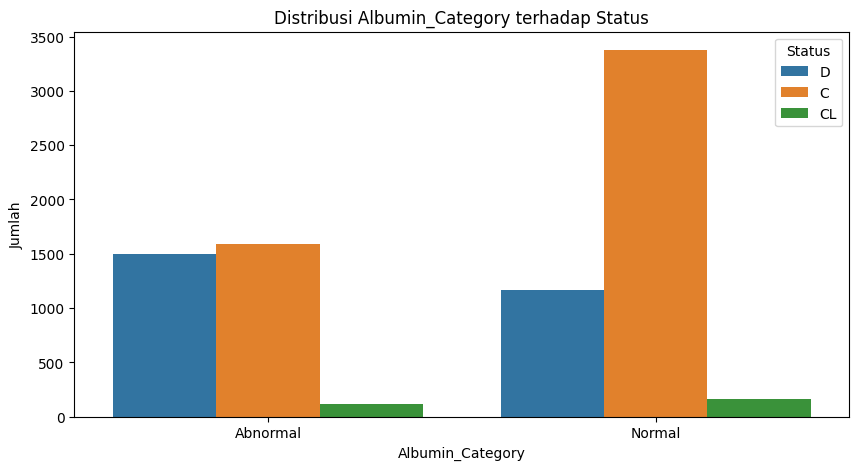

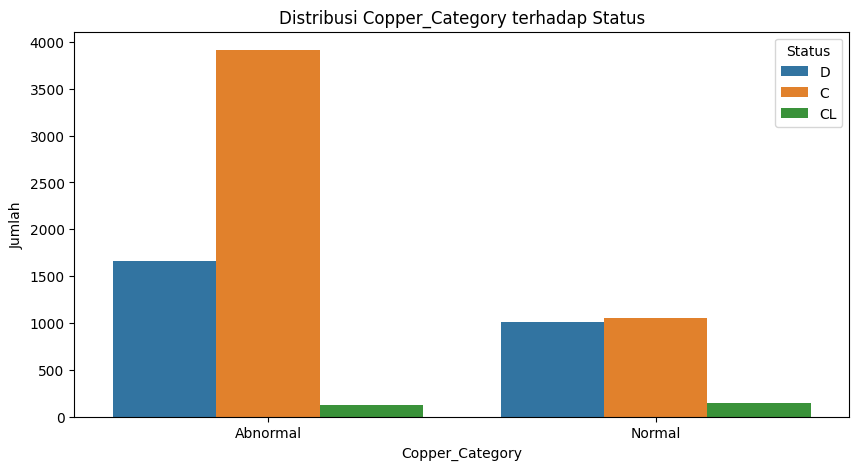

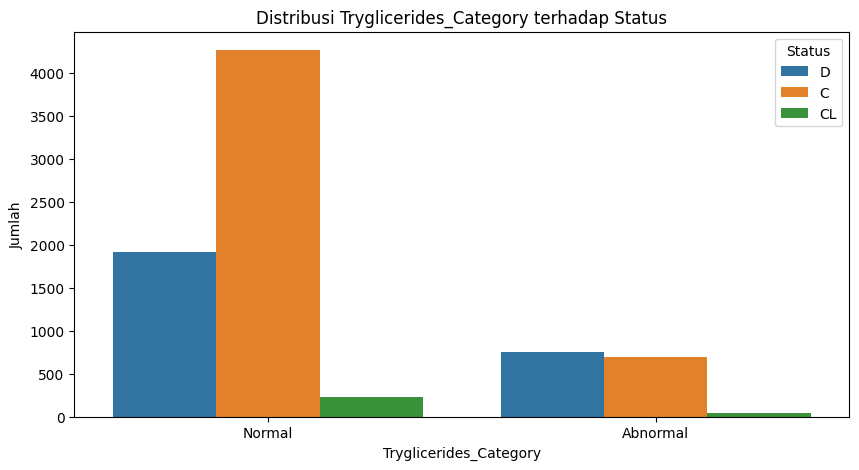

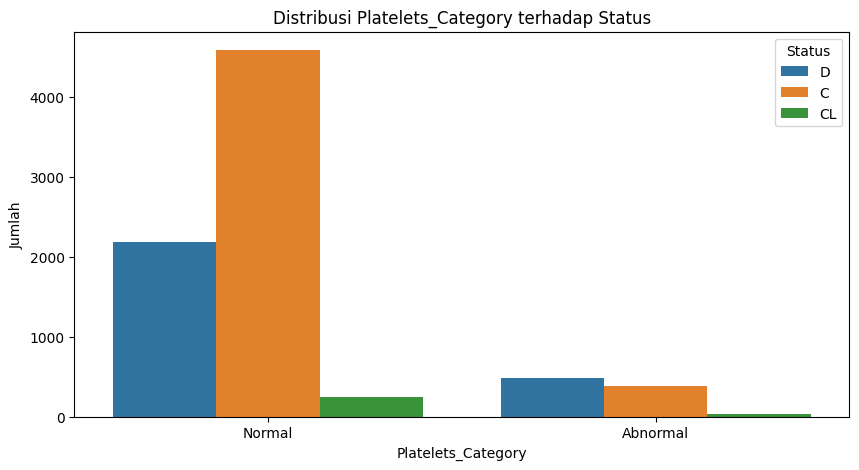

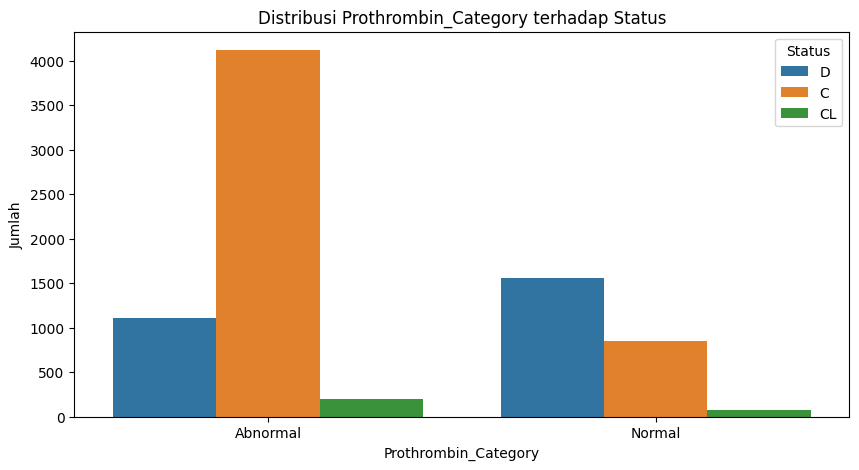

In [ ]:
# Pilih fitur kategorikal
cat_features = df_train.select_dtypes(include=['object']).columns
cat_features = [col for col in cat_features if col != 'Status']  # Kecuali 'Status'

# Visualisasi distribusi fitur kategorikal terhadap 'Status'
for col in cat_features:
  plt.figure(figsize=(10, 5))
  sns.countplot(x=col, hue='Status', data=df_train)
  plt.title(f'Distribusi {col} terhadap Status')
  plt.xlabel(col)
  plt.ylabel('Jumlah')
  plt.show()

In [ ]:
df_train['Drug'] = df_train['Drug'].map({'Placebo': 0, 'D-penicillamine': 1})
df_test['Drug'] = df_test['Drug'].map({'Placebo': 0, 'D-penicillamine': 1})

df_train['Sex'] = df_train['Sex'].map({'F': 1, 'M': 0})
df_test['Sex'] = df_test['Sex'].map({'F': 1, 'M': 0})

df_train['Ascites'] = df_train['Ascites'].map({'N': 0, 'Y': 1})
df_test['Ascites'] = df_test['Ascites'].map({'N': 0, 'Y': 1})

df_train['Hepatomegaly'] = df_train['Hepatomegaly'].map({'N': 0, 'Y': 1})
df_test['Hepatomegaly'] = df_test['Hepatomegaly'].map({'N': 0, 'Y': 1})

df_train['Spiders'] = df_train['Spiders'].map({'N': 0, 'Y': 1})
df_test['Spiders'] = df_test['Spiders'].map({'N': 0, 'Y': 1})

df_train['Edema'] = df_train['Edema'].map({'N': 0, 'Y': 1, 'S': 2})
df_test['Edema'] = df_test['Edema'].map({'N': 0, 'Y': 1, 'S': 2})

df_train['Age_Category'] = df_train['Age_Category'].map({'Young': 1, 'Middle-Aged': 2, 'Old': 3})
df_test['Age_Category'] = df_test['Age_Category'].map({'Young': 1, 'Middle-Aged': 2, 'Old': 3})

df_train['Bilirubin_Category'] = df_train['Bilirubin_Category'].map({'Normal': 0, 'Abnormal': 1})
df_test['Bilirubin_Category'] = df_test['Bilirubin_Category'].map({'Normal': 0, 'Abnormal': 1})

df_train['Albumin_Category'] = df_train['Albumin_Category'].map({'Normal': 0, 'Abnormal': 1})
df_test['Albumin_Category'] = df_test['Albumin_Category'].map({'Normal': 0, 'Abnormal': 1})

df_train['Copper_Category'] = df_train['Copper_Category'].map({'Normal': 0, 'Abnormal': 1})
df_test['Copper_Category'] = df_test['Copper_Category'].map({'Normal': 0, 'Abnormal': 1})

df_train['Tryglicerides_Category'] = df_train['Tryglicerides_Category'].map({'Normal': 0, 'Abnormal': 1})
df_test['Tryglicerides_Category'] = df_test['Tryglicerides_Category'].map({'Normal': 0, 'Abnormal': 1})

df_train['Platelets_Category'] = df_train['Platelets_Category'].map({'Normal': 0, 'Abnormal': 1})
df_test['Platelets_Category'] = df_test['Platelets_Category'].map({'Normal': 0, 'Abnormal': 1})

df_train['Prothrombin_Category'] = df_train['Prothrombin_Category'].map({'Normal': 0, 'Abnormal': 1})
df_test['Prothrombin_Category'] = df_test['Prothrombin_Category'].map({'Normal': 0, 'Abnormal': 1})

df_train['Status'] = df_train['Status'].map({'C': 0, 'CL': 1, 'D': 2})

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_Days                       7905 non-null   int64  
 1   Drug                         7905 non-null   int64  
 2   Age                          7905 non-null   int64  
 3   Sex                          7905 non-null   int64  
 4   Ascites                      7905 non-null   int64  
 5   Hepatomegaly                 7905 non-null   int64  
 6   Spiders                      7905 non-null   int64  
 7   Edema                        7905 non-null   int64  
 8   Bilirubin                    7905 non-null   float64
 9   Cholesterol                  7905 non-null   float64
 10  Albumin                      7905 non-null   float64
 11  Copper                       7905 non-null   float64
 12  Alk_Phos                     7905 non-null   float64
 13  SGOT              

## Feature Selection

In [ ]:
df_train.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status',
       'Bilirubin_Albumin_Ratio', 'SGOT_Ratio', 'Copper_Albumin_Ratio',
       'Platelets_Bilirubin_Ratio', 'Tryglicerides_Albumin_Ratio',
       'Age_Category', 'Bilirubin_Category', 'Albumin_Category',
       'Copper_Category', 'Tryglicerides_Category', 'Platelets_Category',
       'Prothrombin_Category'],
      dtype='object')

In [ ]:
num_list = ['N_Days', 'Age', 'Bilirubin', 'Alk_Phos', 'SGOT', 'Albumin', 'Copper', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Cholesterol', 'Bilirubin_Albumin_Ratio', 'SGOT_Ratio', 'Copper_Albumin_Ratio',
       'Platelets_Bilirubin_Ratio', 'Tryglicerides_Albumin_Ratio']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[num_list] = scaler.fit_transform(df_train[num_list])

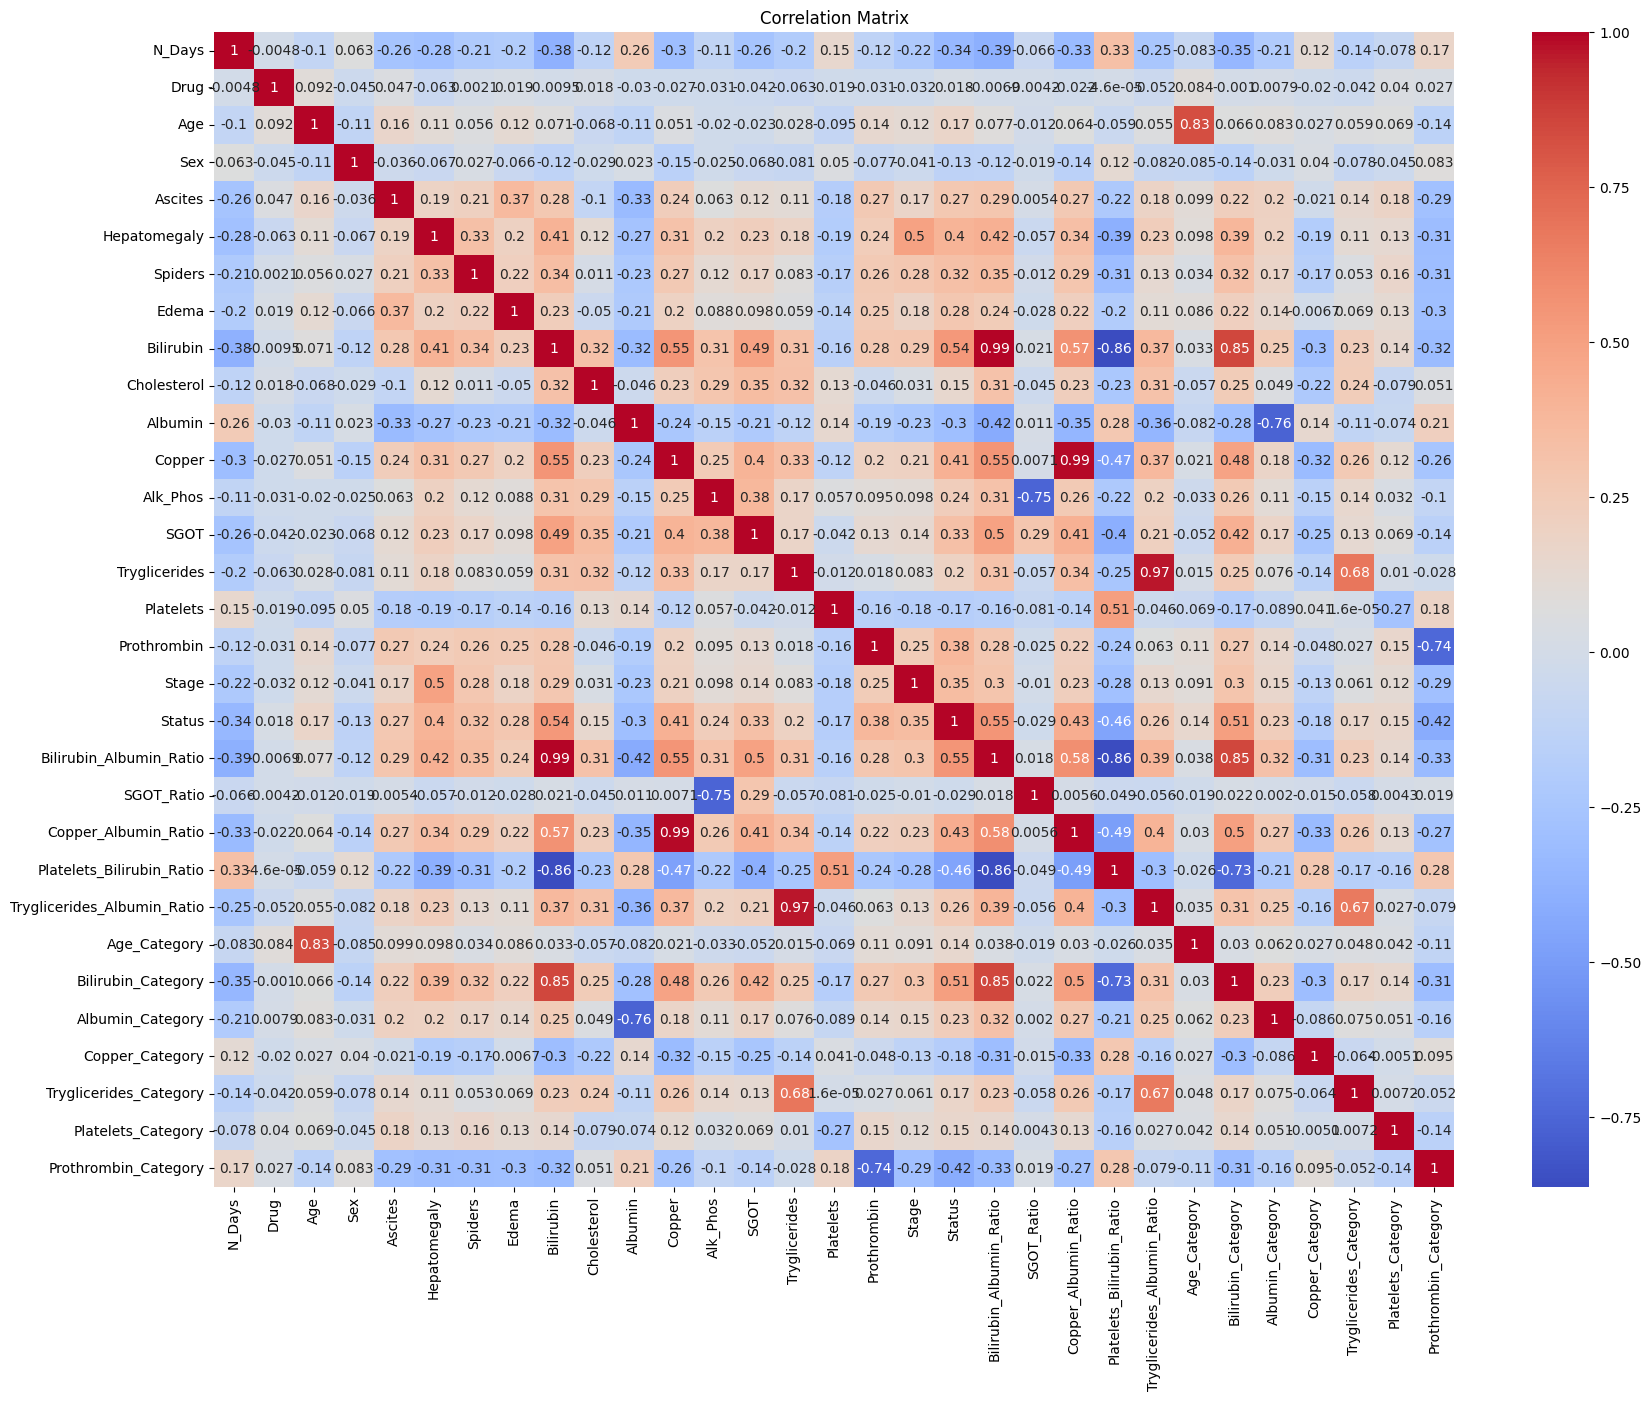

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_Days                       7905 non-null   float64
 1   Drug                         7905 non-null   int64  
 2   Age                          7905 non-null   float64
 3   Sex                          7905 non-null   int64  
 4   Ascites                      7905 non-null   int64  
 5   Hepatomegaly                 7905 non-null   int64  
 6   Spiders                      7905 non-null   int64  
 7   Edema                        7905 non-null   int64  
 8   Bilirubin                    7905 non-null   float64
 9   Cholesterol                  7905 non-null   float64
 10  Albumin                      7905 non-null   float64
 11  Copper                       7905 non-null   float64
 12  Alk_Phos                     7905 non-null   float64
 13  SGOT              

# Modelling

In [ ]:
from sklearn.model_selection import train_test_split

X = df_train.drop('Status', axis=1)
y = df_train['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling with Default Hyperparameter

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
model = LogisticRegression()

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8032890575585073

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       966
           1       0.00      0.00      0.00        52
           2       0.80      0.69      0.74       563

    accuracy                           0.80      1581
   macro avg       0.53      0.53      0.53      1581
weighted avg       0.78      0.80      0.79      1581


Confusion Matrix:
 [[882   1  83]
 [ 35   0  17]
 [175   0 388]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = rf_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8216318785578748

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       966
           1       0.73      0.15      0.25        52
           2       0.82      0.71      0.76       563

    accuracy                           0.82      1581
   macro avg       0.79      0.60      0.63      1581
weighted avg       0.82      0.82      0.81      1581


Confusion Matrix:
 [[892   2  72]
 [ 29   8  15]
 [163   1 399]]


In [ ]:
from sklearn.svm import SVC

# Inisialisasi model SVM
svm_model = SVC(random_state=42)

# Latih model
svm_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = svm_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8159392789373814

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       966
           1       0.00      0.00      0.00        52
           2       0.82      0.70      0.75       563

    accuracy                           0.82      1581
   macro avg       0.54      0.54      0.54      1581
weighted avg       0.79      0.82      0.80      1581


Confusion Matrix:
 [[896   0  70]
 [ 34   0  18]
 [169   0 394]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Inisialisasi model AdaBoost
ada_model = AdaBoostClassifier(random_state=42)

# Latih model
ada_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = ada_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8115117014547755

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       966
           1       0.32      0.13      0.19        52
           2       0.82      0.69      0.75       563

    accuracy                           0.81      1581
   macro avg       0.65      0.58      0.60      1581
weighted avg       0.80      0.81      0.80      1581


Confusion Matrix:
 [[889   7  70]
 [ 30   7  15]
 [168   8 387]]


In [ ]:
# Inisialisasi model AdaBoost dengan base estimator Logistic Regression
ada_model = AdaBoostClassifier(base_estimator=LogisticRegression(), random_state=42)

# Latih model
ada_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = ada_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8032890575585073

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       966
           1       0.00      0.00      0.00        52
           2       0.80      0.68      0.74       563

    accuracy                           0.80      1581
   macro avg       0.54      0.53      0.53      1581
weighted avg       0.78      0.80      0.79      1581


Confusion Matrix:
 [[886   2  78]
 [ 36   0  16]
 [176   3 384]]


In [ ]:
# Inisialisasi model AdaBoost dengan base estimator SVM
ada_model = AdaBoostClassifier(base_estimator=SVC(probability=True), random_state=42)

# Latih model
ada_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = ada_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.6426312460468058

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.99      0.77       966
           1       0.00      0.00      0.00        52
           2       0.89      0.10      0.18       563

    accuracy                           0.64      1581
   macro avg       0.51      0.36      0.32      1581
weighted avg       0.70      0.64      0.54      1581


Confusion Matrix:
 [[960   0   6]
 [ 51   0   1]
 [507   0  56]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import xgboost as xgb

# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Latih model
xgb_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = xgb_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8431372549019608

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       966
           1       0.69      0.21      0.32        52
           2       0.84      0.75      0.80       563

    accuracy                           0.84      1581
   macro avg       0.79      0.63      0.67      1581
weighted avg       0.84      0.84      0.84      1581


Confusion Matrix:
 [[897   4  65]
 [ 28  11  13]
 [137   1 425]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Latih model
gb_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = gb_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8292220113851992

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       966
           1       0.46      0.12      0.18        52
           2       0.82      0.73      0.78       563

    accuracy                           0.83      1581
   macro avg       0.71      0.59      0.61      1581
weighted avg       0.82      0.83      0.82      1581


Confusion Matrix:
 [[893   3  70]
 [ 28   6  18]
 [147   4 412]]


In [ ]:
import lightgbm as lgb

# Inisialisasi model LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)

# Latih model
lgb_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = lgb_model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3226
[LightGBM] [Info] Number of data points in the train set: 6324, number of used features: 30
[LightGBM] [Info] Start training from score -0.458308
[LightGBM] [Info] Start training from score -3.344935
[LightGBM] [Info] Start training from score -1.101463
Accuracy: 0.8368121442125237

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       966
           1       0.71      0.23      0.35        52
           2       0.83      0.74      0.78       563

    accuracy                           0.84      1581
   macro avg       0.79      0.63      0.67      1581
weighted avg       0.83      0.84      0.83      1581


Confusion Matrix:
 [[893   2  71]
 [ 27  12  13]
 

## XGBoost with Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Top 3 Accuracies:
n_estimators: 30, Accuracy: 0.845034788108792
n_estimators: 40, Accuracy: 0.8444022770398482
n_estimators: 60, Accuracy: 0.8437697659709045


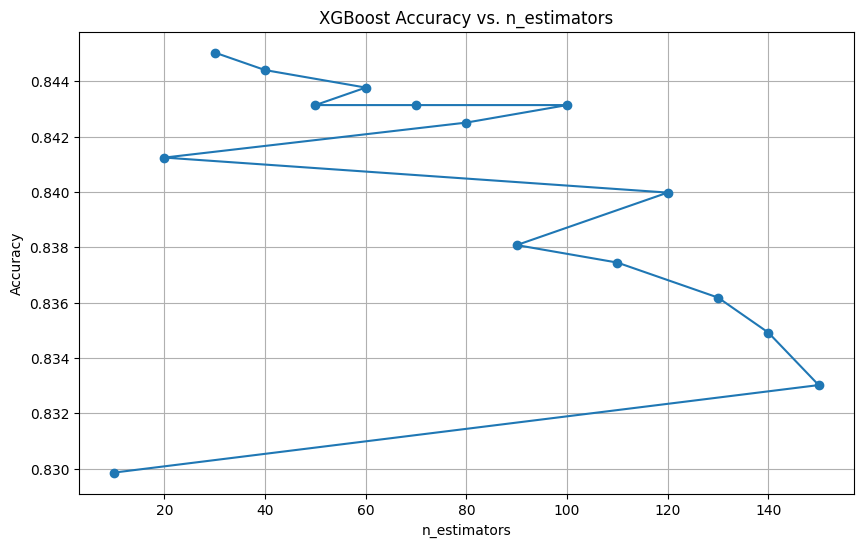

In [ ]:
# Definisikan rentang nilai n_estimators
n_estimators_range = range(10, 160, 10)

# Buat list untuk menyimpan hasil akurasi
accuracies = []

# Loop melalui rentang nilai n_estimators
for n_estimators in n_estimators_range:
  # Inisialisasi model XGBoost dengan nilai n_estimators saat ini
  xgb_model = xgb.XGBClassifier(n_estimators=n_estimators, random_state=42)

  # Latih model
  xgb_model.fit(X_train, y_train)

  # Prediksi pada data testing
  y_pred = xgb_model.predict(X_test)

  # Hitung akurasi
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append((n_estimators, accuracy))

# Urutkan hasil akurasi dari yang tertinggi ke terendah
accuracies.sort(key=lambda x: x[1], reverse=True)

# Tampilkan 3 akurasi tertingginya
print("Top 3 Accuracies:")
for i in range(3):
  print(f"n_estimators: {accuracies[i][0]}, Accuracy: {accuracies[i][1]}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in accuracies], [x[1] for x in accuracies], marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy vs. n_estimators')
plt.grid(True)
plt.show()

Top 3 Accuracies:
eta: 0.29999999999999993, Accuracy: 0.8431372549019608
eta: 0.1, Accuracy: 0.8418722327640734
eta: 0.12, Accuracy: 0.8399746995572422


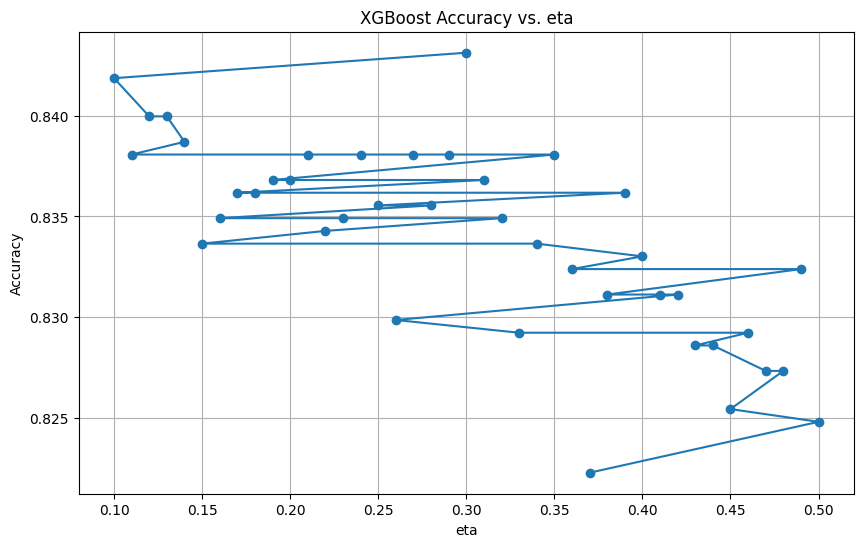

In [ ]:
# Definisikan rentang nilai eta
eta_range = np.arange(0.1, 0.51, 0.01)

# Buat list untuk menyimpan hasil akurasi
accuracies = []

# Loop melalui rentang nilai eta
for eta in eta_range:
  # Inisialisasi model XGBoost dengan nilai eta saat ini
  xgb_model = xgb.XGBClassifier(eta=eta, random_state=42)

  # Latih model
  xgb_model.fit(X_train, y_train)

  # Prediksi pada data testing
  y_pred = xgb_model.predict(X_test)

  # Hitung akurasi
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append((eta, accuracy))

# Urutkan hasil akurasi dari yang tertinggi ke terendah
accuracies.sort(key=lambda x: x[1], reverse=True)

# Tampilkan 3 akurasi tertingginya
print("Top 3 Accuracies:")
for i in range(3):
  print(f"eta: {accuracies[i][0]}, Accuracy: {accuracies[i][1]}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in accuracies], [x[1] for x in accuracies], marker='o')
plt.xlabel('eta')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy vs. eta')
plt.grid(True)
plt.show()

Top 3 Accuracies:
max_depth: 6, Accuracy: 0.8431372549019608
max_depth: 3, Accuracy: 0.8368121442125237
max_depth: 5, Accuracy: 0.8336495888678052


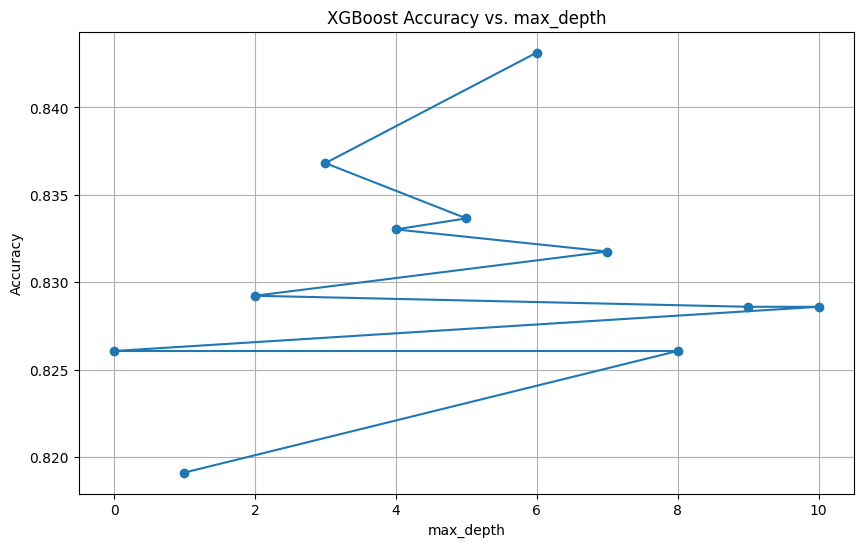

In [ ]:
# Definisikan rentang nilai max_depth
max_depth_range = range(0, 11)

# Buat list untuk menyimpan hasil akurasi
accuracies = []

# Loop melalui rentang nilai max_depth
for max_depth in max_depth_range:
  # Inisialisasi model XGBoost dengan nilai max_depth saat ini
  xgb_model = xgb.XGBClassifier(max_depth=max_depth, random_state=42)

  # Latih model
  xgb_model.fit(X_train, y_train)

  # Prediksi pada data testing
  y_pred = xgb_model.predict(X_test)

  # Hitung akurasi
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append((max_depth, accuracy))

# Urutkan hasil akurasi dari yang tertinggi ke terendah
accuracies.sort(key=lambda x: x[1], reverse=True)

# Tampilkan 3 akurasi tertingginya
print("Top 3 Accuracies:")
for i in range(3):
  print(f"max_depth: {accuracies[i][0]}, Accuracy: {accuracies[i][1]}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in accuracies], [x[1] for x in accuracies], marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy vs. max_depth')
plt.grid(True)
plt.show()

Top 3 Accuracies:
subsample: 1.0, Accuracy: 0.8431372549019608
subsample: 0.8400000000000001, Accuracy: 0.8387096774193549
subsample: 0.91, Accuracy: 0.8374446552814674


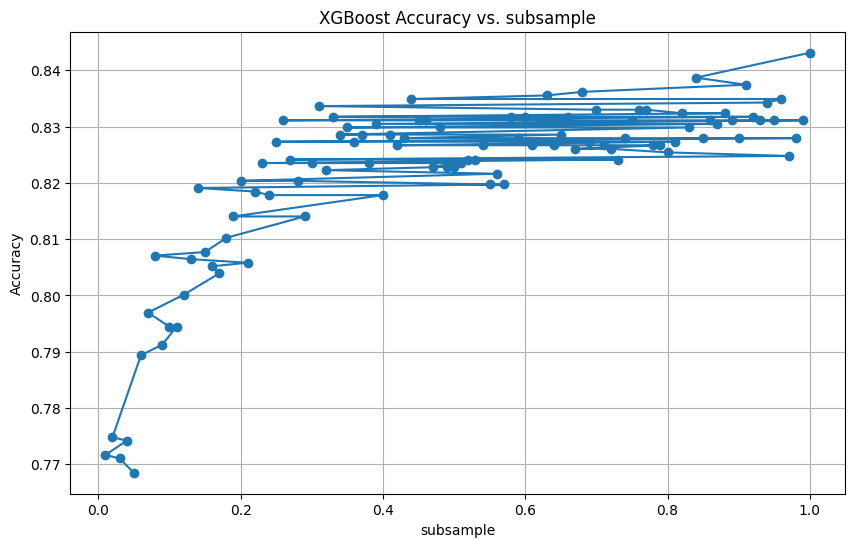

In [ ]:
# Definisikan rentang nilai subsample
subsample_range = np.arange(0.01, 1.01, 0.01)

# Buat list untuk menyimpan hasil akurasi
accuracies = []

# Loop melalui rentang nilai subsample
for subsample in subsample_range:
  # Inisialisasi model XGBoost dengan nilai subsample saat ini
  xgb_model = xgb.XGBClassifier(subsample=subsample, random_state=42)

  # Latih model
  xgb_model.fit(X_train, y_train)

  # Prediksi pada data testing
  y_pred = xgb_model.predict(X_test)

  # Hitung akurasi
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append((subsample, accuracy))

# Urutkan hasil akurasi dari yang tertinggi ke terendah
accuracies.sort(key=lambda x: x[1], reverse=True)

# Tampilkan 3 akurasi tertingginya
print("Top 3 Accuracies:")
for i in range(3):
  print(f"subsample: {accuracies[i][0]}, Accuracy: {accuracies[i][1]}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in accuracies], [x[1] for x in accuracies], marker='o')
plt.xlabel('subsample')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy vs. subsample')
plt.grid(True)
plt.show()

Top 3 Accuracies:
colsample_bytree: 1.0, Accuracy: 0.8431372549019608
colsample_bytree: 0.5, Accuracy: 0.8393421884882986
colsample_bytree: 0.51, Accuracy: 0.8393421884882986


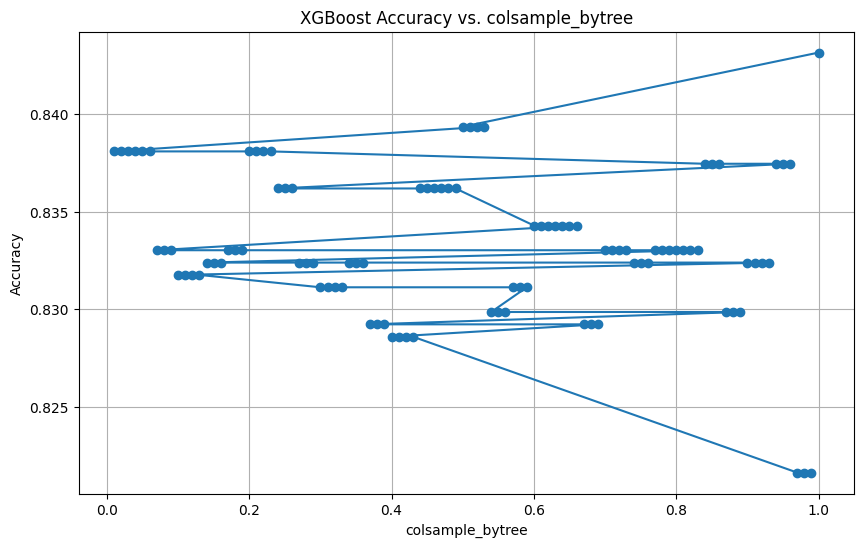

In [ ]:
# Definisikan rentang nilai colsample_bytree
colsample_bytree_range = np.arange(0.01, 1.01, 0.01)

# Buat list untuk menyimpan hasil akurasi
accuracies = []

# Loop melalui rentang nilai colsample_bytree
for colsample_bytree in colsample_bytree_range:
  # Inisialisasi model XGBoost dengan nilai colsample_bytree saat ini
  xgb_model = xgb.XGBClassifier(colsample_bytree=colsample_bytree, random_state=42)

  # Latih model
  xgb_model.fit(X_train, y_train)

  # Prediksi pada data testing
  y_pred = xgb_model.predict(X_test)

  # Hitung akurasi
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append((colsample_bytree, accuracy))

# Urutkan hasil akurasi dari yang tertinggi ke terendah
accuracies.sort(key=lambda x: x[1], reverse=True)

# Tampilkan 3 akurasi tertingginya
print("Top 3 Accuracies:")
for i in range(3):
  print(f"colsample_bytree: {accuracies[i][0]}, Accuracy: {accuracies[i][1]}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in accuracies], [x[1] for x in accuracies], marker='o')
plt.xlabel('colsample_bytree')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy vs. colsample_bytree')
plt.grid(True)
plt.show()

Top 3 Accuracies:
gamma: 0.0, Accuracy: 0.8431372549019608
gamma: 1.1, Accuracy: 0.8425047438330171
gamma: 0.4, Accuracy: 0.8393421884882986


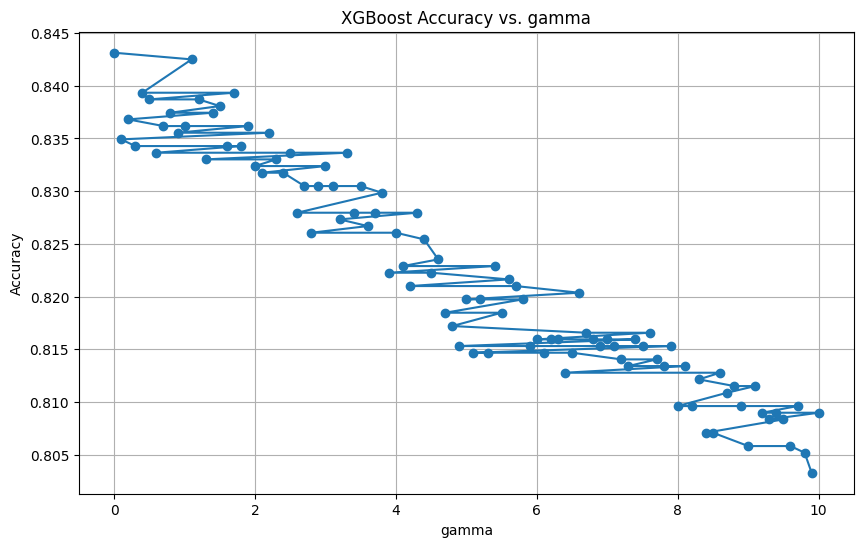

In [ ]:
# Definisikan rentang nilai gamma
gamma_range = np.arange(0, 10.1, 0.1)

# Buat list untuk menyimpan hasil akurasi
accuracies = []

# Loop melalui rentang nilai gamma
for gamma in gamma_range:
  # Inisialisasi model XGBoost dengan nilai gamma saat ini
  xgb_model = xgb.XGBClassifier(gamma=gamma, random_state=42)

  # Latih model
  xgb_model.fit(X_train, y_train)

  # Prediksi pada data testing
  y_pred = xgb_model.predict(X_test)

  # Hitung akurasi
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append((gamma, accuracy))

# Urutkan hasil akurasi dari yang tertinggi ke terendah
accuracies.sort(key=lambda x: x[1], reverse=True)

# Tampilkan 3 akurasi tertingginya
print("Top 3 Accuracies:")
for i in range(3):
  print(f"gamma: {accuracies[i][0]}, Accuracy: {accuracies[i][1]}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in accuracies], [x[1] for x in accuracies], marker='o')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy vs. gamma')
plt.grid(True)
plt.show()

Top 3 Accuracies:
reg_lambda: 1.0, Accuracy: 0.8431372549019608
reg_lambda: 2.3000000000000003, Accuracy: 0.8418722327640734
reg_lambda: 9.200000000000001, Accuracy: 0.8418722327640734


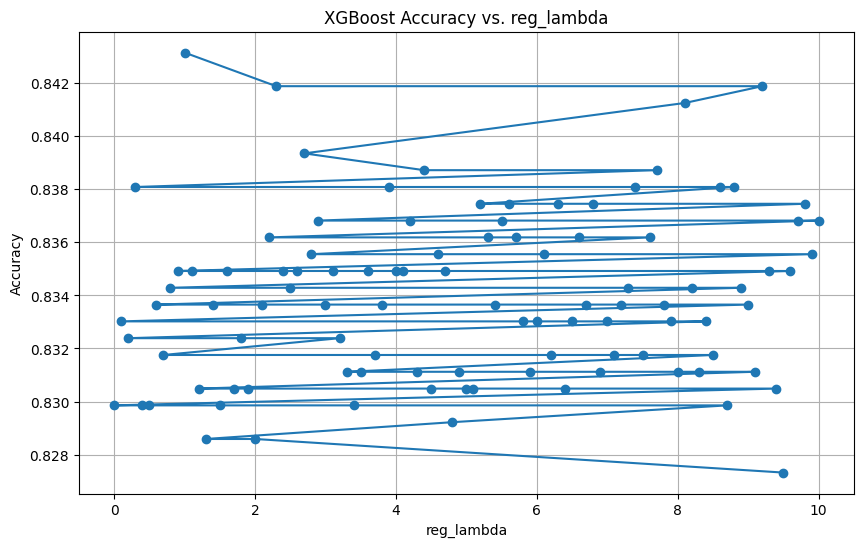

In [ ]:
# Definisikan rentang nilai reg_lambda
reg_lambda_range = np.arange(0, 10.1, 0.1)

# Buat list untuk menyimpan hasil akurasi
accuracies = []

# Loop melalui rentang nilai reg_lambda
for reg_lambda in reg_lambda_range:
  # Inisialisasi model XGBoost dengan nilai reg_lambda saat ini
  xgb_model = xgb.XGBClassifier(reg_lambda=reg_lambda, random_state=42)

  # Latih model
  xgb_model.fit(X_train, y_train)

  # Prediksi pada data testing
  y_pred = xgb_model.predict(X_test)

  # Hitung akurasi
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append((reg_lambda, accuracy))

# Urutkan hasil akurasi dari yang tertinggi ke terendah
accuracies.sort(key=lambda x: x[1], reverse=True)

# Tampilkan 3 akurasi tertingginya
print("Top 3 Accuracies:")
for i in range(3):
  print(f"reg_lambda: {accuracies[i][0]}, Accuracy: {accuracies[i][1]}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in accuracies], [x[1] for x in accuracies], marker='o')
plt.xlabel('reg_lambda')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy vs. reg_lambda')
plt.grid(True)
plt.show()

In [ ]:
# Definisikan parameter grid untuk Grid Search CV
param_grid = {
    'n_estimators': [30, 40, 60],
    'eta': [0.10, 0.12, 0.23],
    'max_depth': [3, 5, 6],
    'subsample': [0.84, 0.91, 1.00],
    'colsample_bytree': [0.50, 0.51, 1.00],
    'gamma': [0.0, 0.4, 1.1],
    'reg_lambda': [1.0, 2.3, 9.2]
}

# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Inisialisasi Grid Search CV
grid_search = GridSearchCV( estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Latih model dengan Grid Search CV
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best parameters found: ", grid_search.best_params_)

# Evaluasi model dengan parameter terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters found:  {'colsample_bytree': 0.5, 'eta': 0.12, 'gamma': 0.4, 'max_depth': 6, 'n_estimators': 60, 'reg_lambda': 9.2, 'subsample': 0.84}
Accuracy: 0.8380771663504112

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88       966
           1       0.67      0.12      0.20        52
           2       0.84      0.74      0.79       563

    accuracy                           0.84      1581
   macro avg       0.78      0.60      0.62      1581
weighted avg       0.83      0.84      0.83      1581


Confusion Matrix:
 [[905   1  60]
 [ 30   6  16]
 [147   2 414]]


## Deep Learning Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6899 - loss: 0.6970 - val_accuracy: 0.7929 - val_loss: 0.5280
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8012 - loss: 0.5239 - val_accuracy: 0.7921 - val_loss: 0.5205
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8043 - loss: 0.4994 - val_accuracy: 0.7960 - val_loss: 0.5126
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8088 - loss: 0.4934 - val_accuracy: 0.7929 - val_loss: 0.5131
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8053 - loss: 0.5089 - val_accuracy: 0.7960 - val_loss: 0.5118
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8014 - loss: 0.4995 - val_accuracy: 0.7968 - val_loss: 0.5199
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8118 - loss: 0.4769 - val_accuracy: 0.7921 - val_loss: 0.5105
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8130 - loss: 0.4777 - val_acc

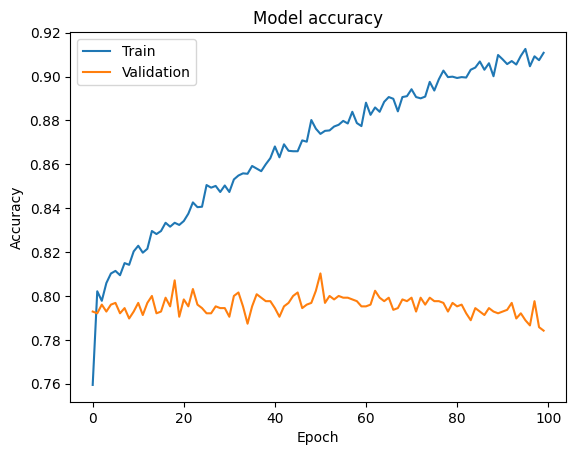

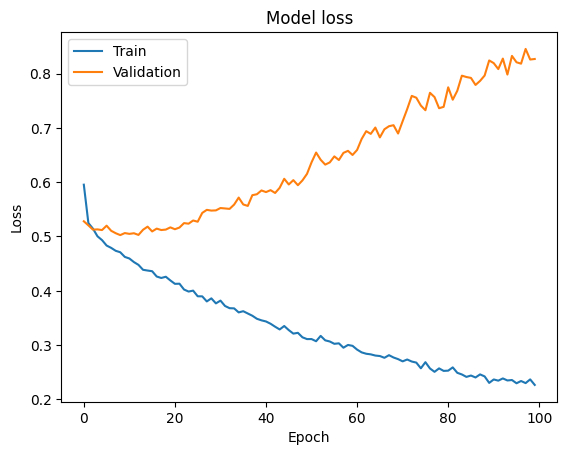

In [ ]:
# Definisikan model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')  # 3 output karena ada 3 kelas
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

# Plot history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

# Prediksi pada data testing
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluasi model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test accuracy: 0.788108766078949
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       966
           1       0.35      0.15      0.21        52
           2       0.75      0.69      0.72       563

    accuracy                           0.79      1581
   macro avg       0.64      0.58      0.59      1581
weighted avg       0.78      0.79      0.78      1581


Confusion Matrix:
 [[847   8 111]
 [ 28   8  16]
 [165   7 391]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from tensorflow import keras
from keras import layers

# Definisikan fungsi untuk membuat model
def create_model(units1=128, units2=64, dropout1=0.2, dropout2=0.2):
    model = keras.Sequential([
        layers.Dense(units1, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(dropout1),
        layers.Dense(units2, activation='relu'),
        layers.Dropout(dropout2),
        layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Buat model KerasClassifier, tambahkan parameter yang ingin dioptimalkan
model = KerasClassifier(
    build_fn=create_model,
    verbose=0,
    units1=128,
    units2=64,
    dropout1=0.2,
    dropout2=0.2,
    epochs=50,
    batch_size=32
)

# Definisikan parameter grid untuk Random Search CV
param_grid = {
    'units1': [64, 128, 256],
    'units2': [32, 64, 128],
    'dropout1': [0.1, 0.2, 0.3],
    'dropout2': [0.1, 0.2, 0.3],
    'epochs': [50, 100, 150],
    'batch_size': [16, 32, 64]
}

# Inisialisasi Random Search CV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Latih model dengan Random Search CV
random_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best parameters found: ", random_search.best_params_)

# Evaluasi model dengan parameter terbaik
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best parameters found:  {'units2': 32, 'units1': 64, 'epochs': 100, 'dropout2': 0.1, 'dropout1': 0.3, 'batch_size': 64}
Accuracy: 0.8127767235926628

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       966
           1       0.57      0.08      0.14        52
           2       0.81      0.69      0.75       563

    accuracy                           0.81      1581
   macro avg       0.73      0.56      0.58      1581
weighted avg       0.81      0.81      0.80      1581


Confusion Matrix:
 [[890   0  76]
 [ 30   4  18]
 [169   3 391]]
